# 1 Data preparation

This script contains data cleaning/converting and summary statistics

In [1]:
import matplotlib.pyplot as plt
import cartopy
import cartopy.io.shapereader as shpreader
import cartopy.crs as ccrs
import matplotlib.patches as mpatches
import geopandas as gpd
import pandas as pd
import numpy as np
from datetime import date
from mpl_toolkits.axes_grid1 import make_axes_locatable

# 1.1 Distribution of recorded extreme events

In this section we derive the shares of flood impacts from overall impacts recorded in EM-DAT

In [144]:
# load original data set provided by Munich Re (from 2008 onwards)
emdat_org=pd.read_excel('/home/insauer/projects/submission_vul_sat/input_data/emdat_public_2023_01_18_query_uid-3vt2SV.xlsx', header =6)
#emdat_org=emdat_org.loc[emdat_org['Year']>=2008]
emdat_org.iloc[:,20:40]

/home/insauer/anaconda3/envs/climada_env/lib/python3.8/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


Declaration  AID Contribution ('000 US$)  Dis Mag Value Dis Mag Scale  \
0              No                          NaN            NaN           Km2   
1              No                          NaN            NaN           Km2   
2             NaN                          NaN            8.0       Richter   
3             NaN                          NaN            NaN           NaN   
4             NaN                          NaN            NaN           NaN   
...           ...                          ...            ...           ...   
16506         NaN                          NaN            NaN    Vaccinated   
16507         NaN                          NaN         2104.0    Vaccinated   
16508         NaN                          NaN            NaN    Vaccinated   
16509         NaN                          NaN            NaN    Vaccinated   
16510         NaN                          NaN            NaN           Km2   

      Latitude Longitude Local Time River Basin  Start Year  Start Month  \
0          NaN       NaN        NaN         NaN        1900          NaN   
1          NaN       NaN        NaN         NaN        1900          NaN   
2           14       -91      20:20         NaN        1902          4.0   
3          NaN       NaN        NaN         NaN        1902          4.0   
4          NaN       NaN        NaN         NaN        1902         10.0   
...        ...       ...        ...         ...         ...          ...   
16506      NaN       NaN        NaN         NaN        2022          4.0   
16507      NaN       NaN        NaN         NaN        2022          4.0   
16508      NaN       NaN        NaN         NaN        2022          4.0   
16509      NaN       NaN        NaN         NaN        2022          1.0   
16510      NaN       NaN        NaN  Mori River        2022          8.0   

       Start Day  End Year  End Month  End Day  Total Deaths  No Injured  \
0            NaN      1900        NaN      NaN       11000.0         NaN   
1            NaN      1900        NaN      NaN     1250000.0         NaN   
2           18.0      1902        4.0     18.0        2000.0         NaN   
3            8.0      1902        4.0      8.0        1000.0         NaN   
4           24.0      1902       10.0     24.0        6000.0         NaN   
...          ...       ...        ...      ...           ...         ...   
16506        4.0      2022        5.0      2.0           8.0       607.0   
16507       19.0      2022        9.0     27.0           5.0       141.0   
16508        NaN      2022       11.0      NaN         750.0      6551.0   
16509        NaN      2022        1.0     31.0          20.0         NaN   
16510        NaN      2022       10.0     29.0           NaN         NaN   

       No Affected  No Homeless  Total Affected  \
0              NaN          NaN             NaN   
1              NaN          NaN             NaN   
2              NaN          NaN             NaN   
3              NaN          NaN             NaN   
4              NaN          NaN             NaN   
...            ...          ...             ...   
16506          NaN          NaN           607.0   
16507          NaN          NaN           141.0   
16508          NaN          NaN          6551.0   
16509       1353.0          NaN          1353.0   
16510    1000000.0          NaN       1000000.0   

       Reconstruction Costs ('000 US$)  
0                                  NaN  
1                                  NaN  
2                                  NaN  
3                                  NaN  
4                                  NaN  
...                                ...  
16506                              NaN  
16507                              NaN  
16508                              NaN  
16509                              NaN  
16510                              NaN  

[16511 rows x 20 columns]

In [3]:
# display all existing event categories
set(emdat_org['Disaster Type'])

{'Animal accident',
 'Drought',
 'Earthquake',
 'Epidemic',
 'Extreme temperature ',
 'Flood',
 'Glacial lake outburst',
 'Impact',
 'Insect infestation',
 'Landslide',
 'Mass movement (dry)',
 'Storm',
 'Volcanic activity',
 'Wildfire'}

In [4]:
event_classes=emdat_org.groupby('Disaster Type').sum()
event_classes['damage_share']=event_classes["Total Damages, Adjusted ('000 US$)"]/event_classes["Total Damages, Adjusted ('000 US$)"].sum()
event_classes['fatalities_share']=event_classes['Total Deaths']/event_classes['Total Deaths'].sum()

In [5]:
event_classes

Year      Seq  AID Contribution ('000 US$)  \
Disaster Type                                                          
Animal accident           2014      461                          0.0   
Drought                 493597  2297266                      18149.0   
Earthquake              767733   119234                    5392530.0   
Epidemic                753070   145938                      11344.0   
Extreme temperature     519528    76081                      33033.0   
Flood                  4921300   803963                    3487668.0   
Glacial lake outburst     6064      707                          0.0   
Impact                    2013       60                          0.0   
Insect infestation       24211     6057                        100.0   
Landslide               545981    79276                      14165.0   
Mass movement (dry)      18108     2585                          0.0   
Storm                  3113547   506740                    1918675.0   
Volcanic activity       141076    22853                      12284.0   
Wildfire                312524    54036                       1274.0   

                       Dis Mag Value  Start Year  Start Month  Start Day  \
Disaster Type                                                              
Animal accident                  0.0        2014         11.0       17.0   
Drought                          0.0      493608       1105.0       49.0   
Earthquake                    2403.0      767733       2475.0     5951.0   
Epidemic                  20668162.0      753075       1965.0     2337.0   
Extreme temperature            594.0      519536       1399.0     2638.0   
Flood                     86444626.0     4921300      15982.0    33646.0   
Glacial lake outburst            0.0        6064         13.0       33.0   
Impact                           0.0        2013          2.0       15.0   
Insect infestation               0.0       24217         50.0       18.0   
Landslide                  8089539.0      545981       1686.0     4229.0   
Mass movement (dry)              0.0       18108         48.0      106.0   
Storm                       718743.0     3113550      10348.0    23737.0   
Volcanic activity               12.0      141076        468.0      990.0   
Wildfire                    250866.0      312524        994.0     1721.0   

                       End Year  End Month  End Day  ...  Total Affected  \
Disaster Type                                        ...                   
Animal accident            2014       11.0     17.0  ...             5.0   
Drought                  493744     1442.0    246.0  ...     924705759.0   
Earthquake               767733     2476.0   5943.0  ...      93034429.0   
Epidemic                 753148     2663.0   4022.0  ...       7859998.0   
Extreme temperature      519558     1282.0   2963.0  ...      91119330.0   
Flood                   4921349    16230.0  36223.0  ...     919861229.0   
Glacial lake outburst      6064       13.0     34.0  ...            24.0   
Impact                     2013        2.0     15.0  ...        301491.0   
Insect infestation        24220       30.0      0.0  ...       2800000.0   
Landslide                545983     1675.0   4180.0  ...       3587853.0   
Mass movement (dry)       18108       48.0    106.0  ...          3927.0   
Storm                   3113555    10405.0  24193.0  ...     470259141.0   
Volcanic activity        141080      458.0   1152.0  ...       5021628.0   
Wildfire                 312527     1089.0   2112.0  ...      12541017.0   

                       Reconstruction Costs ('000 US$)  \
Disaster Type                                            
Animal accident                                    0.0   
Drought                                            0.0   
Earthquake                                  27877363.0   
Epidemic                                           0.0   
Extreme temperature                                0.0   
Flood                            

In [6]:
# Data from IDMC https://www.internal-displacement.org/database/displacement-data
displaced_floods=185.5
displaced_all_disasters=376
displaced_floods/displaced_all_disasters

0.4933510638297872

# 1.2 Compare complete datasets with matched datasets

In this part we compare the number of events reported in NatCatSERVICE (2000-2016), EM-DAT (2000-2018) and IDMC (2008-2018) with the number of events matched with GFD.

In [145]:
# load complete Natcat Dataset
natcat_all=pd.read_csv('/home/insauer/projects/submission_vul_sat/input_data/natcat_CPI_adjusted_ppp2011.csv')
#natcat_all=natcat_all.loc[natcat_all['year']>1999]
natcat_all

Unnamed: 0  year                begin                  end  \
0              7  1980           1980-01-01           1980-01-01   
1             21  1980           1980-01-02           1980-01-02   
2             31  1980           1980-01-09           1980-01-09   
3             33  1980           1980-01-14           1980-01-21   
4             38  1980           1980-01-20           1980-01-20   
...          ...   ...                  ...                  ...   
8818       30550  2016  2016-12-26 00:00:00  2016-12-27 00:00:00   
8819       30553  2016  2016-12-27 00:00:00  2016-12-28 10:22:25   
8820       30555  2016  2016-12-28 00:00:00  2016-12-30 00:00:00   
8821       30557  2016  2016-12-29 00:00:00  2016-12-30 00:00:00   
8822       30560  2016  2016-12-30 00:00:00  2016-12-30 00:00:00   

                          event type           subtype  ISO  \
0                         Flood    C  gf:General flood  PHL   
1                         Flood    C  gf:General flood  BRA   
2                         Flood    C  gf:General flood  IDN   
3                         Flood    C  gf:General flood  NZL   
4                         Flood    C  gf:General flood  COL   
...                         ...  ...               ...  ...   
8818                Flash flood    C    ff:Flash flood  COD   
8819  Flash flood, severe storm    C    ff:Flash flood  AUS   
8820                Flash flood    C    ff:Flash flood  TUR   
8821     Flash flood, landslide    C    ff:Flash flood  ECU   
8822     Flash flood, landslide    C    ff:Flash flood  BOL   

                                    country Continent  ...   Latitude  \
0                               Philippines      ASIA  ...   6.500000   
1                                    Brazil      AMER  ... -23.950000   
2                                 Indonesia      ASIA  ...  -5.683000   
3                               New Zealand     OCEAN  ... -45.000000   
4                                  Colombia      AMER  ...   9.306862   
...                                     ...       ...  ...        ...   
8818  Congo, the Democratic Republic of the     AFRIC  ...  -5.848732   
8819                              Australia     OCEAN  ... -34.928690   
8820                          Turkey (Asia)      ASIA  ...  36.804536   
8821                                Ecuador      AMER  ...  -1.482849   
8822                                Bolivia      AMER  ... -16.983333   

      Reg_name     ID  Reg_ID   CPI_conv   GDP_conv  unexact_conv  \
0          SEA  163.0     7.0   0.250355   0.565823           0.0   
1          LAN   29.0     3.0   0.169394   1.199659           0.0   
2          SEA   92.0     7.0   0.271674   1.897028           0.0   
3          AUS  157.0    10.0   0.180094   0.362561           0.0   
4          LAN   44.0     3.0   0.117861   0.418010           0.0   
...        ...    ...     ...        ...        ...           ...   
8818       SSA   41.0     5.0   0.454826   0.316797           0.0   
8819       AUS   13.0    10.0  12.536571  12.107510           0.0   
8820       ARA  210.0    15.0  12.148503  10.749940           0.0   
8821       LAN   58.0     3.0   1.874437   1.500663           0.0   
8822       LAN   28.0     3.0   1.166735   1.018253           0.0   

      CPI_conv_ppp GDP_conv_ppp  unexact_conv_ppp  
0         0.170382     0.385078               0.0  
1         0.079145     0.560506               0.0  
2         0.205830     1.437256               0.0  
3         0.140590     0.283032               0.0  
4         0.118619     0.420699               0.0  
...            ...          ...               ...  
8818      0.449840     0.313323               0.0  
8819     12.091528    11.677699               0.0  
8820     12.770431    11.300270               0.0  
8821      1.754582     1.404708               0.0  
8822      1.059028     0.924253               0.0  

[8823 rows x 27 columns]

In [8]:
# all events with Fatalities
natcat_all.loc[(~natcat_all['Fatalities'].isna())]

Unnamed: 0  year                begin                  end  \
3177       11956  2000           2000-01-01           2000-01-05   
3178       11970  2000           2000-01-05           2000-01-05   
3179       11983  2000           2000-01-12           2000-01-13   
3180       11984  2000           2000-01-13           2000-01-13   
3181       11989  2000           2000-01-14           2000-01-14   
...          ...   ...                  ...                  ...   
8818       30550  2016  2016-12-26 00:00:00  2016-12-27 00:00:00   
8819       30553  2016  2016-12-27 00:00:00  2016-12-28 10:22:25   
8820       30555  2016  2016-12-28 00:00:00  2016-12-30 00:00:00   
8821       30557  2016  2016-12-29 00:00:00  2016-12-30 00:00:00   
8822       30560  2016  2016-12-30 00:00:00  2016-12-30 00:00:00   

                          event type           subtype  ISO  \
3177           Flood, landslide    C  gf:General flood  BRA   
3178                      Flood    C  gf:General flood  VEN   
3179                      Flood    C  gf:General flood  GBR   
3180                      Flood    C  gf:General flood  BRA   
3181                      Flood    C  gf:General flood  AGO   
...                         ...  ...               ...  ...   
8818                Flash flood    C    ff:Flash flood  COD   
8819  Flash flood, severe storm    C    ff:Flash flood  AUS   
8820                Flash flood    C    ff:Flash flood  TUR   
8821     Flash flood, landslide    C    ff:Flash flood  ECU   
8822     Flash flood, landslide    C    ff:Flash flood  BOL   

                                    country Continent  ...   Latitude  \
3177                                 Brazil      AMER  ... -18.000000   
3178                              Venezuela      AMER  ...   7.833000   
3179                         United Kingdom     EUROP  ...  52.917000   
3180                                 Brazil      AMER  ... -23.550000   
3181                                 Angola     AFRIC  ... -12.967000   
...                                     ...       ...  ...        ...   
8818  Congo, the Democratic Republic of the     AFRIC  ...  -5.848732   
8819                              Australia     OCEAN  ... -34.928690   
8820                          Turkey (Asia)      ASIA  ...  36.804536   
8821                                Ecuador      AMER  ...  -1.482849   
8822                                Bolivia      AMER  ... -16.983333   

      Reg_name     ID  Reg_ID   CPI_conv   GDP_conv  unexact_conv  \
3177       LAN   29.0     3.0   4.438128   7.679622           0.0   
3178       LAN  220.0     3.0   0.072807   0.134760           0.0   
3179       EUR   71.0    11.0   0.013594   0.015934           0.0   
3180       LAN   29.0     3.0   0.022191   0.038398           0.0   
3181       SAF    3.0    13.0   0.065313   0.571502           0.0   
...        ...    ...     ...        ...        ...           ...   
8818       SSA   41.0     5.0   0.454826   0.316797           0.0   
8819       AUS   13.0    10.0  12.536571  12.107510           0.0   
8820       ARA  210.0    15.0  12.148503  10.749940           0.0   
8821       LAN   58.0     3.0   1.874437   1.500663           0.0   
8822       LAN   28.0     3.0   1.166735   1.018253           0.0   

      CPI_conv_ppp GDP_conv_ppp  unexact_conv_ppp  
3177      3.256022     5.634136               0.0  
3178      0.038490     0.071243               0.0  
3179      0.013412     0.015721               0.0  
3180      0.016280     0.028171               0.0  
3181      0.031248     0.273421               0.0  
...            ...          ...               ...  
8818      0.449840     0.313323               0.0  
8819     12.091528    11.677699               0.0  
8820     12.770431    11.300270               0.0  
8821      1.754582     1.404708               0.0  
8822      1.059028     0.924253               0.0  

[5646 rows x 27 columns]

In [9]:
# Total number events with damage
emdat_long=pd.read_csv('/home/insauer/projects/submission_vul_sat/input_data/results_EMDATlong_prep.csv')
emdat_long=emdat_long.loc[(emdat_long['Year']>1999) & (emdat_long['Year']<2019)]
emdat_long


Unnamed: 0         Dis No  Year  Seq Glide Disaster Group  \
1794        1794  2000-0372-CHN  2000  372   NaN        Natural   
1795        1795  2000-0373-BGD  2000  373   NaN        Natural   
1796        1796  2000-0905-BOL  2000  905   NaN        Natural   
1797        1797  2000-0019-BRA  2000   19   NaN        Natural   
1798        1798  2000-0809-BRA  2000  809   NaN        Natural   
...          ...            ...   ...  ...   ...            ...   
5035        5035  2018-0386-VEN  2018  386   NaN        Natural   
5036        5036  2018-0290-VEN  2018  290   NaN        Natural   
5037        5037  2018-0448-VNM  2018  448   NaN        Natural   
5185        5185  2017-0581-GMB  2017  581   NaN        Natural   
5457        5457  2016-0579-PNG  2016  579   NaN        Natural   

     Disaster Subgroup Disaster Type Disaster Subtype  Disaster Subsubtype  \
1794      Hydrological         Flood   Riverine flood                  NaN   
1795      Hydrological         Flood      Flash flood                  NaN   
1796      Hydrological         Flood              NaN                  NaN   
1797      Hydrological         Flood   Riverine flood                  NaN   
1798      Hydrological         Flood   Riverine flood                  NaN   
...                ...           ...              ...                  ...   
5035      Hydrological         Flood      Flash flood                  NaN   
5036      Hydrological         Flood              NaN                  NaN   
5037      Hydrological         Flood      Flash flood                  NaN   
5185      Hydrological         Flood              NaN                  NaN   
5457      Hydrological         Flood              NaN                  NaN   

      ... Insured Damages, Adjusted (1000 US$) Total Damages (1000 US$)  \
1794  ...                                  NaN                  19000.0   
1795  ...                                  NaN                      NaN   
1796  ...                                  NaN                      NaN   
1797  ...                                  NaN                      NaN   
1798  ...                                  NaN                      NaN   
...   ...                                  ...                      ...   
5035  ...                                  NaN                      NaN   
5036  ...                                  NaN                      NaN   
5037  ...                                  NaN                  25000.0   
5185  ...                                  NaN                      NaN   
5457  ...                                  NaN                      NaN   

     Total Damages, Adjusted (1000 US$)        CPI Adm Level  \
1794                            29898.0  63.549547       1;2   
1795                                NaN  63.549547         2   
1796                                NaN  63.549547         1   
1797                                NaN  63.549547         2   
1798                                NaN  63.549547         2   
...                                 ...        ...       ...   
5035                                NaN  92.669670         1   
5036                                NaN  92.669670         1   
5037                            26978.0  92.669670         1   
5185                                NaN  90.460179       NaN   
5457                                NaN  88.573453         1   

                              Admin1 Code  \
1794                                  914   
1795                                  NaN   
1796  40444;40445;40446;40447;40448;40450   
1797                                  NaN   
1798                                  NaN   
...                                   ...   
5035                           3305;67152   
5036                       3302;3307;3318   
5037   3333;3340;3366;3372;3374;3376;3382   
5185                                  NaN   
5457                                 2300   

                                    Admin2 Code  \
17

In [10]:
# Total number events with fatalities
emdat_long.loc[(~emdat_long['Total Deaths'].isna())]

Unnamed: 0         Dis No  Year  Seq           Glide Disaster Group  \
1794        1794  2000-0372-CHN  2000  372             NaN        Natural   
1795        1795  2000-0373-BGD  2000  373             NaN        Natural   
1796        1796  2000-0905-BOL  2000  905             NaN        Natural   
1797        1797  2000-0019-BRA  2000   19             NaN        Natural   
1798        1798  2000-0809-BRA  2000  809             NaN        Natural   
...          ...            ...   ...  ...             ...            ...   
5033        5033  2018-0125-TZA  2018  125  FL-2018-000043        Natural   
5034        5034  2018-0331-USA  2018  331             NaN        Natural   
5035        5035  2018-0386-VEN  2018  386             NaN        Natural   
5037        5037  2018-0448-VNM  2018  448             NaN        Natural   
5185        5185  2017-0581-GMB  2017  581             NaN        Natural   

     Disaster Subgroup Disaster Type Disaster Subtype  Disaster Subsubtype  \
1794      Hydrological         Flood   Riverine flood                  NaN   
1795      Hydrological         Flood      Flash flood                  NaN   
1796      Hydrological         Flood              NaN                  NaN   
1797      Hydrological         Flood   Riverine flood                  NaN   
1798      Hydrological         Flood   Riverine flood                  NaN   
...                ...           ...              ...                  ...   
5033      Hydrological         Flood              NaN                  NaN   
5034      Hydrological         Flood      Flash flood                  NaN   
5035      Hydrological         Flood      Flash flood                  NaN   
5037      Hydrological         Flood      Flash flood                  NaN   
5185      Hydrological         Flood              NaN                  NaN   

      ... Insured Damages, Adjusted (1000 US$) Total Damages (1000 US$)  \
1794  ...                                  NaN                  19000.0   
1795  ...                                  NaN                      NaN   
1796  ...                                  NaN                      NaN   
1797  ...                                  NaN                      NaN   
1798  ...                                  NaN                      NaN   
...   ...                                  ...                      ...   
5033  ...                                  NaN                      NaN   
5034  ...                                  NaN                 250000.0   
5035  ...                                  NaN                      NaN   
5037  ...                                  NaN                  25000.0   
5185  ...                                  NaN                      NaN   

     Total Damages, Adjusted (1000 US$)        CPI Adm Level  \
1794                            29898.0  63.549547       1;2   
1795                                NaN  63.549547         2   
1796                                NaN  63.549547         1   
1797                                NaN  63.549547         2   
1798                                NaN  63.549547         2   
...                                 ...        ...       ...   
5033                                NaN  92.669670         1   
5034                           269775.0  92.669670         1   
5035                                NaN  92.669670         1   
5037                            26978.0  92.669670         1   
5185                                NaN  90.460179       NaN   

                                            Admin1 Code  \
1794                                                914   
1795                                                NaN   
1796                40444;40445;40446;40447;40448;40450   
1797                                                NaN   
1798                                                NaN   
...                                                 ...   
5033                   48357;48358;115004;115006;115009   
50

In [11]:
# all events with damage
emdat_long.loc[(~emdat_long["Total Damages, Adjusted (1000 US$)"].isna())]

Unnamed: 0         Dis No  Year  Seq           Glide Disaster Group  \
1794        1794  2000-0372-CHN  2000  372             NaN        Natural   
1800        1800  2000-0677-CHN  2000  677             NaN        Natural   
1801        1801  2000-0920-CHN  2000  920             NaN        Natural   
1802        1802  2000-0375-CHL  2000  375             NaN        Natural   
1803        1803  2000-0002-AGO  2000    2             NaN        Natural   
...          ...            ...   ...  ...             ...            ...   
5024        5024  2018-0419-USA  2018  419             NaN        Natural   
5029        5029  2018-0133-SOM  2018  133             NaN        Natural   
5031        5031  2018-0364-TUN  2018  364  FF-2018-000158        Natural   
5034        5034  2018-0331-USA  2018  331             NaN        Natural   
5037        5037  2018-0448-VNM  2018  448             NaN        Natural   

     Disaster Subgroup Disaster Type Disaster Subtype  Disaster Subsubtype  \
1794      Hydrological         Flood   Riverine flood                  NaN   
1800      Hydrological         Flood      Flash flood                  NaN   
1801      Hydrological         Flood   Riverine flood                  NaN   
1802      Hydrological         Flood      Flash flood                  NaN   
1803      Hydrological         Flood   Riverine flood                  NaN   
...                ...           ...              ...                  ...   
5024      Hydrological         Flood   Riverine flood                  NaN   
5029      Hydrological         Flood   Riverine flood                  NaN   
5031      Hydrological         Flood      Flash flood                  NaN   
5034      Hydrological         Flood      Flash flood                  NaN   
5037      Hydrological         Flood      Flash flood                  NaN   

      ... Insured Damages, Adjusted (1000 US$) Total Damages (1000 US$)  \
1794  ...                                  NaN                  19000.0   
1800  ...                                  NaN                  25366.0   
1801  ...                                  NaN                   5000.0   
1802  ...                                  NaN                  30000.0   
1803  ...                                  NaN                  10000.0   
...   ...                                  ...                      ...   
5024  ...                                  NaN                 400000.0   
5029  ...                                  NaN                  80000.0   
5031  ...                                  NaN                  36000.0   
5034  ...                                  NaN                 250000.0   
5037  ...                                  NaN                  25000.0   

     Total Damages, Adjusted (1000 US$)        CPI Adm Level  \
1794                            29898.0  63.549547       1;2   
1800                            39915.0  63.549547       1;2   
1801                             7868.0  63.549547         1   
1802                            47207.0  63.549547         1   
1803                            15736.0  63.549547         2   
...                                 ...        ...       ...   
5024                           431641.0  92.669670         2   
5029                            86328.0  92.669670         1   
5031                            38848.0  92.669670         1   
5034                           269775.0  92.669670         1   
5037                            26978.0  92.669670         1   

                                            Admin1 Code  \
1794                                                914   
1800                                                906   
1801                                                903   
1802             884;888;889;892;893;91501;91504;149630   
1803                                                NaN   
...                                                 ...   
5024                                                NaN   
50

In [12]:
# all displacement events
idmc_long=pd.read_excel('/home/insauer/projects/submission_vul_sat/input_data/IDMC_Internal_Displacement_Disasters_Events_2008_2021.xlsx')
idmc_long=idmc_long.iloc[1:,:]
idmc_long=idmc_long.loc[(idmc_long['Year']<2019) &(idmc_long['Hazard Type']=='Flood')]

idmc_long#.loc[~idmc_long['Internal Displacements'].isna()]

ISO3         Name  Year  Start Date  \
1      AB9   Abyei Area  2018  2018-07-01   
5      AFG  Afghanistan  2008  2008-08-01   
6      AFG  Afghanistan  2009  2009-01-01   
8      AFG  Afghanistan  2009  2009-01-01   
10     AFG  Afghanistan  2010  2010-01-01   
...    ...          ...   ...         ...   
11694  ZWE     Zimbabwe  2014  2014-12-01   
11698  ZWE     Zimbabwe  2014  2014-02-01   
11700  ZWE     Zimbabwe  2014  2014-12-17   
11706  ZWE     Zimbabwe  2016  2016-12-14   
11709  ZWE     Zimbabwe  2017  2017-01-01   

                                  Event Name  Hazard Category Hazard Type  \
1                  Abyie: Flood - 01/07/2018  Weather related       Flood   
5                                        NaN  Weather related       Flood   
6                                        NaN  Weather related       Flood   
8                                        NaN  Weather related       Flood   
10                                       NaN  Weather related       Flood   
...                                      ...              ...         ...   
11694                           Mutare flood  Weather related       Flood   
11698                Tokwe Mukorsi Dam flood  Weather related       Flood   
11700                          Mutare floods  Weather related       Flood   
11706  Floods in Matabeleland North Province  Weather related       Flood   
11709  Zimbabwe: Rainy season - January 2017  Weather related       Flood   

      Internal Displacements  
1                          2  
5                        180  
6                      25185  
8                        NaN  
10                     70000  
...                      ...  
11694                      8  
11698                  20000  
11700                     90  
11706                    400  
11709                   8485  

[3083 rows x 8 columns]

In [13]:
# all events with valid entries for displacement
idmc_long.loc[~idmc_long['Internal Displacements'].isna()]

ISO3         Name  Year  Start Date  \
1      AB9   Abyei Area  2018  2018-07-01   
5      AFG  Afghanistan  2008  2008-08-01   
6      AFG  Afghanistan  2009  2009-01-01   
10     AFG  Afghanistan  2010  2010-01-01   
15     AFG  Afghanistan  2011  2011-01-01   
...    ...          ...   ...         ...   
11694  ZWE     Zimbabwe  2014  2014-12-01   
11698  ZWE     Zimbabwe  2014  2014-02-01   
11700  ZWE     Zimbabwe  2014  2014-12-17   
11706  ZWE     Zimbabwe  2016  2016-12-14   
11709  ZWE     Zimbabwe  2017  2017-01-01   

                                  Event Name  Hazard Category Hazard Type  \
1                  Abyie: Flood - 01/07/2018  Weather related       Flood   
5                                        NaN  Weather related       Flood   
6                                        NaN  Weather related       Flood   
10                                       NaN  Weather related       Flood   
15                                       NaN  Weather related       Flood   
...                                      ...              ...         ...   
11694                           Mutare flood  Weather related       Flood   
11698                Tokwe Mukorsi Dam flood  Weather related       Flood   
11700                          Mutare floods  Weather related       Flood   
11706  Floods in Matabeleland North Province  Weather related       Flood   
11709  Zimbabwe: Rainy season - January 2017  Weather related       Flood   

      Internal Displacements  
1                          2  
5                        180  
6                      25185  
10                     70000  
15                      3000  
...                      ...  
11694                      8  
11698                  20000  
11700                     90  
11706                    400  
11709                   8485  

[2823 rows x 8 columns]

In [14]:
# load all NatCatSERVICE events
natcat_matched=pd.read_csv('/home/insauer/projects/submission_vul_sat/input_data/FLODIS_NatCat_fatalities_damages.csv')
natcat_matched= natcat_matched.drop(columns=['Unnamed: 0'])
natcat_matched

year  ISO  tot_loss  ins_loss  tot_loss_GDP  tot_loss_GCP  \
0    2000.0  HUN     55.00       0.0    147.151583    122.454554   
1    2000.0  NaN    125.00       0.0           NaN           NaN   
2    2000.0  KHM      6.00       0.0     31.808774     29.077715   
3    2000.0  THA      0.05       0.0      0.156322      0.201686   
4    2000.0  VNM     17.00       0.0    102.196978    119.841722   
..      ...  ...       ...       ...           ...           ...   
863  2016.0  IND    215.67       0.0    215.670000    215.670000   
864  2016.0  IND     41.80       0.0     41.800000     41.800000   
865  2016.0  MMR      5.00       0.0      5.000000      5.000000   
866  2016.0  IND    580.12       0.0    580.120000    580.120000   
867  2016.0  MYS      2.11       0.0      2.110000      2.110000   

     tot_loss_CPI  Fatalities    CPI_conv    GDP_conv  ...  elevation  \
0      106.467830         1.0  138.597299  163.228841  ...   91.38265   
1             NaN        10.0    0.000000    0.000000  ...  123.29072   
2       11.423164        13.0   10.135017   20.964500  ...    9.37199   
3        0.081702         7.0    0.088051    0.146557  ...  102.10830   
4       33.634141         3.0   28.481859   67.330587  ...   11.61329   
..            ...         ...         ...         ...  ...        ...   
863    215.670000       473.0         NaN         NaN  ...        NaN   
864     41.800000        91.0         NaN         NaN  ...        NaN   
865      5.000000         8.0         NaN         NaN  ...        NaN   
866    580.120000       376.0         NaN         NaN  ...        NaN   
867      2.110000         2.0         NaN         NaN  ...        NaN   

     roughness    slope  female_mean  pop_0_14_mean  pop_65_plus_mean  \
0      3.94005  0.29582      0.51977        0.16239           0.16757   
1      8.98093  0.76156      0.50374        0.16802           0.13982   
2      3.03036  0.21066      0.51229        0.34739           0.04955   
3      4.01293  0.29910      0.50994        0.18814           0.08724   
4      5.61878  0.42373      0.50777        0.25706           0.07543   
..         ...      ...          ...            ...               ...   
863        NaN      NaN      0.48128        0.36683           0.04868   
864        NaN      NaN      0.48258        0.34491           0.04904   
865        NaN      NaN      0.52657        0.32053           0.06247   
866        NaN      NaN      0.48258        0.34491           0.04904   
867        NaN      NaN      0.47102        0.29413           0.05419   

    FLOPROS_merged_mean  FLOPROS_modeled_mean  forest_cover_mean  \
0             100.00000              19.58333            0.00041   
1             142.68362              38.82062            0.00039   
2               3.09879               3.06452            0.00033   
3              17.22186              17.01929            0.00012   
4               7.03070               6.56725            0.00020   
..                  ...                   ...                ...   
863            95.57084               7.67166            0.00003   
864            96.55694               7.97801            0.00002   
865             1.69643               1.26786            0.00009   
866            96.55694               7.97801            0.00002   
867            22.13176              22.13176            0.00054   

                begin_dt  
0    2000-04-06 00:00:00  
1    2000-04-06 00:00:00  
2    2000-07-10 00:00:00  
3    2000-07-11 00:00:00  
4    2000-08-01 00:00:00  
..                   ...  
863  2016-06-26 18:40:00  
864  2016-08-02 12:00:00  
865  2016-07-15 00:00:00  
866  2016-07-14 14:24:00  
867  2016-11-10 18:00:00  

[868 rows x 80 columns]

In [15]:
natcat_matched.columns

Index(['year', 'ISO', 'tot_loss', 'ins_loss', 'tot_loss_GDP', 'tot_loss_GCP',
       'tot_loss_CPI', 'Fatalities', 'CPI_conv', 'GDP_conv', 'unexact_conv',
       'CPI_conv_ppp', 'GDP_conv_ppp', 'unexact_conv_ppp', 'index',
       'DFO_matches', 'DFO_matches_nr', 'matching_type',
       'DFO_matches_time_dif', 'DFO_duration', 'DFO_satellite_shape_area',
       'affected_sum_GHSL', 'affected_mean_GHSL',
       'DFO_satellite_shape_pop_density_GHSL', 'affected_sum_GPW',
       'affected_mean_GPW', 'DFO_satellite_shape_pop_density_GPW',
       'GDP_affected_sum', 'cable_affected_sum', 'plant_affected_sum',
       'power_pole_affected_sum', 'power_tower_affected_sum',
       'line_affected_sum', 'mast_affected_sum',
       'communication_tower_affected_sum', 'doctors_affected_sum',
       'hospital_affected_sum', 'pharmacy_affected_sum',
       'primary_road_affected_sum', 'tertiary_road_affected_sum',
       'reservoir_affected_sum', 'school_affected_sum',
       'university_affected_sum',

In [16]:
# exclude aggregated events
natcat_matched=natcat_matched.loc[~natcat_matched['ISO'].isna()]

In [17]:
# exclude events without valid asset information
natcat_matched.loc[(~natcat_matched['CPI_conv_ppp'].isna())&(natcat_matched['CPI_conv_ppp']>0)]

year  ISO  tot_loss  ins_loss  tot_loss_GDP  tot_loss_GCP  \
0    2000.0  HUN     55.00       0.0    147.151583    122.454554   
2    2000.0  KHM      6.00       0.0     31.808774     29.077715   
3    2000.0  THA      0.05       0.0      0.156322      0.201686   
4    2000.0  VNM     17.00       0.0    102.196978    119.841722   
5    2000.0  PRK      0.10       0.0      0.178929      0.179058   
..      ...  ...       ...       ...           ...           ...   
863  2016.0  IND    215.67       0.0    215.670000    215.670000   
864  2016.0  IND     41.80       0.0     41.800000     41.800000   
865  2016.0  MMR      5.00       0.0      5.000000      5.000000   
866  2016.0  IND    580.12       0.0    580.120000    580.120000   
867  2016.0  MYS      2.11       0.0      2.110000      2.110000   

     tot_loss_CPI  Fatalities    CPI_conv    GDP_conv  ...  elevation  \
0      106.467830         1.0  138.597299  163.228841  ...   91.38265   
2       11.423164        13.0   10.135017   20.964500  ...    9.37199   
3        0.081702         7.0    0.088051    0.146557  ...  102.10830   
4       33.634141         3.0   28.481859   67.330587  ...   11.61329   
5        0.139377         5.0    0.130627    0.147901  ...   37.83494   
..            ...         ...         ...         ...  ...        ...   
863    215.670000       473.0         NaN         NaN  ...        NaN   
864     41.800000        91.0         NaN         NaN  ...        NaN   
865      5.000000         8.0         NaN         NaN  ...        NaN   
866    580.120000       376.0         NaN         NaN  ...        NaN   
867      2.110000         2.0         NaN         NaN  ...        NaN   

     roughness    slope  female_mean  pop_0_14_mean  pop_65_plus_mean  \
0      3.94005  0.29582      0.51977        0.16239           0.16757   
2      3.03036  0.21066      0.51229        0.34739           0.04955   
3      4.01293  0.29910      0.50994        0.18814           0.08724   
4      5.61878  0.42373      0.50777        0.25706           0.07543   
5     21.09331  1.74901      0.52521        0.23779           0.09349   
..         ...      ...          ...            ...               ...   
863        NaN      NaN      0.48128        0.36683           0.04868   
864        NaN      NaN      0.48258        0.34491           0.04904   
865        NaN      NaN      0.52657        0.32053           0.06247   
866        NaN      NaN      0.48258        0.34491           0.04904   
867        NaN      NaN      0.47102        0.29413           0.05419   

    FLOPROS_merged_mean  FLOPROS_modeled_mean  forest_cover_mean  \
0             100.00000              19.58333            0.00041   
2               3.09879               3.06452            0.00033   
3              17.22186              17.01929            0.00012   
4               7.03070               6.56725            0.00020   
5               3.62323               3.58357            0.00002   
..                  ...                   ...                ...   
863            95.57084               7.67166            0.00003   
864            96.55694               7.97801            0.00002   
865             1.69643               1.26786            0.00009   
866            96.55694               7.97801            0.00002   
867            22.13176              22.13176            0.00054   

                begin_dt  
0    2000-04-06 00:00:00  
2    2000-07-10 00:00:00  
3    2000-07-11 00:00:00  
4    2000-08-01 00:00:00  
5    2000-08-27 00:00:00  
..                   ...  
863  2016-06-26 18:40:00  
864  2016-08-02 12:00:00  
865  2016-07-15 00:00:00  
866  2016-07-14 14:24:00  
867  2016-11-10 18:00:00  

[792 rows x 80 columns]

In [18]:
# get all events without fatalities
natcat_matched.loc[~(natcat_matched['Fatalities'].isna())]

year  ISO  tot_loss  ins_loss  tot_loss_GDP  tot_loss_GCP  \
0    2000.0  HUN     55.00       0.0    147.151583    122.454554   
2    2000.0  KHM      6.00       0.0     31.808774     29.077715   
3    2000.0  THA      0.05       0.0      0.156322      0.201686   
4    2000.0  VNM     17.00       0.0    102.196978    119.841722   
5    2000.0  PRK      0.10       0.0      0.178929      0.179058   
..      ...  ...       ...       ...           ...           ...   
863  2016.0  IND    215.67       0.0    215.670000    215.670000   
864  2016.0  IND     41.80       0.0     41.800000     41.800000   
865  2016.0  MMR      5.00       0.0      5.000000      5.000000   
866  2016.0  IND    580.12       0.0    580.120000    580.120000   
867  2016.0  MYS      2.11       0.0      2.110000      2.110000   

     tot_loss_CPI  Fatalities    CPI_conv    GDP_conv  ...  elevation  \
0      106.467830         1.0  138.597299  163.228841  ...   91.38265   
2       11.423164        13.0   10.135017   20.964500  ...    9.37199   
3        0.081702         7.0    0.088051    0.146557  ...  102.10830   
4       33.634141         3.0   28.481859   67.330587  ...   11.61329   
5        0.139377         5.0    0.130627    0.147901  ...   37.83494   
..            ...         ...         ...         ...  ...        ...   
863    215.670000       473.0         NaN         NaN  ...        NaN   
864     41.800000        91.0         NaN         NaN  ...        NaN   
865      5.000000         8.0         NaN         NaN  ...        NaN   
866    580.120000       376.0         NaN         NaN  ...        NaN   
867      2.110000         2.0         NaN         NaN  ...        NaN   

     roughness    slope  female_mean  pop_0_14_mean  pop_65_plus_mean  \
0      3.94005  0.29582      0.51977        0.16239           0.16757   
2      3.03036  0.21066      0.51229        0.34739           0.04955   
3      4.01293  0.29910      0.50994        0.18814           0.08724   
4      5.61878  0.42373      0.50777        0.25706           0.07543   
5     21.09331  1.74901      0.52521        0.23779           0.09349   
..         ...      ...          ...            ...               ...   
863        NaN      NaN      0.48128        0.36683           0.04868   
864        NaN      NaN      0.48258        0.34491           0.04904   
865        NaN      NaN      0.52657        0.32053           0.06247   
866        NaN      NaN      0.48258        0.34491           0.04904   
867        NaN      NaN      0.47102        0.29413           0.05419   

    FLOPROS_merged_mean  FLOPROS_modeled_mean  forest_cover_mean  \
0             100.00000              19.58333            0.00041   
2               3.09879               3.06452            0.00033   
3              17.22186              17.01929            0.00012   
4               7.03070               6.56725            0.00020   
5               3.62323               3.58357            0.00002   
..                  ...                   ...                ...   
863            95.57084               7.67166            0.00003   
864            96.55694               7.97801            0.00002   
865             1.69643               1.26786            0.00009   
866            96.55694               7.97801            0.00002   
867            22.13176              22.13176            0.00054   

                begin_dt  
0    2000-04-06 00:00:00  
2    2000-07-10 00:00:00  
3    2000-07-11 00:00:00  
4    2000-08-01 00:00:00  
5    2000-08-27 00:00:00  
..                   ...  
863  2016-06-26 18:40:00  
864  2016-08-02 12:00:00  
865  2016-07-15 00:00:00  
866  2016-07-14 14:24:00  
867  2016-11-10 18:00:00  

[800 rows x 80 columns]

In [19]:
# check number of events 
natcat_matched.loc[(natcat_matched['Fatalities']==0)]

year  ISO  tot_loss  ins_loss  tot_loss_GDP  tot_loss_GCP  \
7    2000.0  RUS      2.00       0.0      9.475591      8.503915   
9    2001.0  KAZ      0.05       0.0      0.320568      0.341679   
20   2001.0  BGD      0.01       0.0      0.044306      0.041066   
24   2001.0  CUB      1.00       0.0      3.062007      3.257287   
25   2001.0  USA      0.50       0.0      0.880797      0.797229   
..      ...  ...       ...       ...           ...           ...   
802  2010.0  HRV     50.10       0.0     41.316063     39.888860   
815  2011.0  MYS      0.10       0.0      0.099349      0.114943   
820  2012.0  GBR      1.05       0.0      1.036806      1.075374   
843  2015.0  GUY      0.04       0.0      0.041714      0.042073   
855  2016.0  PER      2.60       0.0      2.600000      2.600000   

     tot_loss_CPI  Fatalities  CPI_conv   GDP_conv  ...  elevation  roughness  \
7        4.551123         0.0  6.750125  14.668159  ...  164.71700   29.33145   
9        0.065642         0.0  0.113904   0.424438  ...  266.41101    3.58277   
20       0.019899         0.0  0.015210   0.025368  ...   15.63334    4.01723   
24       1.699643         0.0  1.384662   2.177557  ...    7.04487    4.49639   
25       0.677603         0.0  0.635062   0.730474  ...  162.46969   12.93432   
..            ...         ...       ...        ...  ...        ...        ...   
802     43.800913         0.0       NaN        NaN  ...        NaN        NaN   
815      0.082688         0.0       NaN        NaN  ...        NaN        NaN   
820      0.944434         0.0       NaN        NaN  ...        NaN        NaN   
843      0.040427         0.0       NaN        NaN  ...        NaN        NaN   
855      2.600000         0.0       NaN        NaN  ...        NaN        NaN   

       slope  female_mean  pop_0_14_mean  pop_65_plus_mean  \
7    2.57180      0.52104        0.14498           0.10837   
9    0.30596      0.52729        0.19410           0.09453   
20   0.30821      0.50163        0.33334           0.04510   
24   0.36700      0.49144        0.17121           0.13134   
25   1.07280      0.47754        0.13255           0.22919   
..       ...          ...            ...               ...   
802      NaN      0.50351        0.13422           0.22463   
815      NaN      0.47345        0.29564           0.05655   
820      NaN          NaN            NaN               NaN   
843      NaN      0.48834        0.34544           0.04543   
855      NaN      0.47255        0.42293           0.03663   

    FLOPROS_merged_mean  FLOPROS_modeled_mean  forest_cover_mean  \
7              35.80460              35.71100            0.00026   
9              16.38704              16.38471            0.00019   
20             59.80392               4.35294            0.00000   
24              7.29015               7.29015            0.00023   
25            486.19268              71.58217            0.00065   
..                  ...                   ...                ...   
802           115.42177              14.71202            0.00031   
815            36.66923              36.66923            0.00080   
820           107.28610              42.03881            0.00028   
843             5.48966               5.48966            0.00084   
855            16.08583              16.08583            0.00088   

                begin_dt  
7    2000-08-31 00:00:00  
9    2001-05-12 00:00:00  
20   2001-10-06 00:00:00  
24   2001-10-31 00:00:00  
25   2001-12-29 00:00:00  
..                   ...  
802  2010-11-24 16:00:00  
815  2011-12-18 12:00:00  
820  2012-08-17 00:00:00  
843  2015-07-02 00:00:00  
855  2016-01-24 00:00:00  

[214 rows x 80 columns]

In [20]:
# all events matched with EM-DAT
emdat_matched=pd.read_csv('/home/insauer/projects/submission_vul_sat/input_data/FLODIS_fatalities_damages.csv')
emdat_matched= emdat_matched.drop(columns=['Unnamed: 0'])
emdat_matched.columns

Index(['ISO3', 'year', 'disasterno', 'total_deaths', 'no_injured',
       'no_affected_EMDAT', 'no_homeles', 'total_affected_EMDAT',
       'total_damages_(000_USD)', 'idx', 'DFO_matches', 'DFO_matches_nr',
       'matching_type', 'DFO_matches_time_dif', 'DFO_duration',
       'DFO_satellite_shape_area', 'affected_sum_GHSL', 'affected_mean_GHSL',
       'DFO_satellite_shape_pop_density_GHSL', 'affected_sum_GPW',
       'affected_mean_GPW', 'DFO_satellite_shape_pop_density_GPW',
       'GDP_affected_sum', 'cable_affected_sum', 'plant_affected_sum',
       'power_pole_affected_sum', 'power_tower_affected_sum',
       'line_affected_sum', 'mast_affected_sum',
       'communication_tower_affected_sum', 'doctors_affected_sum',
       'hospital_affected_sum', 'pharmacy_affected_sum',
       'primary_road_affected_sum', 'tertiary_road_affected_sum',
       'reservoir_affected_sum', 'school_affected_sum',
       'university_affected_sum', 'GDP_affected_mean',
       'education_affected_mean', 

In [21]:
# all events matched with EM-DAT
emdat_matched.loc[~emdat_matched['total_damages_(000_USD)'].isna()]

ISO3    year           disasterno  total_deaths  no_injured  \
1    BGR  2002.0            2002-0552           1.0         NaN   
5    PHL  2013.0            2013-0019          10.0         NaN   
8    VEN  2005.0            2005-0073          76.0        42.0   
9    GBR  2007.0            2007-0278           7.0         NaN   
13   ALB  2002.0            2002-0607           1.0         NaN   
..   ...     ...                  ...           ...         ...   
692  IDN  2006.0  2006-0074,2005-0718          98.0        30.0   
693  GBR  2007.0  2007-0247,2007-0201           7.0         0.0   
694  BRA  2008.0  2008-0016,2008-0041          13.0        12.0   
695  AUS  2010.0  2010-0103,2010-0066           0.0         0.0   
696  AUS  2012.0  2012-0037,2012-0029           4.0         0.0   

     no_affected_EMDAT  no_homeles  total_affected_EMDAT  \
1                  NaN         NaN                   NaN   
5             507769.0         NaN              507769.0   
8              25000.0         NaN               25042.0   
9             340000.0         NaN              340000.0   
13             66884.0         NaN               66884.0   
..                 ...         ...                   ...   
692            17781.0         0.0               17811.0   
693              200.0     30000.0               30200.0   
694            60929.0      1435.0               62376.0   
695                0.0         0.0                   0.0   
696            16000.0         0.0               16000.0   

     total_damages_(000_USD)  idx  ...    GDPpc_mean  HDI_mean  \
1                     1000.0  0.0  ...   8263.550000  0.711800   
5                     2800.0  0.0  ...   4239.190970  0.693990   
8                    50000.0  0.0  ...  27059.710900  0.715540   
9                  4000000.0  0.0  ...  36696.348960  0.897680   
13                   17500.0  0.0  ...   6185.753470  0.679740   
..                       ...  ...  ...           ...       ...   
692                  27100.0  NaN  ...   5755.128905  0.633860   
693                4448000.0  NaN  ...  31591.408130  0.883570   
694                      0.0  NaN  ...  19795.037110  0.760165   
695                 109000.0  NaN  ...  39922.045475  0.943695   
696                 588000.0  NaN  ...  41004.672165  0.949885   

     urbanization_mean  landuse_total_mean  female_mean  pop_0_14_mean  \
1             0.006390            0.427120     0.505610       0.118630   
5             0.009940            0.189780     0.557020       0.439190   
8             0.011620            0.068440     0.494600       0.307970   
9             0.044880            0.439690     0.551340       0.233820   
13            0.005170            0.145110     0.517430       0.233660   
..                 ...                 ...          ...            ...   
692           0.023905            0.207520     0.511195       0.291615   
693           0.009380            0.223430     0.594865       0.288835   
694           0.017530            0.130225     0.498715       0.276580   
695           0.001005            0.207470     0.471040       0.228995   
696           0.000095            0.093010     0.446280       0.222230   

     pop_65_plus_mean  FLOPROS_merged_mean  FLOPROS_modeled_mean  \
1             0.26071            18.688890             16.533330   
5             0.18474             0.000000              0.000000   
8             0.07423            14.506990             14.506990   
9             0.28407            94.845360             54.030930   
13            0.15905            12.761900             12.761900   
..                ...                  ...                   ...   
692           0.08103            50.634700              9.652540   
693           0.41531            44.298245             17.327350   
694           0.13738            19.847825             19.847825   
695           0.12372           100.000000             48.501345   
696           0.11320           100.000000      

In [22]:
# all events matched with EM-DAT
emdat_matched.loc[~emdat_matched['total_damages_(000_USD)'].isna()]

ISO3    year           disasterno  total_deaths  no_injured  \
1    BGR  2002.0            2002-0552           1.0         NaN   
5    PHL  2013.0            2013-0019          10.0         NaN   
8    VEN  2005.0            2005-0073          76.0        42.0   
9    GBR  2007.0            2007-0278           7.0         NaN   
13   ALB  2002.0            2002-0607           1.0         NaN   
..   ...     ...                  ...           ...         ...   
692  IDN  2006.0  2006-0074,2005-0718          98.0        30.0   
693  GBR  2007.0  2007-0247,2007-0201           7.0         0.0   
694  BRA  2008.0  2008-0016,2008-0041          13.0        12.0   
695  AUS  2010.0  2010-0103,2010-0066           0.0         0.0   
696  AUS  2012.0  2012-0037,2012-0029           4.0         0.0   

     no_affected_EMDAT  no_homeles  total_affected_EMDAT  \
1                  NaN         NaN                   NaN   
5             507769.0         NaN              507769.0   
8              25000.0         NaN               25042.0   
9             340000.0         NaN              340000.0   
13             66884.0         NaN               66884.0   
..                 ...         ...                   ...   
692            17781.0         0.0               17811.0   
693              200.0     30000.0               30200.0   
694            60929.0      1435.0               62376.0   
695                0.0         0.0                   0.0   
696            16000.0         0.0               16000.0   

     total_damages_(000_USD)  idx  ...    GDPpc_mean  HDI_mean  \
1                     1000.0  0.0  ...   8263.550000  0.711800   
5                     2800.0  0.0  ...   4239.190970  0.693990   
8                    50000.0  0.0  ...  27059.710900  0.715540   
9                  4000000.0  0.0  ...  36696.348960  0.897680   
13                   17500.0  0.0  ...   6185.753470  0.679740   
..                       ...  ...  ...           ...       ...   
692                  27100.0  NaN  ...   5755.128905  0.633860   
693                4448000.0  NaN  ...  31591.408130  0.883570   
694                      0.0  NaN  ...  19795.037110  0.760165   
695                 109000.0  NaN  ...  39922.045475  0.943695   
696                 588000.0  NaN  ...  41004.672165  0.949885   

     urbanization_mean  landuse_total_mean  female_mean  pop_0_14_mean  \
1             0.006390            0.427120     0.505610       0.118630   
5             0.009940            0.189780     0.557020       0.439190   
8             0.011620            0.068440     0.494600       0.307970   
9             0.044880            0.439690     0.551340       0.233820   
13            0.005170            0.145110     0.517430       0.233660   
..                 ...                 ...          ...            ...   
692           0.023905            0.207520     0.511195       0.291615   
693           0.009380            0.223430     0.594865       0.288835   
694           0.017530            0.130225     0.498715       0.276580   
695           0.001005            0.207470     0.471040       0.228995   
696           0.000095            0.093010     0.446280       0.222230   

     pop_65_plus_mean  FLOPROS_merged_mean  FLOPROS_modeled_mean  \
1             0.26071            18.688890             16.533330   
5             0.18474             0.000000              0.000000   
8             0.07423            14.506990             14.506990   
9             0.28407            94.845360             54.030930   
13            0.15905            12.761900             12.761900   
..                ...                  ...                   ...   
692           0.08103            50.634700              9.652540   
693           0.41531            44.298245             17.327350   
694           0.13738            19.847825             19.847825   
695           0.12372           100.000000             48.501345   
696           0.11320           100.000000      

In [23]:
# all events matched with EM-DAT
emdat_matched.loc[(~emdat_matched['total_deaths'].isna())]

ISO3    year           disasterno  total_deaths  no_injured  \
0    NPL  2005.0            2005-0556          51.0         NaN   
1    BGR  2002.0            2002-0552           1.0         NaN   
2    LAO  2002.0            2002-0614           2.0         NaN   
5    PHL  2013.0            2013-0019          10.0         NaN   
6    SOM  2012.0            2012-0508          25.0         NaN   
..   ...     ...                  ...           ...         ...   
692  IDN  2006.0  2006-0074,2005-0718          98.0        30.0   
693  GBR  2007.0  2007-0247,2007-0201           7.0         0.0   
694  BRA  2008.0  2008-0016,2008-0041          13.0        12.0   
695  AUS  2010.0  2010-0103,2010-0066           0.0         0.0   
696  AUS  2012.0  2012-0037,2012-0029           4.0         0.0   

     no_affected_EMDAT  no_homeles  total_affected_EMDAT  \
0               1600.0         NaN                1600.0   
1                  NaN         NaN                   NaN   
2             150000.0         NaN              150000.0   
5             507769.0         NaN              507769.0   
6                  NaN     20000.0               20000.0   
..                 ...         ...                   ...   
692            17781.0         0.0               17811.0   
693              200.0     30000.0               30200.0   
694            60929.0      1435.0               62376.0   
695                0.0         0.0                   0.0   
696            16000.0         0.0               16000.0   

     total_damages_(000_USD)  idx  ...    GDPpc_mean  HDI_mean  \
0                        NaN  0.0  ...   1241.520210  0.480730   
1                     1000.0  0.0  ...   8263.550000  0.711800   
2                        NaN  0.0  ...   2593.712230  0.508790   
5                     2800.0  0.0  ...   4239.190970  0.693990   
6                        NaN  0.0  ...    495.646000  0.360170   
..                       ...  ...  ...           ...       ...   
692                  27100.0  NaN  ...   5755.128905  0.633860   
693                4448000.0  NaN  ...  31591.408130  0.883570   
694                      0.0  NaN  ...  19795.037110  0.760165   
695                 109000.0  NaN  ...  39922.045475  0.943695   
696                 588000.0  NaN  ...  41004.672165  0.949885   

     urbanization_mean  landuse_total_mean  female_mean  pop_0_14_mean  \
0             0.001320            0.155180     0.686210       0.570080   
1             0.006390            0.427120     0.505610       0.118630   
2             0.001200            0.148230     0.501300       0.331330   
5             0.009940            0.189780     0.557020       0.439190   
6             0.002990            0.001800     0.502850       0.476860   
..                 ...                 ...          ...            ...   
692           0.023905            0.207520     0.511195       0.291615   
693           0.009380            0.223430     0.594865       0.288835   
694           0.017530            0.130225     0.498715       0.276580   
695           0.001005            0.207470     0.471040       0.228995   
696           0.000095            0.093010     0.446280       0.222230   

     pop_65_plus_mean  FLOPROS_merged_mean  FLOPROS_modeled_mean  \
0             0.38624             9.538460              2.384620   
1             0.26071            18.688890             16.533330   
2             0.04946             7.769230              7.769230   
5             0.18474             0.000000              0.000000   
6             0.02833             2.000000              2.000000   
..                ...                  ...                   ...   
692           0.08103            50.634700              9.652540   
693           0.41531            44.298245             17.327350   
694           0.13738            19.847825             19.847825   
695           0.12372           100.000000             48.501345   
696           0.11320           100.000000      

In [24]:
# all events matched with IDMC
idmc_matched=pd.read_csv('/home/insauer/projects/submission_vul_sat/input_data/FLODIS_displacements.csv')
idmc_matched= idmc_matched.drop(columns=['Unnamed: 0'])
idmc_matched=idmc_matched.loc[(~idmc_matched['displacements'].isna())]
idmc_matched

ISO3    year  displacements                                       GID_1  \
0    AFG  2008.0          180.0                                         NaN   
1    AFG  2013.0         4880.0                                         NaN   
2    AFG  2015.0         1210.0                                         NaN   
3    AFG  2015.0          581.0                                         NaN   
4    AFG  2018.0           22.0                                    AFG.17_1   
..   ...     ...            ...                                         ...   
330  USA  2017.0       219565.0                                     USA.5_1   
331  USA  2017.0        25973.0                                     USA.5_1   
332  USA  2018.0          609.0                                     USA.5_1   
333  PRY  2018.0          950.0  PRY.5_1,PRY.16_1,PRY.17_1,PRY.3_1,PRY.16_1   
334  USA  2017.0        34617.0           USA.5_1,USA.29_1,USA.5_1,USA.29_1   

                                 GID_2  num_provinces  num_districts  \
0                                  NaN            NaN            NaN   
1                                  NaN            NaN            NaN   
2                           AFG.1.11_1            NaN            1.0   
3                            AFG.1.2_1            NaN            1.0   
4                                  NaN            1.0            NaN   
..                                 ...            ...            ...   
330                        USA.37.19_1            1.0            1.0   
331                                NaN            1.0            NaN   
332                         USA.5.37_1            1.0            1.0   
333                         PRY.16.8_1            5.0            1.0   
334  USA.4.50_1,USA.5.29_1,USA.42.29_1            4.0            3.0   

     DFO_matches DFO_matches_nr  matching_type  ...    GDPpc_mean  HDI_mean  \
0              1           3359              1  ...   1335.591430  0.434000   
1              2   [4078, 4082]              2  ...   2476.899200  0.506080   
2              1           4272              1  ...   1965.011010  0.510390   
3              1           4272              1  ...   1820.304300  0.479000   
4              1           4645              1  ...   1986.935670  0.506800   
..           ...            ...            ...  ...           ...       ...   
330            1           4444              4  ...  56427.364760  0.955980   
331            1           4434              4  ...  56406.809200  0.956030   
332            1           4711              4  ...  54112.663757  0.942963   
333            1           4569              5  ...   8161.498570  0.707785   
334            1           4434              5  ...  56406.809200  0.956030   

     urbanization_mean  landuse_total_mean  female_mean  pop_0_14_mean  \
0             0.000220            0.373740     0.489380        0.48606   
1             0.001480            0.093010     0.489140        0.46697   
2             0.000660            0.036320     0.486300        0.46581   
3             0.000110            0.030190     0.495600        0.48602   
4             0.000550            0.256270     0.483610        0.48610   
..                 ...                 ...          ...            ...   
330           0.048850            0.115110          NaN            NaN   
331           0.030340            0.120650          NaN            NaN   
332           0.032427            0.070157     0.479570        0.06452   
333           0.001765            0.129460     0.481635        0.31585   
334           0.030340            0.120650          NaN            NaN   

     pop_65_plus_mean  FLOPROS_merged_mean  FLOPROS_modeled_mean  \
0             0.02164             2.000000              2.000000   
1             0.02395             2.921050              2.906020   
2             0.02461             2.000000              2.000000   
3             0.02167             2.000000              2.000000   
4           

# 1.3 Reconstruct dates from EM-DAT

In [25]:
# reconstruct EM-DAT dates and adjusted damage
emdat_long

Unnamed: 0         Dis No  Year  Seq Glide Disaster Group  \
1794        1794  2000-0372-CHN  2000  372   NaN        Natural   
1795        1795  2000-0373-BGD  2000  373   NaN        Natural   
1796        1796  2000-0905-BOL  2000  905   NaN        Natural   
1797        1797  2000-0019-BRA  2000   19   NaN        Natural   
1798        1798  2000-0809-BRA  2000  809   NaN        Natural   
...          ...            ...   ...  ...   ...            ...   
5035        5035  2018-0386-VEN  2018  386   NaN        Natural   
5036        5036  2018-0290-VEN  2018  290   NaN        Natural   
5037        5037  2018-0448-VNM  2018  448   NaN        Natural   
5185        5185  2017-0581-GMB  2017  581   NaN        Natural   
5457        5457  2016-0579-PNG  2016  579   NaN        Natural   

     Disaster Subgroup Disaster Type Disaster Subtype  Disaster Subsubtype  \
1794      Hydrological         Flood   Riverine flood                  NaN   
1795      Hydrological         Flood      Flash flood                  NaN   
1796      Hydrological         Flood              NaN                  NaN   
1797      Hydrological         Flood   Riverine flood                  NaN   
1798      Hydrological         Flood   Riverine flood                  NaN   
...                ...           ...              ...                  ...   
5035      Hydrological         Flood      Flash flood                  NaN   
5036      Hydrological         Flood              NaN                  NaN   
5037      Hydrological         Flood      Flash flood                  NaN   
5185      Hydrological         Flood              NaN                  NaN   
5457      Hydrological         Flood              NaN                  NaN   

      ... Insured Damages, Adjusted (1000 US$) Total Damages (1000 US$)  \
1794  ...                                  NaN                  19000.0   
1795  ...                                  NaN                      NaN   
1796  ...                                  NaN                      NaN   
1797  ...                                  NaN                      NaN   
1798  ...                                  NaN                      NaN   
...   ...                                  ...                      ...   
5035  ...                                  NaN                      NaN   
5036  ...                                  NaN                      NaN   
5037  ...                                  NaN                  25000.0   
5185  ...                                  NaN                      NaN   
5457  ...                                  NaN                      NaN   

     Total Damages, Adjusted (1000 US$)        CPI Adm Level  \
1794                            29898.0  63.549547       1;2   
1795                                NaN  63.549547         2   
1796                                NaN  63.549547         1   
1797                                NaN  63.549547         2   
1798                                NaN  63.549547         2   
...                                 ...        ...       ...   
5035                                NaN  92.669670         1   
5036                                NaN  92.669670         1   
5037                            26978.0  92.669670         1   
5185                                NaN  90.460179       NaN   
5457                                NaN  88.573453         1   

                              Admin1 Code  \
1794                                  914   
1795                                  NaN   
1796  40444;40445;40446;40447;40448;40450   
1797                                  NaN   
1798                                  NaN   
...                                   ...   
5035                           3305;67152   
5036                       3302;3307;3318   
5037   3333;3340;3366;3372;3374;3376;3382   
5185                                  NaN   
5457                                 2300   

                                    Admin2 Code  \
17

In [26]:
# in matched data nan fatalities appear as erroneously as 0
emdat_matched.loc[emdat_matched['total_deaths']==0,'total_deaths']=np.nan

In [27]:
# we recover 'Total Damages, Adjusted (1000 US$)', 'Start Year', 'Start Month', 'Start Day'
emdat_long.columns

Index(['Unnamed: 0', 'Dis No', 'Year', 'Seq', 'Glide', 'Disaster Group',
       'Disaster Subgroup', 'Disaster Type', 'Disaster Subtype',
       'Disaster Subsubtype', 'Event Name', 'Country', 'ISO', 'Region',
       'Continent', 'Location', 'Origin', 'Associated Dis', 'Associated Dis2',
       'OFDA Response', 'Appeal', 'Declaration', 'AID Contribution ('000 US$)',
       'Dis Mag Value', 'Dis Mag Scale', 'Latitude', 'Longitude', 'Local Time',
       'River Basin', 'Start Year', 'Start Month', 'Start Day', 'End Year',
       'End Month', 'End Day', 'Total Deaths', 'No Injured', 'No Affected',
       'No Homeless', 'Total Affected', 'Reconstruction Costs (1000 US$)',
       'Reconstruction Costs, Adjusted (1000 US$)',
       'Insured Damages (1000 US$)', 'Insured Damages, Adjusted (1000 US$)',
       'Total Damages (1000 US$)', 'Total Damages, Adjusted (1000 US$)', 'CPI',
       'Adm Level', 'Admin1 Code', 'Admin2 Code', 'Geo Locations',
       'Total Damages, Adjusted CPI 2011', 'CPI_

In [28]:
emdat_matched.columns

Index(['ISO3', 'year', 'disasterno', 'total_deaths', 'no_injured',
       'no_affected_EMDAT', 'no_homeles', 'total_affected_EMDAT',
       'total_damages_(000_USD)', 'idx', 'DFO_matches', 'DFO_matches_nr',
       'matching_type', 'DFO_matches_time_dif', 'DFO_duration',
       'DFO_satellite_shape_area', 'affected_sum_GHSL', 'affected_mean_GHSL',
       'DFO_satellite_shape_pop_density_GHSL', 'affected_sum_GPW',
       'affected_mean_GPW', 'DFO_satellite_shape_pop_density_GPW',
       'GDP_affected_sum', 'cable_affected_sum', 'plant_affected_sum',
       'power_pole_affected_sum', 'power_tower_affected_sum',
       'line_affected_sum', 'mast_affected_sum',
       'communication_tower_affected_sum', 'doctors_affected_sum',
       'hospital_affected_sum', 'pharmacy_affected_sum',
       'primary_road_affected_sum', 'tertiary_road_affected_sum',
       'reservoir_affected_sum', 'school_affected_sum',
       'university_affected_sum', 'GDP_affected_mean',
       'education_affected_mean', 

In [29]:
emdat_long

Unnamed: 0         Dis No  Year  Seq Glide Disaster Group  \
1794        1794  2000-0372-CHN  2000  372   NaN        Natural   
1795        1795  2000-0373-BGD  2000  373   NaN        Natural   
1796        1796  2000-0905-BOL  2000  905   NaN        Natural   
1797        1797  2000-0019-BRA  2000   19   NaN        Natural   
1798        1798  2000-0809-BRA  2000  809   NaN        Natural   
...          ...            ...   ...  ...   ...            ...   
5035        5035  2018-0386-VEN  2018  386   NaN        Natural   
5036        5036  2018-0290-VEN  2018  290   NaN        Natural   
5037        5037  2018-0448-VNM  2018  448   NaN        Natural   
5185        5185  2017-0581-GMB  2017  581   NaN        Natural   
5457        5457  2016-0579-PNG  2016  579   NaN        Natural   

     Disaster Subgroup Disaster Type Disaster Subtype  Disaster Subsubtype  \
1794      Hydrological         Flood   Riverine flood                  NaN   
1795      Hydrological         Flood      Flash flood                  NaN   
1796      Hydrological         Flood              NaN                  NaN   
1797      Hydrological         Flood   Riverine flood                  NaN   
1798      Hydrological         Flood   Riverine flood                  NaN   
...                ...           ...              ...                  ...   
5035      Hydrological         Flood      Flash flood                  NaN   
5036      Hydrological         Flood              NaN                  NaN   
5037      Hydrological         Flood      Flash flood                  NaN   
5185      Hydrological         Flood              NaN                  NaN   
5457      Hydrological         Flood              NaN                  NaN   

      ... Insured Damages, Adjusted (1000 US$) Total Damages (1000 US$)  \
1794  ...                                  NaN                  19000.0   
1795  ...                                  NaN                      NaN   
1796  ...                                  NaN                      NaN   
1797  ...                                  NaN                      NaN   
1798  ...                                  NaN                      NaN   
...   ...                                  ...                      ...   
5035  ...                                  NaN                      NaN   
5036  ...                                  NaN                      NaN   
5037  ...                                  NaN                  25000.0   
5185  ...                                  NaN                      NaN   
5457  ...                                  NaN                      NaN   

     Total Damages, Adjusted (1000 US$)        CPI Adm Level  \
1794                            29898.0  63.549547       1;2   
1795                                NaN  63.549547         2   
1796                                NaN  63.549547         1   
1797                                NaN  63.549547         2   
1798                                NaN  63.549547         2   
...                                 ...        ...       ...   
5035                                NaN  92.669670         1   
5036                                NaN  92.669670         1   
5037                            26978.0  92.669670         1   
5185                                NaN  90.460179       NaN   
5457                                NaN  88.573453         1   

                              Admin1 Code  \
1794                                  914   
1795                                  NaN   
1796  40444;40445;40446;40447;40448;40450   
1797                                  NaN   
1798                                  NaN   
...                                   ...   
5035                           3305;67152   
5036                       3302;3307;3318   
5037   3333;3340;3366;3372;3374;3376;3382   
5185                                  NaN   
5457                                 2300   

                                    Admin2 Code  \
17

In [30]:
# extract only one event
emdat_matched['disasterno'].iloc[0].split(',')

['2005-0556']

In [31]:
# write disaster numbers in separate columns
emdat_long['DisNo_0']= emdat_long['Dis No'].apply(lambda x: x.split('-')[0])
emdat_long['DisNo_1']= emdat_long['Dis No'].apply(lambda x: x.split('-')[1])

In [32]:
emdat_matched['DisNo0']=np.nan
emdat_matched['DisNo1']=np.nan
emdat_matched

ISO3    year           disasterno  total_deaths  no_injured  \
0    NPL  2005.0            2005-0556          51.0         NaN   
1    BGR  2002.0            2002-0552           1.0         NaN   
2    LAO  2002.0            2002-0614           2.0         NaN   
3    ECU  2013.0            2013-0372           NaN         NaN   
4    MEX  2007.0            2007-0435           NaN         NaN   
..   ...     ...                  ...           ...         ...   
692  IDN  2006.0  2006-0074,2005-0718          98.0        30.0   
693  GBR  2007.0  2007-0247,2007-0201           7.0         0.0   
694  BRA  2008.0  2008-0016,2008-0041          13.0        12.0   
695  AUS  2010.0  2010-0103,2010-0066           NaN         0.0   
696  AUS  2012.0  2012-0037,2012-0029           4.0         0.0   

     no_affected_EMDAT  no_homeles  total_affected_EMDAT  \
0               1600.0         NaN                1600.0   
1                  NaN         NaN                   NaN   
2             150000.0         NaN              150000.0   
3              25567.0         NaN               25567.0   
4              55000.0         NaN               55000.0   
..                 ...         ...                   ...   
692            17781.0         0.0               17811.0   
693              200.0     30000.0               30200.0   
694            60929.0      1435.0               62376.0   
695                0.0         0.0                   0.0   
696            16000.0         0.0               16000.0   

     total_damages_(000_USD)  idx  ...  urbanization_mean landuse_total_mean  \
0                        NaN  0.0  ...           0.001320           0.155180   
1                     1000.0  0.0  ...           0.006390           0.427120   
2                        NaN  0.0  ...           0.001200           0.148230   
3                        NaN  0.0  ...           0.000020           0.000080   
4                        NaN  0.0  ...           0.005950           0.211480   
..                       ...  ...  ...                ...                ...   
692                  27100.0  NaN  ...           0.023905           0.207520   
693                4448000.0  NaN  ...           0.009380           0.223430   
694                      0.0  NaN  ...           0.017530           0.130225   
695                 109000.0  NaN  ...           0.001005           0.207470   
696                 588000.0  NaN  ...           0.000095           0.093010   

     female_mean  pop_0_14_mean  pop_65_plus_mean  FLOPROS_merged_mean  \
0       0.686210       0.570080           0.38624             9.538460   
1       0.505610       0.118630           0.26071            18.688890   
2       0.501300       0.331330           0.04946             7.769230   
3       0.494750       0.474130           0.02817            16.000000   
4            NaN            NaN               NaN            27.483940   
..           ...            ...               ...                  ...   
692     0.511195       0.291615           0.08103            50.634700   
693     0.594865       0.288835           0.41531            44.298245   
694     0.498715       0.276580           0.13738            19.847825   
695     0.471040       0.228995           0.12372           100.000000   
696     0.446280       0.222230           0.11320           100.000000   

     FLOPROS_modeled_mean  forest_cover_mean  DisNo0  DisNo1  
0                2.384620           0.000150     NaN     NaN  
1               16.533330           0.000230     NaN     NaN  
2                7.769230           0.000170     NaN     NaN  
3               16.000000           0.000540     NaN     NaN  
4               27.483940           0.000230     NaN     NaN  
..                    ...                ...     ...     ...  
692              9.652540           0.000225     NaN     NaN  
693             17.327350           0.000040     NaN     NaN  
694             19.847825           0.000430     NaN     NaN 

In [33]:
# write disaster numbers in separate columns
emdat_matched.iloc[:-97,-2]=emdat_matched['disasterno'].iloc[:-97].apply(lambda x: x.split('-')[0])
emdat_matched.iloc[:-97,-1]=emdat_matched['disasterno'].iloc[:-97].apply(lambda x: x.split('-')[1])
emdat_matched

ISO3    year           disasterno  total_deaths  no_injured  \
0    NPL  2005.0            2005-0556          51.0         NaN   
1    BGR  2002.0            2002-0552           1.0         NaN   
2    LAO  2002.0            2002-0614           2.0         NaN   
3    ECU  2013.0            2013-0372           NaN         NaN   
4    MEX  2007.0            2007-0435           NaN         NaN   
..   ...     ...                  ...           ...         ...   
692  IDN  2006.0  2006-0074,2005-0718          98.0        30.0   
693  GBR  2007.0  2007-0247,2007-0201           7.0         0.0   
694  BRA  2008.0  2008-0016,2008-0041          13.0        12.0   
695  AUS  2010.0  2010-0103,2010-0066           NaN         0.0   
696  AUS  2012.0  2012-0037,2012-0029           4.0         0.0   

     no_affected_EMDAT  no_homeles  total_affected_EMDAT  \
0               1600.0         NaN                1600.0   
1                  NaN         NaN                   NaN   
2             150000.0         NaN              150000.0   
3              25567.0         NaN               25567.0   
4              55000.0         NaN               55000.0   
..                 ...         ...                   ...   
692            17781.0         0.0               17811.0   
693              200.0     30000.0               30200.0   
694            60929.0      1435.0               62376.0   
695                0.0         0.0                   0.0   
696            16000.0         0.0               16000.0   

     total_damages_(000_USD)  idx  ...  urbanization_mean landuse_total_mean  \
0                        NaN  0.0  ...           0.001320           0.155180   
1                     1000.0  0.0  ...           0.006390           0.427120   
2                        NaN  0.0  ...           0.001200           0.148230   
3                        NaN  0.0  ...           0.000020           0.000080   
4                        NaN  0.0  ...           0.005950           0.211480   
..                       ...  ...  ...                ...                ...   
692                  27100.0  NaN  ...           0.023905           0.207520   
693                4448000.0  NaN  ...           0.009380           0.223430   
694                      0.0  NaN  ...           0.017530           0.130225   
695                 109000.0  NaN  ...           0.001005           0.207470   
696                 588000.0  NaN  ...           0.000095           0.093010   

     female_mean  pop_0_14_mean  pop_65_plus_mean  FLOPROS_merged_mean  \
0       0.686210       0.570080           0.38624             9.538460   
1       0.505610       0.118630           0.26071            18.688890   
2       0.501300       0.331330           0.04946             7.769230   
3       0.494750       0.474130           0.02817            16.000000   
4            NaN            NaN               NaN            27.483940   
..           ...            ...               ...                  ...   
692     0.511195       0.291615           0.08103            50.634700   
693     0.594865       0.288835           0.41531            44.298245   
694     0.498715       0.276580           0.13738            19.847825   
695     0.471040       0.228995           0.12372           100.000000   
696     0.446280       0.222230           0.11320           100.000000   

     FLOPROS_modeled_mean  forest_cover_mean  DisNo0  DisNo1  
0                2.384620           0.000150    2005    0556  
1               16.533330           0.000230    2002    0552  
2                7.769230           0.000170    2002    0614  
3               16.000000           0.000540    2013    0372  
4               27.483940           0.000230    2007    0435  
..                    ...                ...     ...     ...  
692              9.652540           0.000225     NaN     NaN  
693             17.327350           0.000040     NaN     NaN  
694             19.847825           0.000430     NaN     NaN 

In [34]:
# split also composed matches
emdat_matched['DisNo0']=emdat_matched['disasterno'].dropna().apply(lambda x: x.split('-')[0])#[0]
emdat_matched['DisNo1']=emdat_matched['disasterno'].dropna().apply(lambda x: x.split('-')[1]).apply(lambda x: x.split(',')[0])
emdat_matched['DisNo2']=emdat_matched['disasterno'].iloc[-96:].dropna().apply(lambda x: x.split('-')[1]).apply(lambda x: x.split(',')[1])
emdat_matched['DisNo3']=emdat_matched['disasterno'].iloc[-96:].dropna().apply(lambda x: x.split('-')[2])

In [35]:
# calculate the days since 01/01/2000 for all events
d0 = date(2000, 1, 1)
for row in emdat_matched.iterrows():
    lat=[]
    matched_no0=row[1]['DisNo0']
    matched_no1=row[1]['DisNo1']
    if row[0]==658:
        print(row)

    try:
        #print(row[0])
        #print(matched_no0)
        cpi= emdat_long.loc[(emdat_long['DisNo_0']==matched_no0) &
                       (emdat_long['DisNo_1']==matched_no1), 'CPI'].values[0]
        day= emdat_long.loc[(emdat_long['DisNo_0']==matched_no0) &
                       (emdat_long['DisNo_1']==matched_no1), 'Start Day'].values[0]
        month= emdat_long.loc[(emdat_long['DisNo_0']==matched_no0) &
                       (emdat_long['DisNo_1']==matched_no1), 'Start Month'].values[0]
        year= emdat_long.loc[(emdat_long['DisNo_0']==matched_no0) &
                       (emdat_long['DisNo_1']==matched_no1), 'Start Year'].values[0]
        

        if ~np.isnan(day):
            d1 = date(int(year), int(month), int(day))
            delta = d1 - d0

        elif ~np.isnan(month):
            d1 = date(int(year), int(month), 1)
            delta = d1 - d0
        else:
            delta =np.nan
            

        emdat_matched.loc[row[0], 'days']=delta.days
        emdat_matched.loc[row[0], 'cpi']=cpi
        if np.isnan(delta.days):
            print(row)
    except IndexError:
        print(row)
        emdat_matched.loc[row[0], 'days']=np.nan
        emdat_matched.loc[row[0], 'cpi']=np.nan    

(658, ISO3                                 IND
year                              2010.0
disasterno           2010-0492,2010-0493
total_deaths                       200.0
no_injured                           0.0
                            ...         
forest_cover_mean                    0.0
DisNo0                              2010
DisNo1                              0492
DisNo2                              2010
DisNo3                              0493
Name: 658, Length: 75, dtype: object)


In [36]:
emdat_matched=emdat_matched.dropna(subset=['days'])
emdat_matched

ISO3    year           disasterno  total_deaths  no_injured  \
0    NPL  2005.0            2005-0556          51.0         NaN   
1    BGR  2002.0            2002-0552           1.0         NaN   
2    LAO  2002.0            2002-0614           2.0         NaN   
3    ECU  2013.0            2013-0372           NaN         NaN   
4    MEX  2007.0            2007-0435           NaN         NaN   
..   ...     ...                  ...           ...         ...   
692  IDN  2006.0  2006-0074,2005-0718          98.0        30.0   
693  GBR  2007.0  2007-0247,2007-0201           7.0         0.0   
694  BRA  2008.0  2008-0016,2008-0041          13.0        12.0   
695  AUS  2010.0  2010-0103,2010-0066           NaN         0.0   
696  AUS  2012.0  2012-0037,2012-0029           4.0         0.0   

     no_affected_EMDAT  no_homeles  total_affected_EMDAT  \
0               1600.0         NaN                1600.0   
1                  NaN         NaN                   NaN   
2             150000.0         NaN              150000.0   
3              25567.0         NaN               25567.0   
4              55000.0         NaN               55000.0   
..                 ...         ...                   ...   
692            17781.0         0.0               17811.0   
693              200.0     30000.0               30200.0   
694            60929.0      1435.0               62376.0   
695                0.0         0.0                   0.0   
696            16000.0         0.0               16000.0   

     total_damages_(000_USD)  idx  ...  pop_65_plus_mean FLOPROS_merged_mean  \
0                        NaN  0.0  ...           0.38624            9.538460   
1                     1000.0  0.0  ...           0.26071           18.688890   
2                        NaN  0.0  ...           0.04946            7.769230   
3                        NaN  0.0  ...           0.02817           16.000000   
4                        NaN  0.0  ...               NaN           27.483940   
..                       ...  ...  ...               ...                 ...   
692                  27100.0  NaN  ...           0.08103           50.634700   
693                4448000.0  NaN  ...           0.41531           44.298245   
694                      0.0  NaN  ...           0.13738           19.847825   
695                 109000.0  NaN  ...           0.12372          100.000000   
696                 588000.0  NaN  ...           0.11320          100.000000   

     FLOPROS_modeled_mean  forest_cover_mean  DisNo0  DisNo1  DisNo2  DisNo3  \
0                2.384620           0.000150    2005    0556     NaN     NaN   
1               16.533330           0.000230    2002    0552     NaN     NaN   
2                7.769230           0.000170    2002    0614     NaN     NaN   
3               16.000000           0.000540    2013    0372     NaN     NaN   
4               27.483940           0.000230    2007    0435     NaN     NaN   
..                    ...                ...     ...     ...     ...     ...   
692              9.652540           0.000225    2006    0074    2005    0718   
693             17.327350           0.000040    2007    0247    2007    0201   
694             19.847825           0.000430    2008    0016    2008    0041   
695             48.501345           0.000130    2010    0103    2010    0066   
696             48.471385           0.000010    2012    0037    2012    0029   

       days        cpi  
0    2093.0  72.071410  
1     952.0  66.381964  
2     943.0  66.381964  
3    4749.0  85.971642  
4    2803.0  76.518679  
..      ...        ...  
692  2217.0  74.396387  
693  2732.0  76.518679  
694  2933.0  79.456304  
695  3711.0  80.472285  
696  4437.0  84.730479  

[697 rows x 77 columns]

In [37]:
emdat_matched.loc[~emdat_matched['total_damages_(000_USD)'].isna()]

ISO3    year           disasterno  total_deaths  no_injured  \
1    BGR  2002.0            2002-0552           1.0         NaN   
5    PHL  2013.0            2013-0019          10.0         NaN   
8    VEN  2005.0            2005-0073          76.0        42.0   
9    GBR  2007.0            2007-0278           7.0         NaN   
13   ALB  2002.0            2002-0607           1.0         NaN   
..   ...     ...                  ...           ...         ...   
692  IDN  2006.0  2006-0074,2005-0718          98.0        30.0   
693  GBR  2007.0  2007-0247,2007-0201           7.0         0.0   
694  BRA  2008.0  2008-0016,2008-0041          13.0        12.0   
695  AUS  2010.0  2010-0103,2010-0066           NaN         0.0   
696  AUS  2012.0  2012-0037,2012-0029           4.0         0.0   

     no_affected_EMDAT  no_homeles  total_affected_EMDAT  \
1                  NaN         NaN                   NaN   
5             507769.0         NaN              507769.0   
8              25000.0         NaN               25042.0   
9             340000.0         NaN              340000.0   
13             66884.0         NaN               66884.0   
..                 ...         ...                   ...   
692            17781.0         0.0               17811.0   
693              200.0     30000.0               30200.0   
694            60929.0      1435.0               62376.0   
695                0.0         0.0                   0.0   
696            16000.0         0.0               16000.0   

     total_damages_(000_USD)  idx  ...  pop_65_plus_mean FLOPROS_merged_mean  \
1                     1000.0  0.0  ...           0.26071           18.688890   
5                     2800.0  0.0  ...           0.18474            0.000000   
8                    50000.0  0.0  ...           0.07423           14.506990   
9                  4000000.0  0.0  ...           0.28407           94.845360   
13                   17500.0  0.0  ...           0.15905           12.761900   
..                       ...  ...  ...               ...                 ...   
692                  27100.0  NaN  ...           0.08103           50.634700   
693                4448000.0  NaN  ...           0.41531           44.298245   
694                      0.0  NaN  ...           0.13738           19.847825   
695                 109000.0  NaN  ...           0.12372          100.000000   
696                 588000.0  NaN  ...           0.11320          100.000000   

     FLOPROS_modeled_mean  forest_cover_mean  DisNo0  DisNo1  DisNo2  DisNo3  \
1               16.533330           0.000230    2002    0552     NaN     NaN   
5                0.000000           0.000150    2013    0019     NaN     NaN   
8               14.506990           0.000570    2005    0073     NaN     NaN   
9               54.030930           0.000100    2007    0278     NaN     NaN   
13              12.761900           0.000070    2002    0607     NaN     NaN   
..                    ...                ...     ...     ...     ...     ...   
692              9.652540           0.000225    2006    0074    2005    0718   
693             17.327350           0.000040    2007    0247    2007    0201   
694             19.847825           0.000430    2008    0016    2008    0041   
695             48.501345           0.000130    2010    0103    2010    0066   
696             48.471385           0.000010    2012    0037    2012    0029   

       days        cpi  
1     952.0  66.381964  
5    4763.0  85.971642  
8    1864.0  72.071410  
9    2757.0  76.518679  
13    994.0  66.381964  
..      ...        ...  
692  2217.0  74.396387  
693  2732.0  76.518679  
694  2933.0  79.456304  
695  3711.0  80.472285  
696  4437.0  84.730479  

[314 rows x 77 columns]

## 1.4 Adjust values for inflation and PPP

In [38]:
cpi_2011=emdat_matched.loc[emdat_matched['year']==2011,'cpi'].values[0]/100

In [39]:
emdat_matched['total_damages_(000_USD)_adj2021']=100*emdat_matched['total_damages_(000_USD)']/emdat_matched['cpi']


In [40]:
emdat_matched['total_damages_(000_USD)_adj2011']=emdat_matched['total_damages_(000_USD)_adj2021']*cpi_2011

In [41]:
emdat_matched

ISO3    year           disasterno  total_deaths  no_injured  \
0    NPL  2005.0            2005-0556          51.0         NaN   
1    BGR  2002.0            2002-0552           1.0         NaN   
2    LAO  2002.0            2002-0614           2.0         NaN   
3    ECU  2013.0            2013-0372           NaN         NaN   
4    MEX  2007.0            2007-0435           NaN         NaN   
..   ...     ...                  ...           ...         ...   
692  IDN  2006.0  2006-0074,2005-0718          98.0        30.0   
693  GBR  2007.0  2007-0247,2007-0201           7.0         0.0   
694  BRA  2008.0  2008-0016,2008-0041          13.0        12.0   
695  AUS  2010.0  2010-0103,2010-0066           NaN         0.0   
696  AUS  2012.0  2012-0037,2012-0029           4.0         0.0   

     no_affected_EMDAT  no_homeles  total_affected_EMDAT  \
0               1600.0         NaN                1600.0   
1                  NaN         NaN                   NaN   
2             150000.0         NaN              150000.0   
3              25567.0         NaN               25567.0   
4              55000.0         NaN               55000.0   
..                 ...         ...                   ...   
692            17781.0         0.0               17811.0   
693              200.0     30000.0               30200.0   
694            60929.0      1435.0               62376.0   
695                0.0         0.0                   0.0   
696            16000.0         0.0               16000.0   

     total_damages_(000_USD)  idx  ...  FLOPROS_modeled_mean  \
0                        NaN  0.0  ...              2.384620   
1                     1000.0  0.0  ...             16.533330   
2                        NaN  0.0  ...              7.769230   
3                        NaN  0.0  ...             16.000000   
4                        NaN  0.0  ...             27.483940   
..                       ...  ...  ...                   ...   
692                  27100.0  NaN  ...              9.652540   
693                4448000.0  NaN  ...             17.327350   
694                      0.0  NaN  ...             19.847825   
695                 109000.0  NaN  ...             48.501345   
696                 588000.0  NaN  ...             48.471385   

    forest_cover_mean  DisNo0  DisNo1  DisNo2  DisNo3    days        cpi  \
0            0.000150    2005    0556     NaN     NaN  2093.0  72.071410   
1            0.000230    2002    0552     NaN     NaN   952.0  66.381964   
2            0.000170    2002    0614     NaN     NaN   943.0  66.381964   
3            0.000540    2013    0372     NaN     NaN  4749.0  85.971642   
4            0.000230    2007    0435     NaN     NaN  2803.0  76.518679   
..                ...     ...     ...     ...     ...     ...        ...   
692          0.000225    2006    0074    2005    0718  2217.0  74.396387   
693          0.000040    2007    0247    2007    0201  2732.0  76.518679   
694          0.000430    2008    0016    2008    0041  2933.0  79.456304   
695          0.000130    2010    0103    2010    0066  3711.0  80.472285   
696          0.000010    2012    0037    2012    0029  4437.0  84.730479   

     total_damages_(000_USD)_adj2021  total_damages_(000_USD)_adj2011  
0                                NaN                              NaN  
1                       1.506433e+03                     1.250531e+03  
2                                NaN                              NaN  
3                                NaN                              NaN  
4                                NaN                              NaN  
..                               ...                              ...  
692                     3.642650e+04                     3.023861e+04  
693                     5.812960e+06                     4.825493e+06  
694                     0.000000e+00                     0.000000e+00  
695                     1.354504e+05                     1.124410e+05  
696 

In [42]:
# PPP conversion
path='/home/insauer/projects/submission_vul_sat/input_data/pwt91.xlsx'
ppp_convert=pd.read_excel(path, sheet_name='Data')
ppp_convert=ppp_convert.loc[(ppp_convert['year']>1979) & (ppp_convert['year']<2021)]
ppp_convert=ppp_convert[['countrycode', 'year', 'cgdpo', 'rgdpna']]
ppp_convert

countrycode  year         cgdpo        rgdpna
30            ABW  1980   1079.121826    821.624390
31            ABW  1981   1159.875732    896.297546
32            ABW  1982   1257.986206    977.757324
33            ABW  1983   1374.456665   1066.620605
34            ABW  1984   1492.899048   1163.560181
...           ...   ...           ...           ...
12371         ZWE  2013  28586.525391  29393.619141
12372         ZWE  2014  29823.451172  30018.845703
12373         ZWE  2015  30014.685547  30526.042969
12374         ZWE  2016  30517.917969  30713.994141
12375         ZWE  2017  32068.101562  31637.406250

[6916 rows x 4 columns]

In [43]:
ppp_convert['real_to_ppp']=ppp_convert['cgdpo']/ppp_convert['rgdpna']
ppp_convert

countrycode  year         cgdpo        rgdpna  real_to_ppp
30            ABW  1980   1079.121826    821.624390     1.313400
31            ABW  1981   1159.875732    896.297546     1.294074
32            ABW  1982   1257.986206    977.757324     1.286604
33            ABW  1983   1374.456665   1066.620605     1.288609
34            ABW  1984   1492.899048   1163.560181     1.283044
...           ...   ...           ...           ...          ...
12371         ZWE  2013  28586.525391  29393.619141     0.972542
12372         ZWE  2014  29823.451172  30018.845703     0.993491
12373         ZWE  2015  30014.685547  30526.042969     0.983248
12374         ZWE  2016  30517.917969  30713.994141     0.993616
12375         ZWE  2017  32068.101562  31637.406250     1.013613

[6916 rows x 5 columns]

In [44]:
list(set(emdat_matched['ISO3']))

['FJI',
 'KAZ',
 'MOZ',
 'BEL',
 'KEN',
 'CMR',
 'SOM',
 'GTM',
 'TUR',
 'GHA',
 'TJK',
 'COL',
 'IRN',
 'CRI',
 'BEN',
 'BWA',
 'ARG',
 'SDN',
 'UGA',
 'ZMB',
 'NIC',
 'DOM',
 'IDN',
 'IND',
 'KOR',
 'THA',
 'CUB',
 'FRA',
 'BIH',
 'ROU',
 'GRC',
 'MRT',
 'ECU',
 'ALB',
 'PRY',
 'RWA',
 'PAN',
 'ETH',
 'TZA',
 'GIN',
 'ITA',
 'NGA',
 'USA',
 'CHN',
 'BDI',
 'RUS',
 'BFA',
 'PAK',
 'HUN',
 'DEU',
 'MKD',
 'COG',
 'BGD',
 'IRQ',
 'GBR',
 'AFG',
 'MNE',
 'SSD',
 'MLI',
 'PRK',
 'SEN',
 'DZA',
 'TCD',
 'VEN',
 'AGO',
 'BGR',
 'ZWE',
 'LKA',
 'UKR',
 'COD',
 'MWI',
 'GUY',
 'CAN',
 'PRT',
 'BRA',
 'VNM',
 'YEM',
 'NPL',
 'AUS',
 'CHL',
 'MDA',
 'HRV',
 'BOL',
 'MEX',
 'GEO',
 'TUN',
 'PER',
 'MAR',
 'NAM',
 'NER',
 'MYS',
 'UZB',
 'KHM',
 'CZE',
 'ZAF',
 'LSO',
 'SVK',
 'TWN',
 'MMR',
 'POL',
 'AZE',
 'SLE',
 'MDG',
 'PHL',
 'AUT',
 'HTI',
 'URY',
 'HND',
 'LAO']

In [45]:
# fill values from table for all existing countries and years and save missings
emdat_matched['CPI_conv_ppp'] = 0.0000 #add column to natcat_short that contains ppp-converted damages (2011)
missing_cnts_ppp=[]
for year in range(1980,2019):
    #print year
    for iso in list(set(emdat_matched['ISO3'])):
        #print iso
        if year!=2018:
            convert_tmp = ppp_convert.loc[(ppp_convert['countrycode']==iso) & (ppp_convert['year']==year), 'real_to_ppp']
            if convert_tmp.empty==False:
                emdat_matched.loc[(emdat_matched['ISO3']==iso) & (emdat_matched['year']==year), 'total_damages_(000_USD)_conv_ppp'] = np.array(convert_tmp)[0] * emdat_matched.loc[(emdat_matched['ISO3']==iso) & (emdat_matched['year']==year), 'total_damages_(000_USD)_adj2011']
            else:
                missing_cnts_ppp.append(iso)
                emdat_matched.loc[(emdat_matched['ISO3']==iso) & (emdat_matched['year']==year), 'total_damages_(000_USD)_conv_ppp'] = emdat_matched.loc[(emdat_matched['ISO3']==iso) & (emdat_matched['year']==year), 'total_damages_(000_USD)_adj2011']

        else:
            convert_tmp = ppp_convert.loc[(ppp_convert['countrycode']==iso) & (ppp_convert['year']==2017), 'real_to_ppp']
            if convert_tmp.empty==False:
                emdat_matched.loc[(emdat_matched['ISO3']==iso) & (emdat_matched['year']==year), 'total_damages_(000_USD)_conv_ppp'] = np.array(convert_tmp)[0] * emdat_matched.loc[(emdat_matched['ISO3']==iso) & (emdat_matched['year']==year), 'total_damages_(000_USD)_adj2011']
            else:
                missing_cnts_ppp.append(iso)
                emdat_matched.loc[(emdat_matched['ISO3']==iso) & (emdat_matched['year']==year), 'total_damages_(000_USD)_conv_ppp'] = emdat_matched.loc[(emdat_matched['ISO3']==iso) & (emdat_matched['year']==year), 'total_damages_(000_USD)_adj2011']

In [46]:
list(set(missing_cnts_ppp))

['PRK', 'CUB', 'AFG', 'GUY', 'SOM', 'SSD']

In [47]:
path = '/home/insauer/projects/Attribution/Floods/Paper_NC_Review_Data/Input_PPP_conversion/ISO_codes.csv'
num=pd.read_csv(path)

In [48]:
for i in range(0,len(list(num['ISO']))):
    if num['ISO'][i] in list(ppp_convert['countrycode']): # if ISO exists in all NatCat data  
        ppp_convert.loc[ppp_convert['countrycode']==num['ISO'][i],'Reg_name'] = num['Reg_name'][i]
        ppp_convert.loc[ppp_convert['countrycode']==num['ISO'][i],'Reg_ID'] = num['Reg_ID'][i]
        ppp_convert.loc[ppp_convert['countrycode']==num['ISO'][i],'ID'] = num['ID'][i]

In [49]:
ppp_convert

countrycode  year         cgdpo        rgdpna  real_to_ppp Reg_name  \
30            ABW  1980   1079.121826    821.624390     1.313400      CAR   
31            ABW  1981   1159.875732    896.297546     1.294074      CAR   
32            ABW  1982   1257.986206    977.757324     1.286604      CAR   
33            ABW  1983   1374.456665   1066.620605     1.288609      CAR   
34            ABW  1984   1492.899048   1163.560181     1.283044      CAR   
...           ...   ...           ...           ...          ...      ...   
12371         ZWE  2013  28586.525391  29393.619141     0.972542      SSA   
12372         ZWE  2014  29823.451172  30018.845703     0.993491      SSA   
12373         ZWE  2015  30014.685547  30526.042969     0.983248      SSA   
12374         ZWE  2016  30517.917969  30713.994141     0.993616      SSA   
12375         ZWE  2017  32068.101562  31637.406250     1.013613      SSA   

       Reg_ID     ID  
30        2.0    1.0  
31        2.0    1.0  
32        2.0    1.0  
33        2.0    1.0  
34        2.0    1.0  
...       ...    ...  
12371     5.0  230.0  
12372     5.0  230.0  
12373     5.0  230.0  
12374     5.0  230.0  
12375     5.0  230.0  

[6916 rows x 8 columns]

In [50]:
regs=list(set(ppp_convert['Reg_name'].dropna()))
regs

['SAF',
 'NAM',
 'CAR',
 'AUS',
 'PIS1',
 'CHN',
 'CAS',
 'EUR',
 'NAF',
 'LAS',
 'ARA',
 'EUA',
 'SWA',
 'SSA',
 'LAN',
 'SEA']

In [51]:
# fill with regional means
# insert SSA for SSD
missing_ppp_cnts = list(set(missing_cnts_ppp))
missing_ppp = pd.DataFrame()
missing_ppp['ISO']= missing_ppp_cnts
miss_ppp=pd.DataFrame()
other_isos=[]
for i in missing_ppp_cnts:
    temp=pd.DataFrame()
    temp['year'] = np.arange(1980,2018)
    temp['ISO'] = i
    #print(num.loc[num['ISO']==i,'Reg_name'].values)
    print(i)
    reg = num.loc[num['ISO']==i,'Reg_name'].values
    if reg.shape[0]==0:
        other_isos.append(i)
        if i=='SSD':
            reg='SSA'
        else:
            continue
    else:
        reg = num.loc[num['ISO']==i,'Reg_name'].values[0]
    if reg == 'PIS2':
        reg='PIS1'
    for y in np.arange(1980,2018):
        reg_mean = ppp_convert.loc[(ppp_convert['Reg_name']==reg) & (ppp_convert['year']==y), 'real_to_ppp'].mean()
        print(reg)
        print(reg_mean)
        temp.loc[temp['year']==y,'real_to_ppp']=reg_mean
    miss_ppp=miss_ppp.append(temp, ignore_index=True)

PRK
CHN
1.1101966900128555
CHN
1.0831913546635856
CHN
1.0743962995063099
CHN
1.064269906481496
CHN
1.053971361996179
CHN
1.0374645719019968
CHN
1.0543251380339083
CHN
1.0611341298259995
CHN
1.0605618265978838
CHN
1.0780671432140008
CHN
1.1026188157426309
CHN
1.1232841567711236
CHN
1.1280252352952354
CHN
1.1471300360555259
CHN
1.1496975794119952
CHN
1.137414647727823
CHN
1.1392840924930367
CHN
1.1254646954853118
CHN
1.1293377244506426
CHN
1.1258105413038255
CHN
1.1380088530881376
CHN
1.1452104959409712
CHN
1.1539596239275602
CHN
1.1414360353854374
CHN
1.1514229552919306
CHN
1.137436407225636
CHN
1.103254616132436
CHN
1.0808057469351229
CHN
1.021197201839833
CHN
1.0148884174852209
CHN
1.0180710969272475
CHN
1.0
CHN
0.987141757920984
CHN
1.006981536678453
CHN
0.9763841617687381
CHN
0.9851225490139279
CHN
0.9965325640246299
CHN
0.9935333728372611
CUB
CAR
0.9402307978185332
CAR
0.9330075083244054
CAR
0.9455941303046169
CAR
0.9645696716917145
CAR
0.9645995843067444
CAR
0.9350013326482813
CAR

In [52]:
set(missing_cnts_ppp)

{'AFG', 'CUB', 'GUY', 'PRK', 'SOM', 'SSD'}

In [53]:
miss_ppp

year  ISO  real_to_ppp
0    1980  PRK     1.110197
1    1981  PRK     1.083191
2    1982  PRK     1.074396
3    1983  PRK     1.064270
4    1984  PRK     1.053971
..    ...  ...          ...
223  2013  SSD     0.989274
224  2014  SSD     0.984750
225  2015  SSD     0.985161
226  2016  SSD     0.970770
227  2017  SSD     0.973274

[228 rows x 3 columns]

In [54]:
miss_ppp=miss_ppp.rename(columns={'ISO': 'countrycode'})
miss_ppp_cnts=list(set(miss_ppp['countrycode']))
ppp_convert=ppp_convert.append(miss_ppp)
ppp_convert=ppp_convert.sort_values(by=['countrycode', 'year'])
ppp_convert

countrycode  year         cgdpo        rgdpna  real_to_ppp Reg_name  \
30            ABW  1980   1079.121826    821.624390     1.313400      CAR   
31            ABW  1981   1159.875732    896.297546     1.294074      CAR   
32            ABW  1982   1257.986206    977.757324     1.286604      CAR   
33            ABW  1983   1374.456665   1066.620605     1.288609      CAR   
34            ABW  1984   1492.899048   1163.560181     1.283044      CAR   
...           ...   ...           ...           ...          ...      ...   
12371         ZWE  2013  28586.525391  29393.619141     0.972542      SSA   
12372         ZWE  2014  29823.451172  30018.845703     0.993491      SSA   
12373         ZWE  2015  30014.685547  30526.042969     0.983248      SSA   
12374         ZWE  2016  30517.917969  30713.994141     0.993616      SSA   
12375         ZWE  2017  32068.101562  31637.406250     1.013613      SSA   

       Reg_ID     ID  
30        2.0    1.0  
31        2.0    1.0  
32        2.0    1.0  
33        2.0    1.0  
34        2.0    1.0  
...       ...    ...  
12371     5.0  230.0  
12372     5.0  230.0  
12373     5.0  230.0  
12374     5.0  230.0  
12375     5.0  230.0  

[7144 rows x 8 columns]

In [55]:
ppp_convert.to_csv('/home/insauer/projects/submission_vul_sat/input_data/PPP_conversion_factors_final.csv')

In [56]:
emdat_matched['CPI_conv_ppp'] = 0.0000 #add column to natcat_short that contains ppp-converted damages (2011)
missing_cnts_ppp=[]
for year in range(1980,2019):
    #print year
    for iso in list(set(emdat_matched['ISO3'])):
        #print iso
        if year!=2018:
            convert_tmp = ppp_convert.loc[(ppp_convert['countrycode']==iso) & (ppp_convert['year']==year), 'real_to_ppp']
            if convert_tmp.empty==False:
                emdat_matched.loc[(emdat_matched['ISO3']==iso) & (emdat_matched['year']==year), 'total_damages_(000_USD)_conv_ppp'] = np.array(convert_tmp)[0] * emdat_matched.loc[(emdat_matched['ISO3']==iso) & (emdat_matched['year']==year), 'total_damages_(000_USD)_adj2011']
            else:
                missing_cnts_ppp.append(iso)
                emdat_matched.loc[(emdat_matched['ISO3']==iso) & (emdat_matched['year']==year), 'total_damages_(000_USD)_conv_ppp'] = emdat_matched.loc[(emdat_matched['ISO3']==iso) & (emdat_matched['year']==year), 'total_damages_(000_USD)_adj2011']

        else:
            convert_tmp = ppp_convert.loc[(ppp_convert['countrycode']==iso) & (ppp_convert['year']==2017), 'real_to_ppp']
            if convert_tmp.empty==False:
                emdat_matched.loc[(emdat_matched['ISO3']==iso) & (emdat_matched['year']==year), 'total_damages_(000_USD)_conv_ppp'] = np.array(convert_tmp)[0] * emdat_matched.loc[(emdat_matched['ISO3']==iso) & (emdat_matched['year']==year), 'total_damages_(000_USD)_adj2011']
            else:
                missing_cnts_ppp.append(iso)
                emdat_matched.loc[(emdat_matched['ISO3']==iso) & (emdat_matched['year']==year), 'total_damages_(000_USD)_conv_ppp'] = emdat_matched.loc[(emdat_matched['ISO3']==iso) & (emdat_matched['year']==year), 'total_damages_(000_USD)_adj2011']

In [57]:
missing_cnts_ppp

[]

## 1.5 Asset conversion EM-DAT

In [58]:
conv_facs=pd.read_csv('/home/insauer/projects/submission_vul_sat/input_data/gdp_to_asset_conversion.csv')
conv_facs

Unnamed: 0 countrycode  year         cgdpo             cn  cn/cgdpo  \
0             30         ABW  1980   1079.121826    2934.513916  2.719354   
1             31         ABW  1981   1159.875732    3246.349609  2.798877   
2             32         ABW  1982   1257.986206    3569.246094  2.837270   
3             33         ABW  1983   1374.456665    3791.762207  2.758735   
4             34         ABW  1984   1492.899048    4088.320068  2.738511   
...          ...         ...   ...           ...            ...       ...   
9253       12371         ZWE  2013  28586.525391   96582.890625  3.378616   
9254       12372         ZWE  2014  29823.451172  102086.812500  3.423038   
9255       12373         ZWE  2015  30014.685547  105321.648438  3.509004   
9256       12374         ZWE  2016  30517.917969  108463.734375  3.554100   
9257       12375         ZWE  2017  32068.101562  113144.335938  3.528252   

      gdp_to_asset Reg_name  
0         2.572946      CAR  
1         2.610501      CAR  
2         2.645952      CAR  
3         2.671893      CAR  
4         2.700425      CAR  
...            ...      ...  
9253      5.093759      SSA  
9254      5.008930      SSA  
9255      4.814212      SSA  
9256      4.502361      SSA  
9257      4.210650      SSA  

[9258 rows x 8 columns]

In [59]:
cnts=list(set(emdat_matched['ISO3']))

In [60]:
for c in cnts:
    for year in np.arange(2000,2019):
        if year==2018:
            y=2017
        else:
            y=year
        if not conv_facs.loc[(conv_facs['year']==y) & (conv_facs['countrycode']==c)].shape[0]==0:
            if not emdat_matched.loc[(emdat_matched['ISO3']==c) & (emdat_matched['year']==year)].shape[0]==0:
                print(emdat_matched.loc[(emdat_matched['ISO3']==c) & (emdat_matched['year']==year), 'GDP_affected_sum'])
                
                
                
                emdat_matched.loc[(emdat_matched['ISO3']==c) & (emdat_matched['year']==year), 'asset_conv']=conv_facs.loc[(conv_facs['year']==y) &
                                                                                                              (conv_facs['countrycode']==c), 'gdp_to_asset'].values[0]
                emdat_matched.loc[(emdat_matched['ISO3']==c) & (emdat_matched['year']==year), 'exposed_asset']= conv_facs.loc[(conv_facs['year']==y) &
                                                                                                              (conv_facs['countrycode']==c), 'gdp_to_asset'].values[0] *emdat_matched.loc[(emdat_matched['ISO3']==c) & (emdat_matched['year']==year), 'GDP_affected_sum']

                print(emdat_matched.loc[(emdat_matched['ISO3']==c) & (emdat_matched['year']==year), 'exposed_asset'])

443    1.705978e+09
Name: GDP_affected_sum, dtype: float64
443    3.503063e+09
Name: exposed_asset, dtype: float64
334    1.684770e+09
Name: GDP_affected_sum, dtype: float64
334    8.778223e+09
Name: exposed_asset, dtype: float64
411    5.449603e+09
Name: GDP_affected_sum, dtype: float64
411    3.008152e+10
Name: exposed_asset, dtype: float64
27    6.775991e+09
Name: GDP_affected_sum, dtype: float64
27    2.453409e+10
Name: exposed_asset, dtype: float64
94    4.421861e+10
Name: GDP_affected_sum, dtype: float64
94    1.158813e+11
Name: exposed_asset, dtype: float64
211    466086528.0
587    335164608.0
Name: GDP_affected_sum, dtype: float64
211    3.621812e+08
587    2.604459e+08
Name: exposed_asset, dtype: float64
253    1.806307e+09
Name: GDP_affected_sum, dtype: float64
253    1.427518e+09
Name: exposed_asset, dtype: float64
622    1.272402e+09
Name: GDP_affected_sum, dtype: float64
622    1.064962e+09
Name: exposed_asset, dtype: float64
416    669681536.0
Name: GDP_affected_sum, dty

7    27908222.0
Name: GDP_affected_sum, dtype: float64
7    2.358438e+08
Name: exposed_asset, dtype: float64
23    1.155421e+09
Name: GDP_affected_sum, dtype: float64
23    9.248289e+09
Name: exposed_asset, dtype: float64
119    32135840.0
Name: GDP_affected_sum, dtype: float64
119    1.866785e+08
Name: exposed_asset, dtype: float64
164    791303808.0
Name: GDP_affected_sum, dtype: float64
164    4.116487e+09
Name: exposed_asset, dtype: float64
357    1.353371e+09
Name: GDP_affected_sum, dtype: float64
357    6.196654e+09
Name: exposed_asset, dtype: float64
91    8.766307e+09
Name: GDP_affected_sum, dtype: float64
91    3.129387e+10
Name: exposed_asset, dtype: float64
631    36522916.0
Name: GDP_affected_sum, dtype: float64
631    1.347331e+08
Name: exposed_asset, dtype: float64
111    370413632.0
313    134762896.0
Name: GDP_affected_sum, dtype: float64
111    1.381599e+09
313    5.026498e+08
Name: exposed_asset, dtype: float64
367    590869824.0
Name: GDP_affected_sum, dtype: float64

102    3.861775e+10
293    3.305075e+09
579    1.611874e+11
Name: exposed_asset, dtype: float64
218    849452672.0
Name: GDP_affected_sum, dtype: float64
218    2.302030e+09
Name: exposed_asset, dtype: float64
341    2.430068e+10
Name: GDP_affected_sum, dtype: float64
341    9.557711e+10
Name: exposed_asset, dtype: float64
528    2.746139e+10
Name: GDP_affected_sum, dtype: float64
528    8.524617e+10
Name: exposed_asset, dtype: float64
184    2.674210e+10
517    7.628286e+10
Name: GDP_affected_sum, dtype: float64
184    8.148085e+10
517    2.324272e+11
Name: exposed_asset, dtype: float64
158    4.636083e+10
Name: GDP_affected_sum, dtype: float64
158    1.403228e+11
Name: exposed_asset, dtype: float64
468    7.399600e+09
Name: GDP_affected_sum, dtype: float64
468    2.734112e+10
Name: exposed_asset, dtype: float64
433    5.102038e+07
446    3.288558e+09
Name: GDP_affected_sum, dtype: float64
433    7.268079e+07
446    4.684696e+09
Name: exposed_asset, dtype: float64
295    7.944344e+08


188    4.721039e+10
315    1.325314e+11
331    1.343902e+11
366    5.134367e+09
463    4.918055e+11
620    2.987362e+11
Name: exposed_asset, dtype: float64
38     2.932108e+11
65     6.345631e+11
487    3.609648e+11
Name: GDP_affected_sum, dtype: float64
38     6.121800e+11
65     1.324872e+12
487    7.536402e+11
Name: exposed_asset, dtype: float64
216    2.413057e+11
624    8.545583e+09
Name: GDP_affected_sum, dtype: float64
216    5.293968e+11
624    1.874802e+10
Name: exposed_asset, dtype: float64
19     1.609687e+10
114    1.880941e+10
121    8.921270e+10
291    3.562609e+10
323    1.603362e+11
434    1.681833e+11
634    4.973467e+11
Name: GDP_affected_sum, dtype: float64
19     3.700975e+10
114    4.324638e+10
121    2.051169e+11
291    8.191112e+10
323    3.686434e+11
434    3.866851e+11
634    1.143494e+12
Name: exposed_asset, dtype: float64
371    1.845414e+11
372    2.994191e+07
387    3.122504e+10
490    2.520061e+10
569    1.818278e+10
577    1.032638e+06
676    2.656094e+10

9      6.732784e+10
693    7.240606e+09
Name: GDP_affected_sum, dtype: float64
9      1.966021e+11
693    2.114308e+10
Name: exposed_asset, dtype: float64
562    9.403300e+10
Name: GDP_affected_sum, dtype: float64
562    2.819483e+11
Name: exposed_asset, dtype: float64
655    2.108640e+11
Name: GDP_affected_sum, dtype: float64
655    7.780267e+11
Name: exposed_asset, dtype: float64
156    3.664383e+11
Name: GDP_affected_sum, dtype: float64
156    1.439513e+12
Name: exposed_asset, dtype: float64
607    53802488.0
Name: GDP_affected_sum, dtype: float64
607    8.385675e+07
Name: exposed_asset, dtype: float64
668    151989968.0
672    930158400.0
Name: GDP_affected_sum, dtype: float64
668    2.368921e+08
672    1.449748e+09
Name: exposed_asset, dtype: float64
629    133815800.0
Name: GDP_affected_sum, dtype: float64
629    2.085658e+08
Name: exposed_asset, dtype: float64
488    262726016.0
602    824543744.0
667     85125496.0
Name: GDP_affected_sum, dtype: float64
488    4.094857e+08
602 

129    1.916602e+09
296    5.666520e+08
Name: GDP_affected_sum, dtype: float64
129    2.513387e+09
296    7.430939e+08
Name: exposed_asset, dtype: float64
599    4.654916e+09
Name: GDP_affected_sum, dtype: float64
599    6.880607e+09
Name: exposed_asset, dtype: float64
63     2.285179e+08
317    1.904110e+09
Name: GDP_affected_sum, dtype: float64
63     3.822723e+08
317    3.185259e+09
Name: exposed_asset, dtype: float64
621    6.564095e+09
Name: GDP_affected_sum, dtype: float64
621    1.237223e+10
Name: exposed_asset, dtype: float64
272    9.554153e+09
650    4.495097e+10
Name: GDP_affected_sum, dtype: float64
272    2.014608e+10
650    9.478450e+10
Name: exposed_asset, dtype: float64
40     1.834440e+10
435    1.276045e+09
680    1.658311e+10
Name: GDP_affected_sum, dtype: float64
40     4.236485e+10
435    2.946917e+09
680    3.829729e+10
Name: exposed_asset, dtype: float64
477    1.049458e+10
Name: GDP_affected_sum, dtype: float64
477    3.094687e+10
Name: exposed_asset, dtype: flo

Name: GDP_affected_sum, dtype: float64
172    1.823602e+09
Name: exposed_asset, dtype: float64
42    1.614922e+10
Name: GDP_affected_sum, dtype: float64
42    3.316315e+10
Name: exposed_asset, dtype: float64
303    2.614986e+10
Name: GDP_affected_sum, dtype: float64
303    5.456630e+10
Name: exposed_asset, dtype: float64
469    4.479860e+10
Name: GDP_affected_sum, dtype: float64
469    2.607005e+11
Name: exposed_asset, dtype: float64
171    7.964369e+09
Name: GDP_affected_sum, dtype: float64
171    4.678088e+10
Name: exposed_asset, dtype: float64
143    1.868646e+10
Name: GDP_affected_sum, dtype: float64
143    1.107417e+11
Name: exposed_asset, dtype: float64
466    3.428873e+09
543    2.233622e+08
Name: GDP_affected_sum, dtype: float64
466    2.073473e+10
543    1.350693e+09
Name: exposed_asset, dtype: float64
480    1.933759e+10
Name: GDP_affected_sum, dtype: float64
480    3.994533e+10
Name: exposed_asset, dtype: float64
592    5.826168e+09
Name: GDP_affected_sum, dtype: float64
592

In [61]:
emdat_matched

ISO3    year           disasterno  total_deaths  no_injured  \
0    NPL  2005.0            2005-0556          51.0         NaN   
1    BGR  2002.0            2002-0552           1.0         NaN   
2    LAO  2002.0            2002-0614           2.0         NaN   
3    ECU  2013.0            2013-0372           NaN         NaN   
4    MEX  2007.0            2007-0435           NaN         NaN   
..   ...     ...                  ...           ...         ...   
692  IDN  2006.0  2006-0074,2005-0718          98.0        30.0   
693  GBR  2007.0  2007-0247,2007-0201           7.0         0.0   
694  BRA  2008.0  2008-0016,2008-0041          13.0        12.0   
695  AUS  2010.0  2010-0103,2010-0066           NaN         0.0   
696  AUS  2012.0  2012-0037,2012-0029           4.0         0.0   

     no_affected_EMDAT  no_homeles  total_affected_EMDAT  \
0               1600.0         NaN                1600.0   
1                  NaN         NaN                   NaN   
2             150000.0         NaN              150000.0   
3              25567.0         NaN               25567.0   
4              55000.0         NaN               55000.0   
..                 ...         ...                   ...   
692            17781.0         0.0               17811.0   
693              200.0     30000.0               30200.0   
694            60929.0      1435.0               62376.0   
695                0.0         0.0                   0.0   
696            16000.0         0.0               16000.0   

     total_damages_(000_USD)  idx  ...  DisNo2 DisNo3    days        cpi  \
0                        NaN  0.0  ...     NaN    NaN  2093.0  72.071410   
1                     1000.0  0.0  ...     NaN    NaN   952.0  66.381964   
2                        NaN  0.0  ...     NaN    NaN   943.0  66.381964   
3                        NaN  0.0  ...     NaN    NaN  4749.0  85.971642   
4                        NaN  0.0  ...     NaN    NaN  2803.0  76.518679   
..                       ...  ...  ...     ...    ...     ...        ...   
692                  27100.0  NaN  ...    2005   0718  2217.0  74.396387   
693                4448000.0  NaN  ...    2007   0201  2732.0  76.518679   
694                      0.0  NaN  ...    2008   0041  2933.0  79.456304   
695                 109000.0  NaN  ...    2010   0066  3711.0  80.472285   
696                 588000.0  NaN  ...    2012   0029  4437.0  84.730479   

     total_damages_(000_USD)_adj2021  total_damages_(000_USD)_adj2011  \
0                                NaN                              NaN   
1                       1.506433e+03                     1.250531e+03   
2                                NaN                              NaN   
3                                NaN                              NaN   
4                                NaN                              NaN   
..                               ...                              ...   
692                     3.642650e+04                     3.023861e+04   
693                     5.812960e+06                     4.825493e+06   
694                     0.000000e+00                     0.000000e+00   
695                     1.354504e+05                     1.124410e+05   
696                     6.939652e+05                     5.760790e+05   

     CPI_conv_ppp  total_damages_(000_USD)_conv_ppp  asset_conv  exposed_asset  
0             0.0                               NaN    2.738428   6.458519e+08  
1             0.0                      1.182709e+03    1.031004   1.140910e+09  
2             0.0                               NaN    1.947378   5.920839e+09  
3             0.0                               NaN    4.797220   1.243118e+07  
4             0.0                               NaN    2.602279   6.612194e+10  
..            ...                               ...         ...            ...  
692           0.0                      1.927145e+04    2.342608   3.252702e+11  
693           0.0                      4

In [62]:
cnts=list(set(natcat_matched['ISO']))

In [63]:
for c in cnts:
    for year in np.arange(2000,2019):
        if year==2018:
            y=2017
        else:
            y=year
        if not conv_facs.loc[(conv_facs['year']==y) & (conv_facs['countrycode']==c)].shape[0]==0:
            if not natcat_matched.loc[(natcat_matched['ISO']==c) & (natcat_matched['year']==year)].shape[0]==0:
                print(natcat_matched.loc[(natcat_matched['ISO']==c) & (natcat_matched['year']==year), 'GDP_affected_sum'])
                
                
                
                natcat_matched.loc[(natcat_matched['ISO']==c) & (natcat_matched['year']==year), 'asset_conv']=conv_facs.loc[(conv_facs['year']==y) &
                                                                                                              (conv_facs['countrycode']==c), 'gdp_to_asset'].values[0]
                natcat_matched.loc[(natcat_matched['ISO']==c) & (natcat_matched['year']==year), 'exposed_asset']= conv_facs.loc[(conv_facs['year']==y) &
                                                                                                              (conv_facs['countrycode']==c), 'gdp_to_asset'].values[0] *natcat_matched.loc[(natcat_matched['ISO']==c) & (natcat_matched['year']==year), 'GDP_affected_sum']

                print(natcat_matched.loc[(natcat_matched['ISO']==c) & (natcat_matched['year']==year), 'exposed_asset'])

543    4.416464e+09
Name: GDP_affected_sum, dtype: float64
543    9.068787e+09
Name: exposed_asset, dtype: float64
9    1.207977e+10
Name: GDP_affected_sum, dtype: float64
9    6.293969e+10
Name: exposed_asset, dtype: float64
135    6.241603e+09
Name: GDP_affected_sum, dtype: float64
135    3.522916e+10
Name: exposed_asset, dtype: float64
177    2.280717e+10
Name: GDP_affected_sum, dtype: float64
177    1.258944e+11
Name: exposed_asset, dtype: float64
509    2.950176e+10
Name: GDP_affected_sum, dtype: float64
509    1.068181e+11
Name: exposed_asset, dtype: float64
664    7.764837e+10
666    2.984010e+10
Name: GDP_affected_sum, dtype: float64
664    2.034890e+11
666    7.820037e+10
Name: exposed_asset, dtype: float64
80    1.856200e+09
98    6.677349e+08
Name: GDP_affected_sum, dtype: float64
80    1.442394e+09
98    5.188758e+08
Name: exposed_asset, dtype: float64
214    2.624994e+09
Name: GDP_affected_sum, dtype: float64
214    2.074525e+09
Name: exposed_asset, dtype: float64
358    2

/home/insauer/anaconda3/envs/climada_env/lib/python3.8/site-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/home/insauer/anaconda3/envs/climada_env/lib/python3.8/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/insauer/anaconda3/envs/climada_env/lib/python3.8/site-packages/pandas/core/indexing.py:1681: SettingWithCopyWarning: 
A value is try

575    6.049617e+09
Name: GDP_affected_sum, dtype: float64
575    7.955691e+09
Name: exposed_asset, dtype: float64
643    3.585937e+09
Name: GDP_affected_sum, dtype: float64
643    5.262785e+09
Name: exposed_asset, dtype: float64
29    3.551815e+09
Name: GDP_affected_sum, dtype: float64
29    6.539767e+09
Name: exposed_asset, dtype: float64
355    3.059882e+10
758    8.036665e+09
761    3.038342e+09
Name: GDP_affected_sum, dtype: float64
355    5.717102e+10
758    1.501575e+10
761    5.676857e+09
Name: exposed_asset, dtype: float64
389    211215520.0
Name: GDP_affected_sum, dtype: float64
389    3.995810e+08
Name: exposed_asset, dtype: float64
521    1.362139e+09
538    2.645334e+09
Name: GDP_affected_sum, dtype: float64
521    2.769806e+09
538    5.379084e+09
Name: exposed_asset, dtype: float64
562    2.430117e+09
Name: GDP_affected_sum, dtype: float64
562    5.071555e+09
Name: exposed_asset, dtype: float64
574    1.116622e+10
Name: GDP_affected_sum, dtype: float64
574    2.392572e+10

21    46020956.0
Name: GDP_affected_sum, dtype: float64
21    1.581179e+08
Name: exposed_asset, dtype: float64
764    9.328399e+09
Name: GDP_affected_sum, dtype: float64
764    3.330042e+10
Name: exposed_asset, dtype: float64
485    549560640.0
Name: GDP_affected_sum, dtype: float64
485    2.049797e+09
Name: exposed_asset, dtype: float64
532    1.097645e+09
Name: GDP_affected_sum, dtype: float64
532    4.117585e+09
Name: exposed_asset, dtype: float64
540    4.809995e+11
Name: GDP_affected_sum, dtype: float64
540    2.124372e+12
Name: exposed_asset, dtype: float64
628    1.320718e+11
639    7.377384e+10
Name: GDP_affected_sum, dtype: float64
628    6.264734e+11
639    3.499410e+11
Name: exposed_asset, dtype: float64
125    2.404447e+10
Name: GDP_affected_sum, dtype: float64
125    6.072729e+10
Name: exposed_asset, dtype: float64
276    2.495684e+10
Name: GDP_affected_sum, dtype: float64
276    7.744103e+10
Name: exposed_asset, dtype: float64
394    3.522843e+10
Name: GDP_affected_sum, d

146    2.225092e+06
154    2.897370e+11
161    3.126044e+11
Name: GDP_affected_sum, dtype: float64
146    1.076087e+07
154    1.401211e+12
161    1.511801e+12
Name: exposed_asset, dtype: float64
200    2.312712e+11
744    6.025224e+11
746    4.722958e+10
Name: GDP_affected_sum, dtype: float64
200    1.123260e+12
744    2.926387e+12
746    2.293890e+11
Name: exposed_asset, dtype: float64
221    4.112434e+10
240    1.536849e+11
248    4.404208e+11
Name: GDP_affected_sum, dtype: float64
221    2.000861e+11
240    7.477374e+11
248    2.142820e+12
Name: exposed_asset, dtype: float64
339    3.993788e+11
757    2.283312e+11
763    4.702796e+11
Name: GDP_affected_sum, dtype: float64
339    1.924810e+12
757    1.100445e+12
763    2.266517e+12
Name: exposed_asset, dtype: float64
380    1.042964e+11
777    2.436165e+11
Name: GDP_affected_sum, dtype: float64
380    4.899725e+11
777    1.144483e+12
Name: exposed_asset, dtype: float64
496    2.694365e+11
497    4.730483e+11
Name: GDP_affected_sum, d

26    90958912.0
Name: GDP_affected_sum, dtype: float64
26    1.153646e+08
Name: exposed_asset, dtype: float64
103    307203968.0
Name: GDP_affected_sum, dtype: float64
103    4.378026e+08
Name: exposed_asset, dtype: float64
184    3.126564e+09
Name: GDP_affected_sum, dtype: float64
184    5.343561e+09
Name: exposed_asset, dtype: float64
294    4.185971e+09
319    4.598332e+08
Name: GDP_affected_sum, dtype: float64
294    8.358424e+09
319    9.181813e+08
Name: exposed_asset, dtype: float64
386    30264842.0
Name: GDP_affected_sum, dtype: float64
386    6.346633e+07
Name: exposed_asset, dtype: float64
570    70060896.0
Name: GDP_affected_sum, dtype: float64
570    1.619785e+08
Name: exposed_asset, dtype: float64
585    436087296.0
Name: GDP_affected_sum, dtype: float64
585    1.015815e+09
Name: exposed_asset, dtype: float64
316    1.866648e+09
Name: GDP_affected_sum, dtype: float64
316    3.958315e+09
Name: exposed_asset, dtype: float64
369    3.536009e+09
Name: GDP_affected_sum, dtype:

113    953824320.0
Name: GDP_affected_sum, dtype: float64
113    1.516178e+09
Name: exposed_asset, dtype: float64
252    468715296.0
Name: GDP_affected_sum, dtype: float64
252    7.569340e+08
Name: exposed_asset, dtype: float64
292    1.010278e+09
Name: GDP_affected_sum, dtype: float64
292    1.673779e+09
Name: exposed_asset, dtype: float64
416    55411200.0
Name: GDP_affected_sum, dtype: float64
416    9.853749e+07
Name: exposed_asset, dtype: float64
94    3.685385e+10
Name: GDP_affected_sum, dtype: float64
94    5.113960e+10
Name: exposed_asset, dtype: float64
172    5.864045e+08
189    2.655672e+10
Name: GDP_affected_sum, dtype: float64
172    8.731262e+08
189    3.954159e+10
Name: exposed_asset, dtype: float64
243    9.568396e+10
247    9.568396e+10
260    6.011697e+10
Name: GDP_affected_sum, dtype: float64
243    1.476052e+11
247    1.476052e+11
260    9.273838e+10
Name: exposed_asset, dtype: float64
323    2.274128e+10
Name: GDP_affected_sum, dtype: float64
323    3.627375e+10
Na

117    8.887065e+09
Name: GDP_affected_sum, dtype: float64
117    2.603752e+10
Name: exposed_asset, dtype: float64
410    5.469148e+09
Name: GDP_affected_sum, dtype: float64
410    1.579101e+10
Name: exposed_asset, dtype: float64
561    5.385774e+09
Name: GDP_affected_sum, dtype: float64
561    1.650427e+10
Name: exposed_asset, dtype: float64
175    2.462086e+09
Name: GDP_affected_sum, dtype: float64
175    1.004080e+10
Name: exposed_asset, dtype: float64
353    7.069246e+10
Name: GDP_affected_sum, dtype: float64
353    2.730595e+11
Name: exposed_asset, dtype: float64
816    6.973704e+10
Name: GDP_affected_sum, dtype: float64
816    2.435638e+11
Name: exposed_asset, dtype: float64
302    452675968.0
Name: GDP_affected_sum, dtype: float64
302    5.986009e+08
Name: exposed_asset, dtype: float64
376    754600704.0
Name: GDP_affected_sum, dtype: float64
376    1.008313e+09
Name: exposed_asset, dtype: float64
46    1.235756e+11
Name: GDP_affected_sum, dtype: float64
46    4.714343e+11
Name:

10    1.323143e+09
19    8.916406e+08
Name: GDP_affected_sum, dtype: float64
10    3.115212e+09
19    2.099281e+09
Name: exposed_asset, dtype: float64
45    2.374919e+10
Name: GDP_affected_sum, dtype: float64
45    5.870782e+10
Name: exposed_asset, dtype: float64
104    1.424901e+10
Name: GDP_affected_sum, dtype: float64
104    3.631278e+10
Name: exposed_asset, dtype: float64
151    5.348553e+09
158    2.856153e+09
Name: GDP_affected_sum, dtype: float64
151    1.415451e+10
158    7.558574e+09
Name: exposed_asset, dtype: float64
206    5.177687e+09
Name: GDP_affected_sum, dtype: float64
206    1.417872e+10
Name: exposed_asset, dtype: float64
239    2.631586e+09
257    3.499718e+09
263    2.021383e+09
Name: GDP_affected_sum, dtype: float64
239    7.472197e+09
257    9.937195e+09
263    5.739571e+09
Name: exposed_asset, dtype: float64
299    1.411526e+10
329    6.830098e+08
Name: GDP_affected_sum, dtype: float64
299    4.143825e+10
329    2.005116e+09
Name: exposed_asset, dtype: float64
3

253    1.687778e+09
Name: exposed_asset, dtype: float64
314    824484992.0
Name: GDP_affected_sum, dtype: float64
314    3.289690e+09
Name: exposed_asset, dtype: float64
782    7414950.0
Name: GDP_affected_sum, dtype: float64
782    3.073475e+07
Name: exposed_asset, dtype: float64
2    1.154400e+10
Name: GDP_affected_sum, dtype: float64
2    1.964313e+10
Name: exposed_asset, dtype: float64
12    1.176695e+10
Name: GDP_affected_sum, dtype: float64
12    2.006751e+10
Name: exposed_asset, dtype: float64
61    1.631689e+10
66    7.815773e+09
Name: GDP_affected_sum, dtype: float64
61    2.858297e+10
66    1.369121e+10
Name: exposed_asset, dtype: float64
256    2.352638e+10
Name: GDP_affected_sum, dtype: float64
256    4.517810e+10
Name: exposed_asset, dtype: float64
320    6.025418e+09
Name: GDP_affected_sum, dtype: float64
320    1.177168e+10
Name: exposed_asset, dtype: float64
522    2.818781e+10
Name: GDP_affected_sum, dtype: float64
522    5.788496e+10
Name: exposed_asset, dtype: float6

## 1.6 convert timestamps in NatCatSERVICE and IDMC to days

In [64]:
d0 = date(2000, 1, 1)
def coverts_2days(x):
    d1= x.split(' ')[0].split('-')
    d1= date(int(d1[0]), int(d1[1]), int(d1[2]))
    delta= d1-d0
    return delta.days

In [65]:
natcat_matched['days']= natcat_matched['begin_dt'].apply(coverts_2days)

/tmp/ipykernel_7883/251000592.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  natcat_matched['days']= natcat_matched['begin_dt'].apply(coverts_2days)


In [66]:
natcat_matched

year  ISO  tot_loss  ins_loss  tot_loss_GDP  tot_loss_GCP  \
0    2000.0  HUN     55.00       0.0    147.151583    122.454554   
2    2000.0  KHM      6.00       0.0     31.808774     29.077715   
3    2000.0  THA      0.05       0.0      0.156322      0.201686   
4    2000.0  VNM     17.00       0.0    102.196978    119.841722   
5    2000.0  PRK      0.10       0.0      0.178929      0.179058   
..      ...  ...       ...       ...           ...           ...   
863  2016.0  IND    215.67       0.0    215.670000    215.670000   
864  2016.0  IND     41.80       0.0     41.800000     41.800000   
865  2016.0  MMR      5.00       0.0      5.000000      5.000000   
866  2016.0  IND    580.12       0.0    580.120000    580.120000   
867  2016.0  MYS      2.11       0.0      2.110000      2.110000   

     tot_loss_CPI  Fatalities    CPI_conv    GDP_conv  ...  female_mean  \
0      106.467830         1.0  138.597299  163.228841  ...      0.51977   
2       11.423164        13.0   10.135017   20.964500  ...      0.51229   
3        0.081702         7.0    0.088051    0.146557  ...      0.50994   
4       33.634141         3.0   28.481859   67.330587  ...      0.50777   
5        0.139377         5.0    0.130627    0.147901  ...      0.52521   
..            ...         ...         ...         ...  ...          ...   
863    215.670000       473.0         NaN         NaN  ...      0.48128   
864     41.800000        91.0         NaN         NaN  ...      0.48258   
865      5.000000         8.0         NaN         NaN  ...      0.52657   
866    580.120000       376.0         NaN         NaN  ...      0.48258   
867      2.110000         2.0         NaN         NaN  ...      0.47102   

     pop_0_14_mean  pop_65_plus_mean  FLOPROS_merged_mean  \
0          0.16239           0.16757            100.00000   
2          0.34739           0.04955              3.09879   
3          0.18814           0.08724             17.22186   
4          0.25706           0.07543              7.03070   
5          0.23779           0.09349              3.62323   
..             ...               ...                  ...   
863        0.36683           0.04868             95.57084   
864        0.34491           0.04904             96.55694   
865        0.32053           0.06247              1.69643   
866        0.34491           0.04904             96.55694   
867        0.29413           0.05419             22.13176   

     FLOPROS_modeled_mean  forest_cover_mean             begin_dt  asset_conv  \
0                19.58333            0.00041  2000-04-06 00:00:00    3.151527   
2                 3.06452            0.00033  2000-07-10 00:00:00    1.701588   
3                17.01929            0.00012  2000-07-11 00:00:00    4.144440   
4                 6.56725            0.00020  2000-08-01 00:00:00    1.071593   
5                 3.58357            0.00002  2000-08-27 00:00:00    2.594265   
..                    ...                ...                  ...         ...   
863               7.67166            0.00003  2016-06-26 18:40:00    3.566429   
864               7.97801            0.00002  2016-08-02 12:00:00    3.566429   
865               1.26786            0.00009  2016-07-15 00:00:00    1.355821   
866               7.97801            0.00002  2016-07-14 14:24:00    3.566429   
867              22.13176            0.00054  2016-11-10 18:00:00    3.376558   

     exposed_asset  days  
0     5.266309e+09    96  
2     1.964313e+10   191  
3     2.367736e+11   192  
4     5.732649e+10   213  
5     2.598980e+10   239  
..             ...   ...  
863   1.427981e+12  6021  
864   2.680698e+12  6058  
865   1.606119e+10  6040  
866   2.680698e+12  6039  
867   7.166737e+11  6158  

[800 rows x 83 columns]

In [67]:
idmc_long

ISO3         Name  Year  Start Date  \
1      AB9   Abyei Area  2018  2018-07-01   
5      AFG  Afghanistan  2008  2008-08-01   
6      AFG  Afghanistan  2009  2009-01-01   
8      AFG  Afghanistan  2009  2009-01-01   
10     AFG  Afghanistan  2010  2010-01-01   
...    ...          ...   ...         ...   
11694  ZWE     Zimbabwe  2014  2014-12-01   
11698  ZWE     Zimbabwe  2014  2014-02-01   
11700  ZWE     Zimbabwe  2014  2014-12-17   
11706  ZWE     Zimbabwe  2016  2016-12-14   
11709  ZWE     Zimbabwe  2017  2017-01-01   

                                  Event Name  Hazard Category Hazard Type  \
1                  Abyie: Flood - 01/07/2018  Weather related       Flood   
5                                        NaN  Weather related       Flood   
6                                        NaN  Weather related       Flood   
8                                        NaN  Weather related       Flood   
10                                       NaN  Weather related       Flood   
...                                      ...              ...         ...   
11694                           Mutare flood  Weather related       Flood   
11698                Tokwe Mukorsi Dam flood  Weather related       Flood   
11700                          Mutare floods  Weather related       Flood   
11706  Floods in Matabeleland North Province  Weather related       Flood   
11709  Zimbabwe: Rainy season - January 2017  Weather related       Flood   

      Internal Displacements  
1                          2  
5                        180  
6                      25185  
8                        NaN  
10                     70000  
...                      ...  
11694                      8  
11698                  20000  
11700                     90  
11706                    400  
11709                   8485  

[3083 rows x 8 columns]

In [68]:
idmc_matched

ISO3    year  displacements                                       GID_1  \
0    AFG  2008.0          180.0                                         NaN   
1    AFG  2013.0         4880.0                                         NaN   
2    AFG  2015.0         1210.0                                         NaN   
3    AFG  2015.0          581.0                                         NaN   
4    AFG  2018.0           22.0                                    AFG.17_1   
..   ...     ...            ...                                         ...   
330  USA  2017.0       219565.0                                     USA.5_1   
331  USA  2017.0        25973.0                                     USA.5_1   
332  USA  2018.0          609.0                                     USA.5_1   
333  PRY  2018.0          950.0  PRY.5_1,PRY.16_1,PRY.17_1,PRY.3_1,PRY.16_1   
334  USA  2017.0        34617.0           USA.5_1,USA.29_1,USA.5_1,USA.29_1   

                                 GID_2  num_provinces  num_districts  \
0                                  NaN            NaN            NaN   
1                                  NaN            NaN            NaN   
2                           AFG.1.11_1            NaN            1.0   
3                            AFG.1.2_1            NaN            1.0   
4                                  NaN            1.0            NaN   
..                                 ...            ...            ...   
330                        USA.37.19_1            1.0            1.0   
331                                NaN            1.0            NaN   
332                         USA.5.37_1            1.0            1.0   
333                         PRY.16.8_1            5.0            1.0   
334  USA.4.50_1,USA.5.29_1,USA.42.29_1            4.0            3.0   

     DFO_matches DFO_matches_nr  matching_type  ...    GDPpc_mean  HDI_mean  \
0              1           3359              1  ...   1335.591430  0.434000   
1              2   [4078, 4082]              2  ...   2476.899200  0.506080   
2              1           4272              1  ...   1965.011010  0.510390   
3              1           4272              1  ...   1820.304300  0.479000   
4              1           4645              1  ...   1986.935670  0.506800   
..           ...            ...            ...  ...           ...       ...   
330            1           4444              4  ...  56427.364760  0.955980   
331            1           4434              4  ...  56406.809200  0.956030   
332            1           4711              4  ...  54112.663757  0.942963   
333            1           4569              5  ...   8161.498570  0.707785   
334            1           4434              5  ...  56406.809200  0.956030   

     urbanization_mean  landuse_total_mean  female_mean  pop_0_14_mean  \
0             0.000220            0.373740     0.489380        0.48606   
1             0.001480            0.093010     0.489140        0.46697   
2             0.000660            0.036320     0.486300        0.46581   
3             0.000110            0.030190     0.495600        0.48602   
4             0.000550            0.256270     0.483610        0.48610   
..                 ...                 ...          ...            ...   
330           0.048850            0.115110          NaN            NaN   
331           0.030340            0.120650          NaN            NaN   
332           0.032427            0.070157     0.479570        0.06452   
333           0.001765            0.129460     0.481635        0.31585   
334           0.030340            0.120650          NaN            NaN   

     pop_65_plus_mean  FLOPROS_merged_mean  FLOPROS_modeled_mean  \
0             0.02164             2.000000              2.000000   
1             0.02395             2.921050              2.906020   
2             0.02461             2.000000              2.000000   
3             0.02167             2.000000              2.000000   
4           

In [69]:
import itertools

missinginds=[]
maxL=10
for row in idmc_matched.iterrows():
    lat=[]
    matched_no0=row[1]['ISO3']
    matched_no1=row[1]['year']
    matched_no2=row[1]['displacements']
    
    list_dates= idmc_long.loc[(idmc_long['ISO3']==matched_no0) &
                       (idmc_long['Year']==matched_no1)&
                  (idmc_long['Internal Displacements']==matched_no2)
                  , 'Start Date'].values
    if np.isnan(matched_no2) or np.isnan(matched_no1):
        idmc_matched.loc[row[0],'start_date']=np.nan
        continue
        
    if len(list_dates)==1:
        idmc_matched.loc[row[0],'start_date']=list_dates[0]
    
    if len(list_dates)>1:
        idmc_matched.loc[row[0],'start_date']=list_dates[0]
    
    if len(list_dates)<1:
        
        events_disp= idmc_long.loc[(idmc_long['ISO3']==matched_no0) &
                       (idmc_long['Year']==matched_no1), 'Internal Displacements'].values
        if sum(events_disp)== matched_no2:
            idmc_matched.loc[row[0],'start_date']= idmc_long.loc[(idmc_long['ISO3']==matched_no0) &
                       (idmc_long['Year']==matched_no1), 'Start Date'].values[0]
        elif len(events_disp)>2:
            stuff=np.arange(len(events_disp))
            L= len(events_disp)
            if L >maxL:
                L=maxL
            
            for i in np.arange(2,L):
                for subset in itertools.combinations(stuff, i):
                    sums=0
                    #print(subset)
                    for j in subset:
                        sums+=events_disp[j]
                    if sums==matched_no2:
                        
                        break
                if sums==matched_no2:
                    
                    idmc_matched.loc[row[0],'start_date']= idmc_long.loc[(idmc_long['ISO3']==matched_no0) &
                           (idmc_long['Year']==matched_no1), 'Start Date'].values[subset[0]]
                    break
            if sums==matched_no2:
                continue
                
                    
            
        else:
            missinginds.append(row[0])
            print('not found')
            print(idmc_long.loc[(idmc_long['ISO3']==matched_no0) &
                       (idmc_long['Year']==matched_no1),'Internal Displacements'].count())

In [70]:
idmc_matched.loc[idmc_matched['start_date'].isna()]

ISO3    year  displacements     GID_1 GID_2  num_provinces  num_districts  \
316  MYS  2016.0        21112.0  MYS.16_1   NaN            1.0            NaN   
317  THA  2016.0         2685.0       NaN   NaN            NaN            NaN   
322  PHL  2009.0       422044.0       NaN   NaN            NaN            NaN   

     DFO_matches DFO_matches_nr  matching_type  ...  HDI_mean  \
316            1           4432              3  ...  0.794537   
317            1           4432              3  ...  0.748485   
322            1           3427              3  ...  0.610598   

     urbanization_mean  landuse_total_mean  female_mean  pop_0_14_mean  \
316           0.026810            0.234657          NaN            NaN   
317           0.009535            0.219345          NaN            NaN   
322           0.008573            0.173947      0.48617        0.35803   

     pop_65_plus_mean  FLOPROS_merged_mean  FLOPROS_modeled_mean  \
316               NaN             38.61451              38.61451   
317               NaN             12.18359              12.18359   
322           0.04387              3.88149               3.88149   

     forest_cover_mean  start_date  
316           0.000653         NaN  
317           0.000340         NaN  
322           0.000510         NaN  

[3 rows x 63 columns]

In [71]:
# we fill missing dates with valid displacements with a date in the middle of the year
idmc_matched.loc[(idmc_matched['ISO3']=='MYS') &
                       (idmc_matched['year']==2016), 'start_date']='2016-06-01'
idmc_matched.loc[(idmc_matched['ISO3']=='PHL') &
                       (idmc_matched['year']==2009), 'start_date']='2009-06-01'
idmc_matched.loc[(idmc_matched['ISO3']=='THA') &
                       (idmc_matched['year']==2016), 'start_date']='2016-06-01'


In [72]:
idmc_matched.head(20)

ISO3    year  displacements                       GID_1  \
0   AFG  2008.0          180.0                         NaN   
1   AFG  2013.0         4880.0                         NaN   
2   AFG  2015.0         1210.0                         NaN   
3   AFG  2015.0          581.0                         NaN   
4   AFG  2018.0           22.0                    AFG.17_1   
5   AFG  2018.0         2000.0                    AFG.27_1   
6   AGO  2015.0          483.0                     AGO.7_1   
7   AGO  2015.0         3920.0                    AGO.11_1   
8   AGO  2017.0         1250.0                     AGO.8_1   
9   AGO  2018.0          490.0                    AGO.10_1   
10  AGO  2018.0          100.0                     AGO.2_1   
11  AGO  2018.0         2671.0                    AGO.11_1   
12  AGO  2018.0          294.0                    AGO.17_1   
14  ALB  2014.0           24.0                         NaN   
15  ALB  2015.0         4165.0                         NaN   
16  ALB  2018.0           83.0  ALB.10_1,ALB.11_1,ALB.12_1   
17  ALB  2018.0           25.0                    ALB.10_1   
18  ARG  2008.0          635.0                         NaN   
19  ARG  2013.0         3000.0                         NaN   
20  ARG  2014.0        14000.0                         NaN   

                                                GID_2  num_provinces  \
0                                                 NaN            NaN   
1                                                 NaN            NaN   
2                                          AFG.1.11_1            NaN   
3                                           AFG.1.2_1            NaN   
4                                                 NaN            1.0   
5                                          AFG.27.3_1            1.0   
6                                                 NaN            1.0   
7                                                 NaN            1.0   
8                                                 NaN            1.0   
9                                                 NaN            1.0   
10                                          AGO.2.3_1            1.0   
11                                                NaN            1.0   
12                                        AGO.17.16_1            1.0   
14                                                NaN            NaN   
15                                                NaN            NaN   
16  ALB.5.2_1,ALB.9.4_1,ALB.10.3_1,ALB.11.2_1,ALB....            3.0   
17                               ALB.9.4_1,ALB.10.3_1            1.0   
18                                                NaN            NaN   
19                              ARG.8.13_1,ARG.14.9_1            NaN   
20                                         ARG.8.13_1            NaN   

    num_districts  DFO_matches      DFO_matches_nr  matching_type  ...  \
0             NaN            1                3359              1  ...   
1             NaN            2        [4078, 4082]              2  ...   
2             1.0            1                4272              1  ...   
3             1.0            1                4272              1  ...   
4             NaN            1                4645              1  ...   
5             1.0            1                4645              1  ...   
6             NaN            1                4233              1  ...   
7             NaN            1                4233              1  ...   
8             NaN            1                4455              1  ...   
9             NaN            1                4586              1  ...   
10            1.0            1                4586              1  ...   
11            NaN            1                4586              1  ...   
12            1.0            1                4586              1  ...   
14            NaN            1                4211              1  ...   
15            NaN            1                4221              1  ...   
16 

In [73]:
idmc_matched['days']= idmc_matched['start_date'].dropna().apply(coverts_2days)

In [74]:
idmc_matched

ISO3    year  displacements                                       GID_1  \
0    AFG  2008.0          180.0                                         NaN   
1    AFG  2013.0         4880.0                                         NaN   
2    AFG  2015.0         1210.0                                         NaN   
3    AFG  2015.0          581.0                                         NaN   
4    AFG  2018.0           22.0                                    AFG.17_1   
..   ...     ...            ...                                         ...   
330  USA  2017.0       219565.0                                     USA.5_1   
331  USA  2017.0        25973.0                                     USA.5_1   
332  USA  2018.0          609.0                                     USA.5_1   
333  PRY  2018.0          950.0  PRY.5_1,PRY.16_1,PRY.17_1,PRY.3_1,PRY.16_1   
334  USA  2017.0        34617.0           USA.5_1,USA.29_1,USA.5_1,USA.29_1   

                                 GID_2  num_provinces  num_districts  \
0                                  NaN            NaN            NaN   
1                                  NaN            NaN            NaN   
2                           AFG.1.11_1            NaN            1.0   
3                            AFG.1.2_1            NaN            1.0   
4                                  NaN            1.0            NaN   
..                                 ...            ...            ...   
330                        USA.37.19_1            1.0            1.0   
331                                NaN            1.0            NaN   
332                         USA.5.37_1            1.0            1.0   
333                         PRY.16.8_1            5.0            1.0   
334  USA.4.50_1,USA.5.29_1,USA.42.29_1            4.0            3.0   

     DFO_matches DFO_matches_nr  matching_type  ...  urbanization_mean  \
0              1           3359              1  ...           0.000220   
1              2   [4078, 4082]              2  ...           0.001480   
2              1           4272              1  ...           0.000660   
3              1           4272              1  ...           0.000110   
4              1           4645              1  ...           0.000550   
..           ...            ...            ...  ...                ...   
330            1           4444              4  ...           0.048850   
331            1           4434              4  ...           0.030340   
332            1           4711              4  ...           0.032427   
333            1           4569              5  ...           0.001765   
334            1           4434              5  ...           0.030340   

     landuse_total_mean  female_mean  pop_0_14_mean  pop_65_plus_mean  \
0              0.373740     0.489380        0.48606           0.02164   
1              0.093010     0.489140        0.46697           0.02395   
2              0.036320     0.486300        0.46581           0.02461   
3              0.030190     0.495600        0.48602           0.02167   
4              0.256270     0.483610        0.48610           0.02161   
..                  ...          ...            ...               ...   
330            0.115110          NaN            NaN               NaN   
331            0.120650          NaN            NaN               NaN   
332            0.070157     0.479570        0.06452           0.16344   
333            0.129460     0.481635        0.31585           0.07490   
334            0.120650          NaN            NaN               NaN   

     FLOPROS_merged_mean  FLOPROS_modeled_mean  forest_cover_mean  start_date  \
0               2.000000              2.000000           0.000000  2008-08-01   
1               2.921050              2.906020           0.000000  2013-08-03   
2               2.000000              2.000000           0.000000  2015-07-13   
3               2.000000              2.000000           0.000000  2015-07-20   
4               2.0

## 1.7 Generate country level data

In [75]:
all_cnts= set(emdat_long['ISO']) | set(natcat_all['ISO'])| set(idmc_long['ISO3'])

In [76]:
len(set(natcat_all['ISO']))

197

In [77]:
len(all_cnts)

205

In [78]:
natcat_matched.iloc[:,:20]

year  ISO  tot_loss  ins_loss  tot_loss_GDP  tot_loss_GCP  \
0    2000.0  HUN     55.00       0.0    147.151583    122.454554   
2    2000.0  KHM      6.00       0.0     31.808774     29.077715   
3    2000.0  THA      0.05       0.0      0.156322      0.201686   
4    2000.0  VNM     17.00       0.0    102.196978    119.841722   
5    2000.0  PRK      0.10       0.0      0.178929      0.179058   
..      ...  ...       ...       ...           ...           ...   
863  2016.0  IND    215.67       0.0    215.670000    215.670000   
864  2016.0  IND     41.80       0.0     41.800000     41.800000   
865  2016.0  MMR      5.00       0.0      5.000000      5.000000   
866  2016.0  IND    580.12       0.0    580.120000    580.120000   
867  2016.0  MYS      2.11       0.0      2.110000      2.110000   

     tot_loss_CPI  Fatalities    CPI_conv    GDP_conv  unexact_conv  \
0      106.467830         1.0  138.597299  163.228841           0.0   
2       11.423164        13.0   10.135017   20.964500           0.0   
3        0.081702         7.0    0.088051    0.146557           0.0   
4       33.634141         3.0   28.481859   67.330587           0.0   
5        0.139377         5.0    0.130627    0.147901           0.0   
..            ...         ...         ...         ...           ...   
863    215.670000       473.0         NaN         NaN           NaN   
864     41.800000        91.0         NaN         NaN           NaN   
865      5.000000         8.0         NaN         NaN           NaN   
866    580.120000       376.0         NaN         NaN           NaN   
867      2.110000         2.0         NaN         NaN           NaN   

     CPI_conv_ppp  GDP_conv_ppp  unexact_conv_ppp  index  DFO_matches  \
0      117.958497    138.922107               0.0   38.0            1   
2       10.207119     21.113644               0.0  104.0            1   
3        0.068357      0.113778               0.0  105.0            1   
4       23.765440     56.181060               0.0  118.0            1   
5        0.148654      0.168313               1.0  137.0            1   
..            ...           ...               ...    ...          ...   
863    204.852386    164.571118               NaN    NaN            1   
864     39.703388     31.896289               NaN    NaN            1   
865      5.054602      3.602590               NaN    NaN            1   
866    551.022238    442.671661               NaN    NaN            2   
867      2.438546      2.029594               NaN    NaN            1   

    DFO_matches_nr  matching_type  DFO_matches_time_dif  DFO_duration  
0             1595              1              1.000000          20.0  
2             1614              1              1.000000          30.0  
3             1614              1              0.000000          30.0  
4             1614              1             21.000000          30.0  
5             1627              1              3.000000          11.0  
..             ...            ...                   ...           ...  
863           4378              3             16.444444          27.0  
864           4382              3             15.750000          32.0  
865           4382              3             14.000000          32.0  
866   [4378, 4382]              3              9.000000          29.5  
867           4423              3             20.250000           6.0  

[800 rows x 20 columns]

In [79]:
natcat_all.loc[(natcat_all['ISO']==c)& (natcat_all['year']>=2000)&(~(natcat_matched['CPI_conv_ppp'].isna()))]                                                   

Empty DataFrame
Columns: [Unnamed: 0, year, begin, end, event, type, subtype, ISO, country, Continent, tot_loss, ins_loss, tot_loss_GDP, tot_loss_GCP, tot_loss_CPI, Fatalities, Longitude, Latitude, Reg_name, ID, Reg_ID, CPI_conv, GDP_conv, unexact_conv, CPI_conv_ppp, GDP_conv_ppp, unexact_conv_ppp]
Index: []

[0 rows x 27 columns]

In [80]:
idmc_long

ISO3         Name  Year  Start Date  \
1      AB9   Abyei Area  2018  2018-07-01   
5      AFG  Afghanistan  2008  2008-08-01   
6      AFG  Afghanistan  2009  2009-01-01   
8      AFG  Afghanistan  2009  2009-01-01   
10     AFG  Afghanistan  2010  2010-01-01   
...    ...          ...   ...         ...   
11694  ZWE     Zimbabwe  2014  2014-12-01   
11698  ZWE     Zimbabwe  2014  2014-02-01   
11700  ZWE     Zimbabwe  2014  2014-12-17   
11706  ZWE     Zimbabwe  2016  2016-12-14   
11709  ZWE     Zimbabwe  2017  2017-01-01   

                                  Event Name  Hazard Category Hazard Type  \
1                  Abyie: Flood - 01/07/2018  Weather related       Flood   
5                                        NaN  Weather related       Flood   
6                                        NaN  Weather related       Flood   
8                                        NaN  Weather related       Flood   
10                                       NaN  Weather related       Flood   
...                                      ...              ...         ...   
11694                           Mutare flood  Weather related       Flood   
11698                Tokwe Mukorsi Dam flood  Weather related       Flood   
11700                          Mutare floods  Weather related       Flood   
11706  Floods in Matabeleland North Province  Weather related       Flood   
11709  Zimbabwe: Rainy season - January 2017  Weather related       Flood   

      Internal Displacements  
1                          2  
5                        180  
6                      25185  
8                        NaN  
10                     70000  
...                      ...  
11694                      8  
11698                  20000  
11700                     90  
11706                    400  
11709                   8485  

[3083 rows x 8 columns]

In [81]:
# derive country level shares of matched events
affected_df=pd.DataFrame()

for c in all_cnts:
    row_df=pd.DataFrame()
    row_df.loc[0,'iso']=c
    # event cnt
    row_df['event_cnt_natcat_2000_asset']=natcat_all.loc[(natcat_all['ISO']==c)&
                                                   (natcat_all['year']>=2000)&
                                                   (~natcat_all['CPI_conv_ppp'].isna())
                                                   ].shape[0]
    row_df['event_cnt_natcat_2000_fat']=natcat_all.loc[(natcat_all['ISO']==c)&
                                                   (natcat_all['year']>=2000)&
                                                   (~natcat_all['Fatalities'].isna())
                                                   ].shape[0]
    
    row_df['event_cnt_emdat_2000_asset']=emdat_long.loc[(emdat_long['ISO']==c)&
                                                   (emdat_long['Year']>=2000)&
                                                 (emdat_long['Year']<=2018)&
                                                ((~emdat_long['Total Damages, Adjusted (1000 US$)'].isna()))    
                                                       ].shape[0]
    row_df['event_cnt_emdat_2000_fat']=emdat_long.loc[(emdat_long['ISO']==c)&
                                                   (emdat_long['Year']>=2000)&
                                                 (emdat_long['Year']<=2018)&
                                                ((~emdat_long['Total Deaths'].isna()))   
                                                       ].shape[0]
    row_df['event_cnt_idmc_2000']=idmc_long.loc[(idmc_long['ISO3']==c)&
                                                   (idmc_long['Year']>=2000)&
                                                 (idmc_long['Year']<=2018)&
                                               (~idmc_long['Internal Displacements'].isna())].shape[0]
    
    

    row_df['match_cnt_natcat_fat']=natcat_matched.loc[(natcat_matched['ISO']==c)&
                                                 (~natcat_matched['Fatalities'].isna())].shape[0]
    
    row_df['match_cnt_natcat_asset']=natcat_matched.loc[(natcat_matched['ISO']==c)&
                                                 (~natcat_matched['CPI_conv_ppp'].isna())].shape[0]
    
    row_df['match_cnt_emdat_fat']=emdat_matched.loc[(emdat_matched['ISO3']==c)&
                                               ((~emdat_matched['total_deaths'].isna()))
                                               ].shape[0]
    
    row_df['match_cnt_emdat_asset']=emdat_matched.loc[(emdat_matched['ISO3']==c)&
                                               ((~emdat_matched['total_damages_(000_USD)_conv_ppp'].isna()))
                                               ].shape[0]
    
    
    row_df['match_cnt_idmc']=idmc_matched.loc[(idmc_matched['ISO3']==c) &
                                             (~idmc_matched['displacements'].isna())].shape[0]
    
    row_df['matches_share_natcat_asset']=row_df['match_cnt_natcat_asset']/row_df['event_cnt_natcat_2000_asset']
    row_df['matches_share_natcat_fat']=row_df['match_cnt_natcat_fat']/row_df['event_cnt_natcat_2000_fat']
    row_df['matches_share_emdat_asset']=row_df['match_cnt_emdat_asset']/row_df['event_cnt_emdat_2000_asset']
    row_df['matches_share_emdat_fat']=row_df['match_cnt_emdat_fat']/row_df['event_cnt_emdat_2000_fat']
    row_df['matches_share_idmc']=row_df['match_cnt_idmc']/row_df['event_cnt_idmc_2000']
    affected_df=affected_df.append(row_df, ignore_index=True)

In [82]:
affected_df.dropna(subset=['iso'])

iso  event_cnt_natcat_2000_asset  event_cnt_natcat_2000_fat  \
0    FJI                           19                         19   
2    BEL                           15                         15   
3    VUT                            4                          4   
4    SOM                           36                         36   
5    EGY                            5                          5   
..   ...                          ...                        ...   
200  HTI                           43                         43   
201  NOR                           17                         17   
202  JPN                           28                         28   
203  ESH                            2                          2   
204  GRL                            1                          1   

     event_cnt_emdat_2000_asset  event_cnt_emdat_2000_fat  \
0                             6                         7   
2                             1                         3   
3                             0                         0   
4                             2                        16   
5                             0                         4   
..                          ...                       ...   
200                           2                        35   
201                           0                         0   
202                           8                        17   
203                           0                         0   
204                           0                         0   

     event_cnt_idmc_2000  match_cnt_natcat_fat  match_cnt_natcat_asset  \
0                      5                     1                       1   
2                      1                     0                       0   
3                      1                     0                       0   
4                     22                     6                       6   
5                      3                     1                       1   
..                   ...                   ...                     ...   
200                   14                     5                       5   
201                    2                     0                       0   
202                    8                     1                       1   
203                    0                     0                       0   
204                    1                     0                       0   

     match_cnt_emdat_fat  match_cnt_emdat_asset  match_cnt_idmc  \
0                      1                      1               1   
2                      1                      1               0   
3                      0                      0               0   
4                      5                      2               2   
5                      0                      0               1   
..                   ...                    ...             ...   
200                    3                      0               0   
201                    0                      0               0   
202                    0                      0               0   
203                    0                      0               0   
204                    0                      0               0   

     matches_share_natcat_asset  matches_share_natcat_fat  \
0                      0.052632                  0.052632   
2                      0.000000                  0.000000   
3                      0.000000                  0.000000   
4                      0.166667                  0.166667   
5                      0.200000                  0.200000   
..                          ...                       ...   
200                    0.116279                  0.116279   
201                    0.000000                  0.000000   
202                    0.035714                  0.035714   
203                    0.000000                  0.000000   
204                    0.000000                  0.000000   

     matches_share_emdat_ass

In [83]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.loc[world['iso_a3']=='-99']

pop_est continent        name iso_a3  gdp_md_est  \
21    5320045    Europe      Norway    -99    364700.0   
43   67106161    Europe      France    -99   2699000.0   
160    265100      Asia   N. Cyprus    -99      3600.0   
167   3500000    Africa  Somaliland    -99     12250.0   
174   1895250    Europe      Kosovo    -99     18490.0   

                                              geometry  
21   MULTIPOLYGON (((15.14282 79.67431, 15.52255 80...  
43   MULTIPOLYGON (((-51.65780 4.15623, -52.24934 3...  
160  POLYGON ((32.73178 35.14003, 32.80247 35.14550...  
167  POLYGON ((48.94820 11.41062, 48.94820 11.41062...  
174  POLYGON ((20.59025 41.85541, 20.52295 42.21787...

In [84]:
world.loc[world['name']=='Kosovo', 'iso_a3']='KSV'
world.loc[world['name']=='Norway', 'iso_a3']='NOR'
world.loc[world['name']=='France', 'iso_a3']='FRA'
world

pop_est      continent                      name iso_a3  gdp_md_est  \
0       920938        Oceania                      Fiji    FJI      8374.0   
1     53950935         Africa                  Tanzania    TZA    150600.0   
2       603253         Africa                 W. Sahara    ESH       906.5   
3     35623680  North America                    Canada    CAN   1674000.0   
4    326625791  North America  United States of America    USA  18560000.0   
..         ...            ...                       ...    ...         ...   
172    7111024         Europe                    Serbia    SRB    101800.0   
173     642550         Europe                Montenegro    MNE     10610.0   
174    1895250         Europe                    Kosovo    KSV     18490.0   
175    1218208  North America       Trinidad and Tobago    TTO     43570.0   
176   13026129         Africa                  S. Sudan    SSD     20880.0   

                                              geometry  
0    MULTIPOLYGON (((180.00000 -16.06713, 180.00000...  
1    POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...  
2    POLYGON ((-8.66559 27.65643, -8.66512 27.58948...  
3    MULTIPOLYGON (((-122.84000 49.00000, -122.9742...  
4    MULTIPOLYGON (((-122.84000 49.00000, -120.0000...  
..                                                 ...  
172  POLYGON ((18.82982 45.90887, 18.82984 45.90888...  
173  POLYGON ((20.07070 42.58863, 19.80161 42.50009...  
174  POLYGON ((20.59025 41.85541, 20.52295 42.21787...  
175  POLYGON ((-61.68000 10.76000, -61.10500 10.890...  
176  POLYGON ((30.83385 3.50917, 29.95350 4.17370, ...  

[177 rows x 6 columns]

<AxesSubplot:>

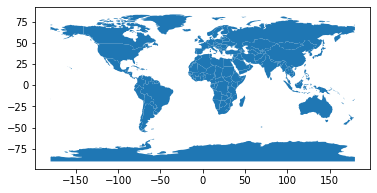

In [85]:
world.plot()

In [86]:
world=world.merge(affected_df,how='left', left_on='iso_a3', right_on='iso')
world

pop_est      continent                      name iso_a3  gdp_md_est  \
0       920938        Oceania                      Fiji    FJI      8374.0   
1     53950935         Africa                  Tanzania    TZA    150600.0   
2       603253         Africa                 W. Sahara    ESH       906.5   
3     35623680  North America                    Canada    CAN   1674000.0   
4    326625791  North America  United States of America    USA  18560000.0   
..         ...            ...                       ...    ...         ...   
172    7111024         Europe                    Serbia    SRB    101800.0   
173     642550         Europe                Montenegro    MNE     10610.0   
174    1895250         Europe                    Kosovo    KSV     18490.0   
175    1218208  North America       Trinidad and Tobago    TTO     43570.0   
176   13026129         Africa                  S. Sudan    SSD     20880.0   

                                              geometry  iso  \
0    MULTIPOLYGON (((180.00000 -16.06713, 180.00000...  FJI   
1    POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...  TZA   
2    POLYGON ((-8.66559 27.65643, -8.66512 27.58948...  ESH   
3    MULTIPOLYGON (((-122.84000 49.00000, -122.9742...  CAN   
4    MULTIPOLYGON (((-122.84000 49.00000, -120.0000...  USA   
..                                                 ...  ...   
172  POLYGON ((18.82982 45.90887, 18.82984 45.90888...  SRB   
173  POLYGON ((20.07070 42.58863, 19.80161 42.50009...  MNE   
174  POLYGON ((20.59025 41.85541, 20.52295 42.21787...  KSV   
175  POLYGON ((-61.68000 10.76000, -61.10500 10.890...  TTO   
176  POLYGON ((30.83385 3.50917, 29.95350 4.17370, ...  SSD   

     event_cnt_natcat_2000_asset  event_cnt_natcat_2000_fat  \
0                           19.0                       19.0   
1                           31.0                       31.0   
2                            2.0                        2.0   
3                           81.0                       81.0   
4                          298.0                      298.0   
..                           ...                        ...   
172                         19.0                       19.0   
173                          4.0                        4.0   
174                          3.0                        3.0   
175                         16.0                       16.0   
176                         15.0                       15.0   

     event_cnt_emdat_2000_asset  ...  match_cnt_natcat_fat  \
0                           6.0  ...                   1.0   
1                           1.0  ...                   5.0   
2                           0.0  ...                   0.0   
3                          10.0  ...                   9.0   
4                          53.0  ...                  34.0   
..                          ...  ...                   ...   
172                         2.0  ...                   5.0   
173                         0.0  ...                   0.0   
174                         0.0  ...                   1.0   
175                         1.0  ...                   0.0   
176                         0.0  ...                   2.0   

     match_cnt_natcat_asset  match_cnt_emdat_fat  match_cnt_emdat_asset  \
0                       1.0                  1.0                    1.0   
1                       5.0                  4.0                    0.0   
2                       0.0                  0.0                    0.0   
3                       9.0                  1.0                    1.0   
4                      34.0                 20.0                   17.0   
..                      ...                  ...                    ...   
172                     5.0                  0.0                    0.0   
173                     0.0                  0.0                    1.0   
174                     1.0                  0.0                    0.0   
175                     0.0                  0.0             

In [87]:
natcat_matched.iloc[:,20:40]

DFO_satellite_shape_area  affected_sum_GHSL  affected_mean_GHSL  \
0                     6.74524               86.0                 0.0   
2                  3379.93559          1997952.0               151.0   
3                   158.75028           113551.0                80.0   
4                  1502.72210          2037324.0               226.0   
5                   368.58164          2817642.0               873.0   
..                        ...                ...                 ...   
863                3877.40836          5842979.0               345.0   
864               20854.81652         25517612.0               445.0   
865                 964.46042           430541.0                91.0   
866               20854.81652         25517612.0               445.0   
867                 252.82010           282427.0               121.0   

     DFO_satellite_shape_pop_density_GHSL  affected_sum_GPW  \
0                                   12.75            4701.0   
2                                  591.12         2327358.0   
3                                  715.28          266353.0   
4                                 1355.76         2491374.0   
5                                 7644.55          665357.0   
..                                    ...               ...   
863                               1506.93        10199526.0   
864                               1223.58        38519316.0   
865                                446.41          282640.0   
866                               1223.58        38519316.0   
867                               1117.11          253803.0   

     affected_mean_GPW  DFO_satellite_shape_pop_density_GPW  GDP_affected_sum  \
0                 47.0                               696.94      1.671034e+09   
2                176.0                               688.58      1.154400e+10   
3                188.0                              1677.81      5.713043e+10   
4                276.0                              1657.91      5.349651e+10   
5                206.0                              1805.18      1.001818e+10   
..                 ...                                  ...               ...   
863              602.0                              2630.50      4.003951e+11   
864              673.0                              1847.02      7.516475e+11   
865               60.0                               293.06      1.184610e+10   
866              673.0                              1847.02      7.516475e+11   
867              108.0                              1003.89      2.122498e+11   

     cable_affected_sum  plant_affected_sum  power_pole_affected_sum  \
0               0.00000             0.19282                   3601.0   
2               0.00000             0.00000                      0.0   
3               0.00000             0.04441                      0.0   
4               0.00000             1.84390                     73.0   
5               0.74964             2.82772                    271.0   
..                  ...                 ...                      ...   
863             0.39208            42.51576                    298.0   
864             0.59587            26.06934                    458.0   
865             0.00000             0.00602                      0.0   
866             0.59587            26.06934                    458.0   
867             3.89346             7.08361                      0.0   

     power_tower_affected_sum  line_affected_sum  mast_affected_sum  \
0                      1019.0          285.28202                4.0   
2                      1529.0          474.86206                3.0   
3                      5144.0         1691.41609                9.0   
4                      6690.0         2397.73679                6.0   
5                      6785.0         1615.66446                0.0   
..                        ...                ...                ...   
863                   57560.0        18271.50973

## 1.8 Add regions and income groups

In [88]:
regions=pd.read_excel('/home/insauer/projects/submission_vul_sat/input_data/CLASS.xlsx')
regions=regions.dropna(subset=['Region'])
regions

Economy Code                      Region         Income group  \
0           Aruba  ABW   Latin America & Caribbean          High income   
1     Afghanistan  AFG                  South Asia           Low income   
2          Angola  AGO          Sub-Saharan Africa  Lower middle income   
3         Albania  ALB       Europe & Central Asia  Upper middle income   
4         Andorra  AND       Europe & Central Asia          High income   
..            ...  ...                         ...                  ...   
213        Kosovo  XKX       Europe & Central Asia  Upper middle income   
214   Yemen, Rep.  YEM  Middle East & North Africa           Low income   
215  South Africa  ZAF          Sub-Saharan Africa  Upper middle income   
216        Zambia  ZMB          Sub-Saharan Africa           Low income   
217      Zimbabwe  ZWE          Sub-Saharan Africa  Lower middle income   

    Lending category Other (EMU or HIPC)  
0                NaN                 NaN  
1                IDA                HIPC  
2               IBRD                 NaN  
3               IBRD                 NaN  
4                NaN                 NaN  
..               ...                 ...  
213              IDA                 NaN  
214              IDA                 NaN  
215             IBRD                 NaN  
216              IDA                HIPC  
217            Blend                 NaN  

[218 rows x 6 columns]

In [89]:
natcat_matched.loc[:,'income_group']=np.nan
natcat_matched.loc[:,'regions']=np.nan
emdat_matched.loc[:,'income_group']=np.nan
emdat_matched.loc[:,'regions']=np.nan
idmc_matched.loc[:,'income_group']=np.nan
idmc_matched.loc[:,'regions']=np.nan

/home/insauer/anaconda3/envs/climada_env/lib/python3.8/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


In [162]:
for iso in regions['Code']:
    natcat_matched.loc[natcat_matched['ISO']==iso,'income_group']=regions.loc[regions['Code']==iso,'Income group'].values[0]
    natcat_all.loc[natcat_all['ISO']==iso,'income_group']=regions.loc[regions['Code']==iso,'Income group'].values[0]
    emdat_matched.loc[emdat_matched['ISO3']==iso,'income_group']=regions.loc[regions['Code']==iso,'Income group'].values[0]
    emdat_org.loc[emdat_org['ISO']==iso,'income_group']=regions.loc[regions['Code']==iso,'Income group'].values[0]
    idmc_matched.loc[idmc_matched['ISO3']==iso,'income_group']=regions.loc[regions['Code']==iso,'Income group'].values[0]
    idmc_long.loc[idmc_long['ISO3']==iso,'income_group']=regions.loc[regions['Code']==iso,'Income group'].values[0]
    
    natcat_matched.loc[natcat_matched['ISO']==iso,'region']=regions.loc[regions['Code']==iso,'Region'].values[0]
    emdat_matched.loc[emdat_matched['ISO3']==iso,'region']=regions.loc[regions['Code']==iso,'Region'].values[0]
    idmc_matched.loc[idmc_matched['ISO3']==iso,'region']=regions.loc[regions['Code']==iso,'Region'].values[0]
    
    world.loc[world['iso']==iso, 'income_group']=regions.loc[regions['Code']==iso,'Income group'].values[0]
    world.loc[world['iso']==iso, 'region']=regions.loc[regions['Code']==iso,'Region'].values[0]

/home/insauer/anaconda3/envs/climada_env/lib/python3.8/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [91]:
natcat_matched.loc[natcat_matched['income_group'].isna()&~natcat_matched['ISO'].isna()]

year  ISO  tot_loss  ins_loss  tot_loss_GDP  tot_loss_GCP  \
46   2002.0  VEN       2.0       0.0      4.734071      4.254261   
168  2005.0  VEN      50.0       0.0     84.275346     68.911720   
391  2008.0  VEN       1.0       0.0      0.771274      0.918695   
499  2010.0  VEN     200.0       0.0    203.025965    158.951973   
698  2016.0  KSV       5.0       0.0      5.000000      5.000000   

     tot_loss_CPI  Fatalities    CPI_conv    GDP_conv  ...  \
46       3.469095         5.0    3.264150    6.148349  ...   
168     94.098902        52.0   88.539777  109.452152  ...   
391      1.091154         9.0    1.026692    1.001687  ...   
499    264.654821        35.0  249.019682  263.678879  ...   
698      5.000000         1.0    0.000000    0.000000  ...   

     FLOPROS_merged_mean  FLOPROS_modeled_mean  forest_cover_mean  \
46              15.26538              15.26538            0.00070   
168             15.73601              15.73601            0.00064   
391             12.72754              12.72754            0.00030   
499             14.56479              14.56479            0.00044   
698             57.25039              20.36236            0.00056   

                begin_dt  asset_conv  exposed_asset  days  income_group  \
46   2002-07-18 00:00:00    3.814947   4.714343e+11   929           NaN   
168  2005-02-07 00:00:00    3.838855   1.019460e+12  1864           NaN   
391  2008-11-20 00:00:00    3.629650   5.435425e+11  3246           NaN   
499  2010-11-25 00:00:00    3.766704   6.204377e+11  3981           NaN   
698  2016-03-06 00:00:00         NaN            NaN  5909           NaN   

     regions                     region  
46       NaN  Latin America & Caribbean  
168      NaN  Latin America & Caribbean  
391      NaN  Latin America & Caribbean  
499      NaN  Latin America & Caribbean  
698      NaN                        NaN  

[5 rows x 86 columns]

In [156]:
# fill information for missing columns
idmc_matched['gini']=np.nan
idmc_matched['gini_year']=np.nan
countries= list(set(idmc_matched['ISO3']))
missing_gini=[]
for y in np.arange(2000,2019):
    for c in countries:
        print(c)
        try:
            gini_idx= gini.loc[(gini['iso']==c) & (gini['year']==y),'gini_disp'].values[0]
            idmc_matched.loc[(idmc_matched['ISO3']==c) & (idmc_matched['year']==y), 'gini']=gini_idx
            idmc_matched.loc[(idmc_matched['ISO3']==c) & (idmc_matched['year']==y), 'gini_year']=y
        except IndexError:
            try:
                other_years= gini.loc[(gini['iso']==c),'year'].values
                min_year= other_years[np.argmin(np.abs(y-other_years))]
                gini_idx= gini.loc[(gini['iso']==c) & (gini['year']==min_year),'gini_disp'].values[0]   
                idmc_matched.loc[(idmc_matched['ISO3']==c) & (idmc_matched['year']==y), 'gini']=gini_idx
                idmc_matched.loc[(idmc_matched['ISO3']==c) & (idmc_matched['year']==y), 'gini_year']=min_year
            except ValueError:
                missing_gini.append(c)['ISO']=='KSV', 'income_group']='Upper middle income'
natcat_matched.loc[natcat_matched['income_group'].isna()]

Empty DataFrame
Columns: [year, ISO, tot_loss, ins_loss, tot_loss_GDP, tot_loss_GCP, tot_loss_CPI, Fatalities, CPI_conv, GDP_conv, unexact_conv, CPI_conv_ppp, GDP_conv_ppp, unexact_conv_ppp, index, DFO_matches, DFO_matches_nr, matching_type, DFO_matches_time_dif, DFO_duration, DFO_satellite_shape_area, affected_sum_GHSL, affected_mean_GHSL, DFO_satellite_shape_pop_density_GHSL, affected_sum_GPW, affected_mean_GPW, DFO_satellite_shape_pop_density_GPW, GDP_affected_sum, cable_affected_sum, plant_affected_sum, power_pole_affected_sum, power_tower_affected_sum, line_affected_sum, mast_affected_sum, communication_tower_affected_sum, doctors_affected_sum, hospital_affected_sum, pharmacy_affected_sum, primary_road_affected_sum, tertiary_road_affected_sum, reservoir_affected_sum, school_affected_sum, university_affected_sum, GDP_affected_mean, education_affected_mean, energy_affected_mean, health_affected_mean, telecommunication_affected_mean, transportation_affected_mean, water_affected_mean, CISI_global_affected_mean, cable_affected_mean, plant_affected_mean, power_pole_affected_mean, power_tower_affected_mean, line_affected_mean, mast_affected_mean, communication_tower_affected_mean, doctors_affected_mean, hospital_affected_mean, pharmacy_affected_mean, primary_road_affected_mean, tertiary_road_affected_mean, reservoir_affected_mean, school_affected_mean, university_affected_mean, GDPpc_mean, HDI_mean, urbanization_mean, landuse_total_mean, elevation, roughness, slope, female_mean, pop_0_14_mean, pop_65_plus_mean, FLOPROS_merged_mean, FLOPROS_modeled_mean, forest_cover_mean, begin_dt, asset_conv, exposed_asset, days, income_group, regions, region, development, gini, gini_year]
Index: []

[0 rows x 89 columns]

In [93]:
natcat_matched.loc[natcat_matched['region'].isna()]

year  ISO  tot_loss  ins_loss  tot_loss_GDP  tot_loss_GCP  \
698  2016.0  KSV       5.0       0.0           5.0           5.0   

     tot_loss_CPI  Fatalities  CPI_conv  GDP_conv  ...  FLOPROS_merged_mean  \
698           5.0         1.0       0.0       0.0  ...             57.25039   

     FLOPROS_modeled_mean  forest_cover_mean             begin_dt  asset_conv  \
698              20.36236            0.00056  2016-03-06 00:00:00         NaN   

     exposed_asset  days         income_group  regions  region  
698            NaN  5909  Upper middle income      NaN     NaN  

[1 rows x 86 columns]

In [94]:
natcat_matched.loc[natcat_matched['ISO']=='KSV', 'region']='Europe & Central Asia'
natcat_matched.loc[natcat_matched['region'].isna()]

/home/insauer/anaconda3/envs/climada_env/lib/python3.8/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


Empty DataFrame
Columns: [year, ISO, tot_loss, ins_loss, tot_loss_GDP, tot_loss_GCP, tot_loss_CPI, Fatalities, CPI_conv, GDP_conv, unexact_conv, CPI_conv_ppp, GDP_conv_ppp, unexact_conv_ppp, index, DFO_matches, DFO_matches_nr, matching_type, DFO_matches_time_dif, DFO_duration, DFO_satellite_shape_area, affected_sum_GHSL, affected_mean_GHSL, DFO_satellite_shape_pop_density_GHSL, affected_sum_GPW, affected_mean_GPW, DFO_satellite_shape_pop_density_GPW, GDP_affected_sum, cable_affected_sum, plant_affected_sum, power_pole_affected_sum, power_tower_affected_sum, line_affected_sum, mast_affected_sum, communication_tower_affected_sum, doctors_affected_sum, hospital_affected_sum, pharmacy_affected_sum, primary_road_affected_sum, tertiary_road_affected_sum, reservoir_affected_sum, school_affected_sum, university_affected_sum, GDP_affected_mean, education_affected_mean, energy_affected_mean, health_affected_mean, telecommunication_affected_mean, transportation_affected_mean, water_affected_mean, CISI_global_affected_mean, cable_affected_mean, plant_affected_mean, power_pole_affected_mean, power_tower_affected_mean, line_affected_mean, mast_affected_mean, communication_tower_affected_mean, doctors_affected_mean, hospital_affected_mean, pharmacy_affected_mean, primary_road_affected_mean, tertiary_road_affected_mean, reservoir_affected_mean, school_affected_mean, university_affected_mean, GDPpc_mean, HDI_mean, urbanization_mean, landuse_total_mean, elevation, roughness, slope, female_mean, pop_0_14_mean, pop_65_plus_mean, FLOPROS_merged_mean, FLOPROS_modeled_mean, forest_cover_mean, begin_dt, asset_conv, exposed_asset, days, income_group, regions, region]
Index: []

[0 rows x 86 columns]

In [95]:
emdat_matched.loc[emdat_matched['region'].isna()]

Empty DataFrame
Columns: [ISO3, year, disasterno, total_deaths, no_injured, no_affected_EMDAT, no_homeles, total_affected_EMDAT, total_damages_(000_USD), idx, DFO_matches, DFO_matches_nr, matching_type, DFO_matches_time_dif, DFO_duration, DFO_satellite_shape_area, affected_sum_GHSL, affected_mean_GHSL, DFO_satellite_shape_pop_density_GHSL, affected_sum_GPW, affected_mean_GPW, DFO_satellite_shape_pop_density_GPW, GDP_affected_sum, cable_affected_sum, plant_affected_sum, power_pole_affected_sum, power_tower_affected_sum, line_affected_sum, mast_affected_sum, communication_tower_affected_sum, doctors_affected_sum, hospital_affected_sum, pharmacy_affected_sum, primary_road_affected_sum, tertiary_road_affected_sum, reservoir_affected_sum, school_affected_sum, university_affected_sum, GDP_affected_mean, education_affected_mean, energy_affected_mean, health_affected_mean, telecommunication_affected_mean, transportation_affected_mean, water_affected_mean, CISI_global_affected_mean, cable_affected_mean, plant_affected_mean, power_pole_affected_mean, power_tower_affected_mean, line_affected_mean, mast_affected_mean, communication_tower_affected_mean, doctors_affected_mean, hospital_affected_mean, pharmacy_affected_mean, primary_road_affected_mean, tertiary_road_affected_mean, reservoir_affected_mean, school_affected_mean, university_affected_mean, GDPpc_mean, HDI_mean, urbanization_mean, landuse_total_mean, female_mean, pop_0_14_mean, pop_65_plus_mean, FLOPROS_merged_mean, FLOPROS_modeled_mean, forest_cover_mean, DisNo0, DisNo1, DisNo2, DisNo3, days, cpi, total_damages_(000_USD)_adj2021, total_damages_(000_USD)_adj2011, CPI_conv_ppp, total_damages_(000_USD)_conv_ppp, asset_conv, exposed_asset, income_group, regions, region]
Index: []

[0 rows x 86 columns]

In [96]:
emdat_matched.loc[emdat_matched['income_group'].isna()]

ISO3    year disasterno  total_deaths  no_injured  no_affected_EMDAT  \
8    VEN  2005.0  2005-0073          76.0        42.0            25000.0   
55   VEN  2010.0  2010-0616          41.0         NaN            94800.0   
178  VEN  2004.0  2004-0676          35.0         NaN                NaN   
343  VEN  2002.0  2002-0445           4.0         NaN            55376.0   

     no_homeles  total_affected_EMDAT  total_damages_(000_USD)  idx  ...  \
8           NaN               25042.0                  50000.0  0.0  ...   
55          NaN               94800.0                 170000.0  0.0  ...   
178      4000.0                4000.0                      NaN  0.0  ...   
343         NaN               55376.0                   3000.0  0.0  ...   

           cpi total_damages_(000_USD)_adj2021  \
8    72.071410                    69375.636866   
55   80.472285                   211252.855165   
178  69.706442                             NaN   
343  66.381964                     4519.299871   

     total_damages_(000_USD)_adj2011  CPI_conv_ppp  \
8                       57590.571540           0.0   
55                     175366.644804           0.0   
178                              NaN           0.0   
343                      3751.591687           0.0   

     total_damages_(000_USD)_conv_ppp  asset_conv  exposed_asset  \
8                        39789.873777    3.838855   6.899162e+11   
55                      164841.603034    3.766704   4.660689e+11   
178                               NaN    3.889672   1.327869e+11   
343                       1964.872558    3.814947   3.916889e+10   

     income_group  regions                     region  
8             NaN      NaN  Latin America & Caribbean  
55            NaN      NaN  Latin America & Caribbean  
178           NaN      NaN  Latin America & Caribbean  
343           NaN      NaN  Latin America & Caribbean  

[4 rows x 86 columns]

In [158]:
emdat_matched.loc[emdat_matched['ISO3']=='VEN', 'income_group']='High income'
emdat_matched.loc[emdat_matched['income_group'].isna()]
emdat_org.loc[emdat_org['ISO']=='VEN', 'income_group']='High income'
emdat_org.loc[emdat_org['income_group'].isna()]

Dis No  Year   Seq           Glide Disaster Group  \
49     1919-0007-AIA  1919     7             NaN        Natural   
50     1919-9006-AIA  1919  9006             NaN        Natural   
55     1920-0012-AIA  1920    12             NaN        Natural   
57     1920-0005-DFR  1920     5             NaN        Natural   
60     1921-0005-AIA  1921     5             NaN        Natural   
...              ...   ...   ...             ...            ...   
15787  1930-0032-SUN  1930    32             NaN        Natural   
15805  1943-0052-YUG  1943    52             NaN        Natural   
16141  2021-0613-SPI  2021   613             NaN        Natural   
16246  2022-0603-GLP  2022   603  TC-2022-000314        Natural   
16258  2022-0061-REU  2022    61             NaN        Natural   

      Disaster Subgroup      Disaster Type  Disaster Subtype  \
49           Biological           Epidemic     Viral disease   
50       Climatological            Drought           Drought   
55           Biological           Epidemic     Viral disease   
57         Hydrological              Flood               NaN   
60           Biological           Epidemic     Viral disease   
...                 ...                ...               ...   
15787       Geophysical         Earthquake   Ground movement   
15805       Geophysical         Earthquake   Ground movement   
16141       Geophysical  Volcanic activity         Lava flow   
16246    Meteorological              Storm  Tropical cyclone   
16258    Meteorological              Storm  Tropical cyclone   

      Disaster Subsubtype            Event Name  ... Total Damages ('000 US$)  \
49                    NaN                   NaN  ...                      NaN   
50                    NaN                   NaN  ...                      NaN   
55                    NaN                   NaN  ...                      NaN   
57                    NaN                   NaN  ...                  20000.0   
60                    NaN                   NaN  ...                      NaN   
...                   ...                   ...  ...                      ...   
15787                 NaN                   NaN  ...                      NaN   
15805                 NaN                   NaN  ...                      NaN   
16141                 NaN  Cumbre Vieja volcano  ...                1000000.0   
16246                 NaN     Hurricane 'Fiona'  ...                      NaN   
16258                 NaN    Cyclone 'Batsirai'  ...                      NaN   

      Total Damages, Adjusted ('000 US$)         CPI Adm Level Admin1 Code  \
49                                   NaN    6.412657       NaN         NaN   
50                                   NaN    6.412657       NaN         NaN   
55                                   NaN    7.409635       NaN         NaN   
57                              269919.0    7.409635       NaN         NaN   
60                                   NaN    6.597283       NaN         NaN   
...                                  ...         ...       ...         ...   
15787                                NaN    6.178799       NaN         NaN   
15805                                NaN    6.400349       NaN         NaN   
16141                          1000000.0  100.000000         2         NaN   
16246                                NaN         NaN       NaN         NaN   
16258                                NaN         NaN       NaN         NaN   

      Admin2 Code        Geo Locations gini gini_year income_group  
49            NaN                  NaN  NaN       NaN          NaN  
50            NaN                  NaN  NaN       NaN          NaN  
55            NaN                  NaN  NaN       NaN          NaN  
57            NaN                  NaN  NaN       NaN          NaN  
60            NaN                  NaN  NaN       NaN          NaN  
...           ...                  ...  ...       ...          ...  
15787         NaN                  NaN  NaN    

In [98]:
idmc_matched.loc[idmc_matched['region'].isna()]

Empty DataFrame
Columns: [ISO3, year, displacements, GID_1, GID_2, num_provinces, num_districts, DFO_matches, DFO_matches_nr, matching_type, DFO_matches_time_dif, DFO_duration, DFO_satellite_shape_area, affected_sum_GHSL, affected_mean_GHSL, DFO_satellite_shape_pop_density_GHSL, affected_sum_GPW, affected_mean_GPW, DFO_satellite_shape_pop_density_GPW, GDP_affected_sum, cable_affected_sum, plant_affected_sum, power_pole_affected_sum, power_tower_affected_sum, line_affected_sum, mast_affected_sum, communication_tower_affected_sum, doctors_affected_sum, hospital_affected_sum, pharmacy_affected_sum, primary_road_affected_sum, tertiary_road_affected_sum, reservoir_affected_sum, school_affected_sum, university_affected_sum, GDP_affected_mean, CISI_global_affected_mean, cable_affected_mean, plant_affected_mean, power_pole_affected_mean, power_tower_affected_mean, line_affected_mean, mast_affected_mean, communication_tower_affected_mean, doctors_affected_mean, hospital_affected_mean, pharmacy_affected_mean, primary_road_affected_mean, tertiary_road_affected_mean, reservoir_affected_mean, school_affected_mean, university_affected_mean, GDPpc_mean, HDI_mean, urbanization_mean, landuse_total_mean, female_mean, pop_0_14_mean, pop_65_plus_mean, FLOPROS_merged_mean, FLOPROS_modeled_mean, forest_cover_mean, start_date, days, income_group, regions, region]
Index: []

[0 rows x 67 columns]

In [99]:
idmc_matched.loc[idmc_matched['income_group'].isna()]

ISO3    year  displacements                    GID_1  \
257  VEN  2008.0         4695.0                      NaN   
258  VEN  2015.0        45297.0                      NaN   
259  VEN  2017.0         2076.0  VEN.1_1,VEN.6_1,VEN.9_1   

                                                 GID_2  num_provinces  \
257                                                NaN            NaN   
258                                                NaN            NaN   
259  VEN.2.3_1,VEN.4.1_1,VEN.5.6_1,VEN.12.2_1,VEN.1...            3.0   

     num_districts  DFO_matches DFO_matches_nr  matching_type  ...  \
257            NaN            2   [3421, 3422]              2  ...   
258            NaN            1           4275              1  ...   
259            1.0            1           4495              1  ...   

     pop_0_14_mean  pop_65_plus_mean  FLOPROS_merged_mean  \
257        0.31947           0.05095             12.73320   
258        0.38652           0.02956             12.11111   
259        0.36568           0.03743             14.40330   

     FLOPROS_modeled_mean  forest_cover_mean  start_date  days  income_group  \
257              12.73320            0.00030  2008-11-20  3246           NaN   
258              12.11111            0.00080  2015-06-29  5658           NaN   
259              14.40330            0.00109  2017-08-04  6425           NaN   

     regions                     region  
257      NaN  Latin America & Caribbean  
258      NaN  Latin America & Caribbean  
259      NaN  Latin America & Caribbean  

[3 rows x 67 columns]

In [100]:
idmc_matched.loc[idmc_matched['ISO3']=='VEN', 'income_group']='High income'
idmc_matched.loc[idmc_matched['income_group'].isna()]

Empty DataFrame
Columns: [ISO3, year, displacements, GID_1, GID_2, num_provinces, num_districts, DFO_matches, DFO_matches_nr, matching_type, DFO_matches_time_dif, DFO_duration, DFO_satellite_shape_area, affected_sum_GHSL, affected_mean_GHSL, DFO_satellite_shape_pop_density_GHSL, affected_sum_GPW, affected_mean_GPW, DFO_satellite_shape_pop_density_GPW, GDP_affected_sum, cable_affected_sum, plant_affected_sum, power_pole_affected_sum, power_tower_affected_sum, line_affected_sum, mast_affected_sum, communication_tower_affected_sum, doctors_affected_sum, hospital_affected_sum, pharmacy_affected_sum, primary_road_affected_sum, tertiary_road_affected_sum, reservoir_affected_sum, school_affected_sum, university_affected_sum, GDP_affected_mean, CISI_global_affected_mean, cable_affected_mean, plant_affected_mean, power_pole_affected_mean, power_tower_affected_mean, line_affected_mean, mast_affected_mean, communication_tower_affected_mean, doctors_affected_mean, hospital_affected_mean, pharmacy_affected_mean, primary_road_affected_mean, tertiary_road_affected_mean, reservoir_affected_mean, school_affected_mean, university_affected_mean, GDPpc_mean, HDI_mean, urbanization_mean, landuse_total_mean, female_mean, pop_0_14_mean, pop_65_plus_mean, FLOPROS_merged_mean, FLOPROS_modeled_mean, forest_cover_mean, start_date, days, income_group, regions, region]
Index: []

[0 rows x 67 columns]

In [101]:
world.loc[world['region'].isna()&~world['iso'].isna()]

pop_est   continent        name iso_a3  gdp_md_est  \
2     603253      Africa   W. Sahara    ESH       906.5   
159     4050  Antarctica  Antarctica    ATA       810.0   
174  1895250      Europe      Kosovo    KSV     18490.0   

                                              geometry  iso  \
2    POLYGON ((-8.66559 27.65643, -8.66512 27.58948...  ESH   
159  MULTIPOLYGON (((-48.66062 -78.04702, -48.15140...  ATA   
174  POLYGON ((20.59025 41.85541, 20.52295 42.21787...  KSV   

     event_cnt_natcat_2000_asset  event_cnt_natcat_2000_fat  \
2                            2.0                        2.0   
159                          1.0                        1.0   
174                          3.0                        3.0   

     event_cnt_emdat_2000_asset  ...  match_cnt_emdat_fat  \
2                           0.0  ...                  0.0   
159                         0.0  ...                  0.0   
174                         0.0  ...                  0.0   

     match_cnt_emdat_asset  match_cnt_idmc  matches_share_natcat_asset  \
2                      0.0             0.0                    0.000000   
159                    0.0             0.0                    0.000000   
174                    0.0             0.0                    0.333333   

     matches_share_natcat_fat  matches_share_emdat_asset  \
2                    0.000000                        NaN   
159                  0.000000                        NaN   
174                  0.333333                        NaN   

     matches_share_emdat_fat  matches_share_idmc  income_group  region  
2                        NaN                 NaN           NaN     NaN  
159                      NaN                 NaN           NaN     NaN  
174                      NaN                 NaN           NaN     NaN  

[3 rows x 24 columns]

In [102]:
world.loc[world['iso']=='KSV', 'region']='Europe & Central Asia'
world.loc[world['iso']=='ESH', 'region']='Middle East & North Africa'

In [103]:
world=world.dropna(subset=['iso'])

In [104]:
world.loc[world['income_group'].isna()]

pop_est      continent        name iso_a3  gdp_md_est  \
2      603253         Africa   W. Sahara    ESH       906.5   
40   31304016  South America   Venezuela    VEN    468600.0   
159      4050     Antarctica  Antarctica    ATA       810.0   
174   1895250         Europe      Kosovo    KSV     18490.0   

                                              geometry  iso  \
2    POLYGON ((-8.66559 27.65643, -8.66512 27.58948...  ESH   
40   POLYGON ((-60.73357 5.20028, -60.60118 4.91810...  VEN   
159  MULTIPOLYGON (((-48.66062 -78.04702, -48.15140...  ATA   
174  POLYGON ((20.59025 41.85541, 20.52295 42.21787...  KSV   

     event_cnt_natcat_2000_asset  event_cnt_natcat_2000_fat  \
2                            2.0                        2.0   
40                          33.0                       33.0   
159                          1.0                        1.0   
174                          3.0                        3.0   

     event_cnt_emdat_2000_asset  ...  match_cnt_emdat_fat  \
2                           0.0  ...                  0.0   
40                          6.0  ...                  4.0   
159                         0.0  ...                  0.0   
174                         0.0  ...                  0.0   

     match_cnt_emdat_asset  match_cnt_idmc  matches_share_natcat_asset  \
2                      0.0             0.0                    0.000000   
40                     3.0             3.0                    0.121212   
159                    0.0             0.0                    0.000000   
174                    0.0             0.0                    0.333333   

     matches_share_natcat_fat  matches_share_emdat_asset  \
2                    0.000000                        NaN   
40                   0.121212                        0.5   
159                  0.000000                        NaN   
174                  0.333333                        NaN   

     matches_share_emdat_fat  matches_share_idmc  income_group  \
2                        NaN                 NaN           NaN   
40                  0.285714                0.25           NaN   
159                      NaN                 NaN           NaN   
174                      NaN                 NaN           NaN   

                         region  
2    Middle East & North Africa  
40    Latin America & Caribbean  
159                         NaN  
174       Europe & Central Asia  

[4 rows x 24 columns]

In [105]:
world.loc[world['iso']=='VEN', 'income_group']='High income'
world.loc[world['iso']=='KSV', 'income_group']='Upper middle income'
world.loc[world['iso']=='ESH', 'income_group']='Low income'

/home/insauer/anaconda3/envs/climada_env/lib/python3.8/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [106]:
list(set(world['region']))

[nan,
 'Europe & Central Asia',
 'Sub-Saharan Africa',
 'Middle East & North Africa',
 'South Asia',
 'East Asia & Pacific',
 'North America',
 'Latin America & Caribbean']

In [107]:
world['income_group_num']=world['income_group'].replace(['Lower middle income',
 'Low income',
 'High income',
 'Upper middle income'], [1,0,3,2])

world['region_num']=world['region'].replace(['Sub-Saharan Africa',
 'Europe & Central Asia',
 'Middle East & North Africa',
 'Latin America & Caribbean',
 'East Asia & Pacific',
 'South Asia',
 'North America'], [0,1,2,3,4,5,6])


/home/insauer/anaconda3/envs/climada_env/lib/python3.8/site-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [108]:
# Assign categorical values for development
#https://hdr.undp.org/data-center/human-development-index#/indicies/HDI
natcat_matched['development']=np.nan
emdat_matched['development']=np.nan
idmc_matched['development']=np.nan

natcat_matched.loc[natcat_matched['HDI_mean']<=0.55, 'development']='low'
natcat_matched.loc[(natcat_matched['HDI_mean']>0.55)&
                   (natcat_matched['HDI_mean']<=0.699)
                   , 'development']='medium'

natcat_matched.loc[(natcat_matched['HDI_mean']>0.699)&
                   (natcat_matched['HDI_mean']<=0.8)
                   , 'development']='high'
natcat_matched.loc[natcat_matched['HDI_mean']>0.8, 'development']='very high'

emdat_matched.loc[emdat_matched['HDI_mean']<=0.55, 'development']='low'
emdat_matched.loc[(emdat_matched['HDI_mean']>0.55)&
                   (emdat_matched['HDI_mean']<=0.699)
                   , 'development']='medium'

emdat_matched.loc[(emdat_matched['HDI_mean']>0.699)&
                   (emdat_matched['HDI_mean']<=0.8)
                   , 'development']='high'
emdat_matched.loc[emdat_matched['HDI_mean']>0.8, 'development']='very high'

idmc_matched.loc[idmc_matched['HDI_mean']<=0.55, 'development']='low'
idmc_matched.loc[(idmc_matched['HDI_mean']>0.55)&
                   (idmc_matched['HDI_mean']<=0.699)
                   , 'development']='medium'

idmc_matched.loc[(idmc_matched['HDI_mean']>0.699)&
                   (idmc_matched['HDI_mean']<=0.8)
                   , 'development']='high'
idmc_matched.loc[idmc_matched['HDI_mean']>0.8, 'development']='very high'

/tmp/ipykernel_7883/1441044900.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  natcat_matched['development']=np.nan


In [109]:
world

pop_est      continent                      name iso_a3  gdp_md_est  \
0       920938        Oceania                      Fiji    FJI      8374.0   
1     53950935         Africa                  Tanzania    TZA    150600.0   
2       603253         Africa                 W. Sahara    ESH       906.5   
3     35623680  North America                    Canada    CAN   1674000.0   
4    326625791  North America  United States of America    USA  18560000.0   
..         ...            ...                       ...    ...         ...   
172    7111024         Europe                    Serbia    SRB    101800.0   
173     642550         Europe                Montenegro    MNE     10610.0   
174    1895250         Europe                    Kosovo    KSV     18490.0   
175    1218208  North America       Trinidad and Tobago    TTO     43570.0   
176   13026129         Africa                  S. Sudan    SSD     20880.0   

                                              geometry  iso  \
0    MULTIPOLYGON (((180.00000 -16.06713, 180.00000...  FJI   
1    POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...  TZA   
2    POLYGON ((-8.66559 27.65643, -8.66512 27.58948...  ESH   
3    MULTIPOLYGON (((-122.84000 49.00000, -122.9742...  CAN   
4    MULTIPOLYGON (((-122.84000 49.00000, -120.0000...  USA   
..                                                 ...  ...   
172  POLYGON ((18.82982 45.90887, 18.82984 45.90888...  SRB   
173  POLYGON ((20.07070 42.58863, 19.80161 42.50009...  MNE   
174  POLYGON ((20.59025 41.85541, 20.52295 42.21787...  KSV   
175  POLYGON ((-61.68000 10.76000, -61.10500 10.890...  TTO   
176  POLYGON ((30.83385 3.50917, 29.95350 4.17370, ...  SSD   

     event_cnt_natcat_2000_asset  event_cnt_natcat_2000_fat  \
0                           19.0                       19.0   
1                           31.0                       31.0   
2                            2.0                        2.0   
3                           81.0                       81.0   
4                          298.0                      298.0   
..                           ...                        ...   
172                         19.0                       19.0   
173                          4.0                        4.0   
174                          3.0                        3.0   
175                         16.0                       16.0   
176                         15.0                       15.0   

     event_cnt_emdat_2000_asset  ...  match_cnt_idmc  \
0                           6.0  ...             1.0   
1                           1.0  ...             6.0   
2                           0.0  ...             0.0   
3                          10.0  ...             1.0   
4                          53.0  ...            14.0   
..                          ...  ...             ...   
172                         2.0  ...             1.0   
173                         0.0  ...             1.0   
174                         0.0  ...             0.0   
175                         1.0  ...             0.0   
176                         0.0  ...             3.0   

     matches_share_natcat_asset  matches_share_natcat_fat  \
0                      0.052632                  0.052632   
1                      0.161290                  0.161290   
2                      0.000000                  0.000000   
3                      0.111111                  0.111111   
4                      0.114094                  0.114094   
..                          ...                       ...   
172                    0.263158                  0.263158   
173                    0.000000                  0.000000   
174                    0.333333                  0.333333   
175                    0.000000                  0.000000   
176                    0.133333                  0.133333   

     matches_share_emdat_asset  matches_share_emdat_fat  matches_share_idmc  \
0                     0.166667                 0.142857            0.20

In [110]:
natcat_matched.loc[(~natcat_matched['CPI_conv_ppp'].isna())&(natcat_matched['CPI_conv_ppp']>0), 'region'].value_counts()

East Asia & Pacific           203
South Asia                    159
Europe & Central Asia         129
Sub-Saharan Africa            120
Latin America & Caribbean     113
North America                  43
Middle East & North Africa     25
Name: region, dtype: int64

In [111]:
natcat_matched.loc[~natcat_matched['Fatalities'].isna(), 'region'].value_counts()

East Asia & Pacific           203
South Asia                    159
Europe & Central Asia         135
Sub-Saharan Africa            122
Latin America & Caribbean     113
North America                  43
Middle East & North Africa     25
Name: region, dtype: int64

In [112]:
emdat_matched.loc[(~emdat_matched['total_damages_(000_USD)_conv_ppp'].isna())&(emdat_matched['total_damages_(000_USD)_conv_ppp']>0), 'region'].value_counts()

East Asia & Pacific           105
Europe & Central Asia          47
South Asia                     47
Latin America & Caribbean      31
North America                  18
Sub-Saharan Africa             17
Middle East & North Africa      4
Name: region, dtype: int64

In [113]:
emdat_matched.loc[(~emdat_matched['total_deaths'].isna()), 'region'].value_counts()

East Asia & Pacific           142
South Asia                    135
Sub-Saharan Africa            102
Latin America & Caribbean      82
Europe & Central Asia          57
North America                  21
Middle East & North Africa     14
Name: region, dtype: int64

In [114]:
idmc_matched.loc[(~idmc_matched['displacements'].isna()), 'region'].value_counts()

East Asia & Pacific           91
Sub-Saharan Africa            72
South Asia                    64
Latin America & Caribbean     58
Europe & Central Asia         22
North America                 15
Middle East & North Africa     5
Name: region, dtype: int64

In [115]:
natcat_matched.loc[(~natcat_matched['CPI_conv_ppp'].isna())&(natcat_matched['CPI_conv_ppp']>0), 'income_group'].value_counts()

Lower middle income    334
Upper middle income    208
High income            172
Low income              78
Name: income_group, dtype: int64

In [116]:
natcat_matched.loc[~natcat_matched['Fatalities'].isna(), 'income_group'].value_counts()

Lower middle income    334
Upper middle income    214
High income            172
Low income              80
Name: income_group, dtype: int64

In [117]:
emdat_matched.loc[(~emdat_matched['total_damages_(000_USD)_conv_ppp'].isna())&(emdat_matched['total_damages_(000_USD)_conv_ppp']>0), 'income_group'].value_counts()

Upper middle income    101
Lower middle income     98
High income             59
Low income              11
Name: income_group, dtype: int64

In [118]:
emdat_matched.loc[(~emdat_matched['total_deaths'].isna()), 'income_group'].value_counts()

Lower middle income    258
Upper middle income    150
High income             77
Low income              68
Name: income_group, dtype: int64

In [119]:
idmc_matched.loc[(~idmc_matched['displacements'].isna()), 'income_group'].value_counts()

Lower middle income    147
Upper middle income    105
Low income              39
High income             36
Name: income_group, dtype: int64

In [120]:
cm = 1/2.54
x_width= 18.0*cm
y_width= 21.5*cm
y_width

8.464566929133857

In [121]:
world2= world.replace([0],[np.nan])

/tmp/ipykernel_7883/3766726510.py:42: MatplotlibDeprecationWarning: In a future version, 'pad' will default to rcParams['figure.subplot.hspace'].  Set pad=0 to keep the old behavior.
  cax = divider.append_axes("bottom", size="5%")
/tmp/ipykernel_7883/3766726510.py:53: UserWarning: FixedFormatter should only be used together with FixedLocator
  cax.set_xticklabels(ticks, fontsize=6)
/tmp/ipykernel_7883/3766726510.py:42: MatplotlibDeprecationWarning: In a future version, 'pad' will default to rcParams['figure.subplot.hspace'].  Set pad=0 to keep the old behavior.
  cax = divider.append_axes("bottom", size="5%")
/tmp/ipykernel_7883/3766726510.py:53: UserWarning: FixedFormatter should only be used together with FixedLocator
  cax.set_xticklabels(ticks, fontsize=6)
/tmp/ipykernel_7883/3766726510.py:42: MatplotlibDeprecationWarning: In a future version, 'pad' will default to rcParams['figure.subplot.hspace'].  Set pad=0 to keep the old behavior.
  cax = divider.append_axes("bottom", size="5

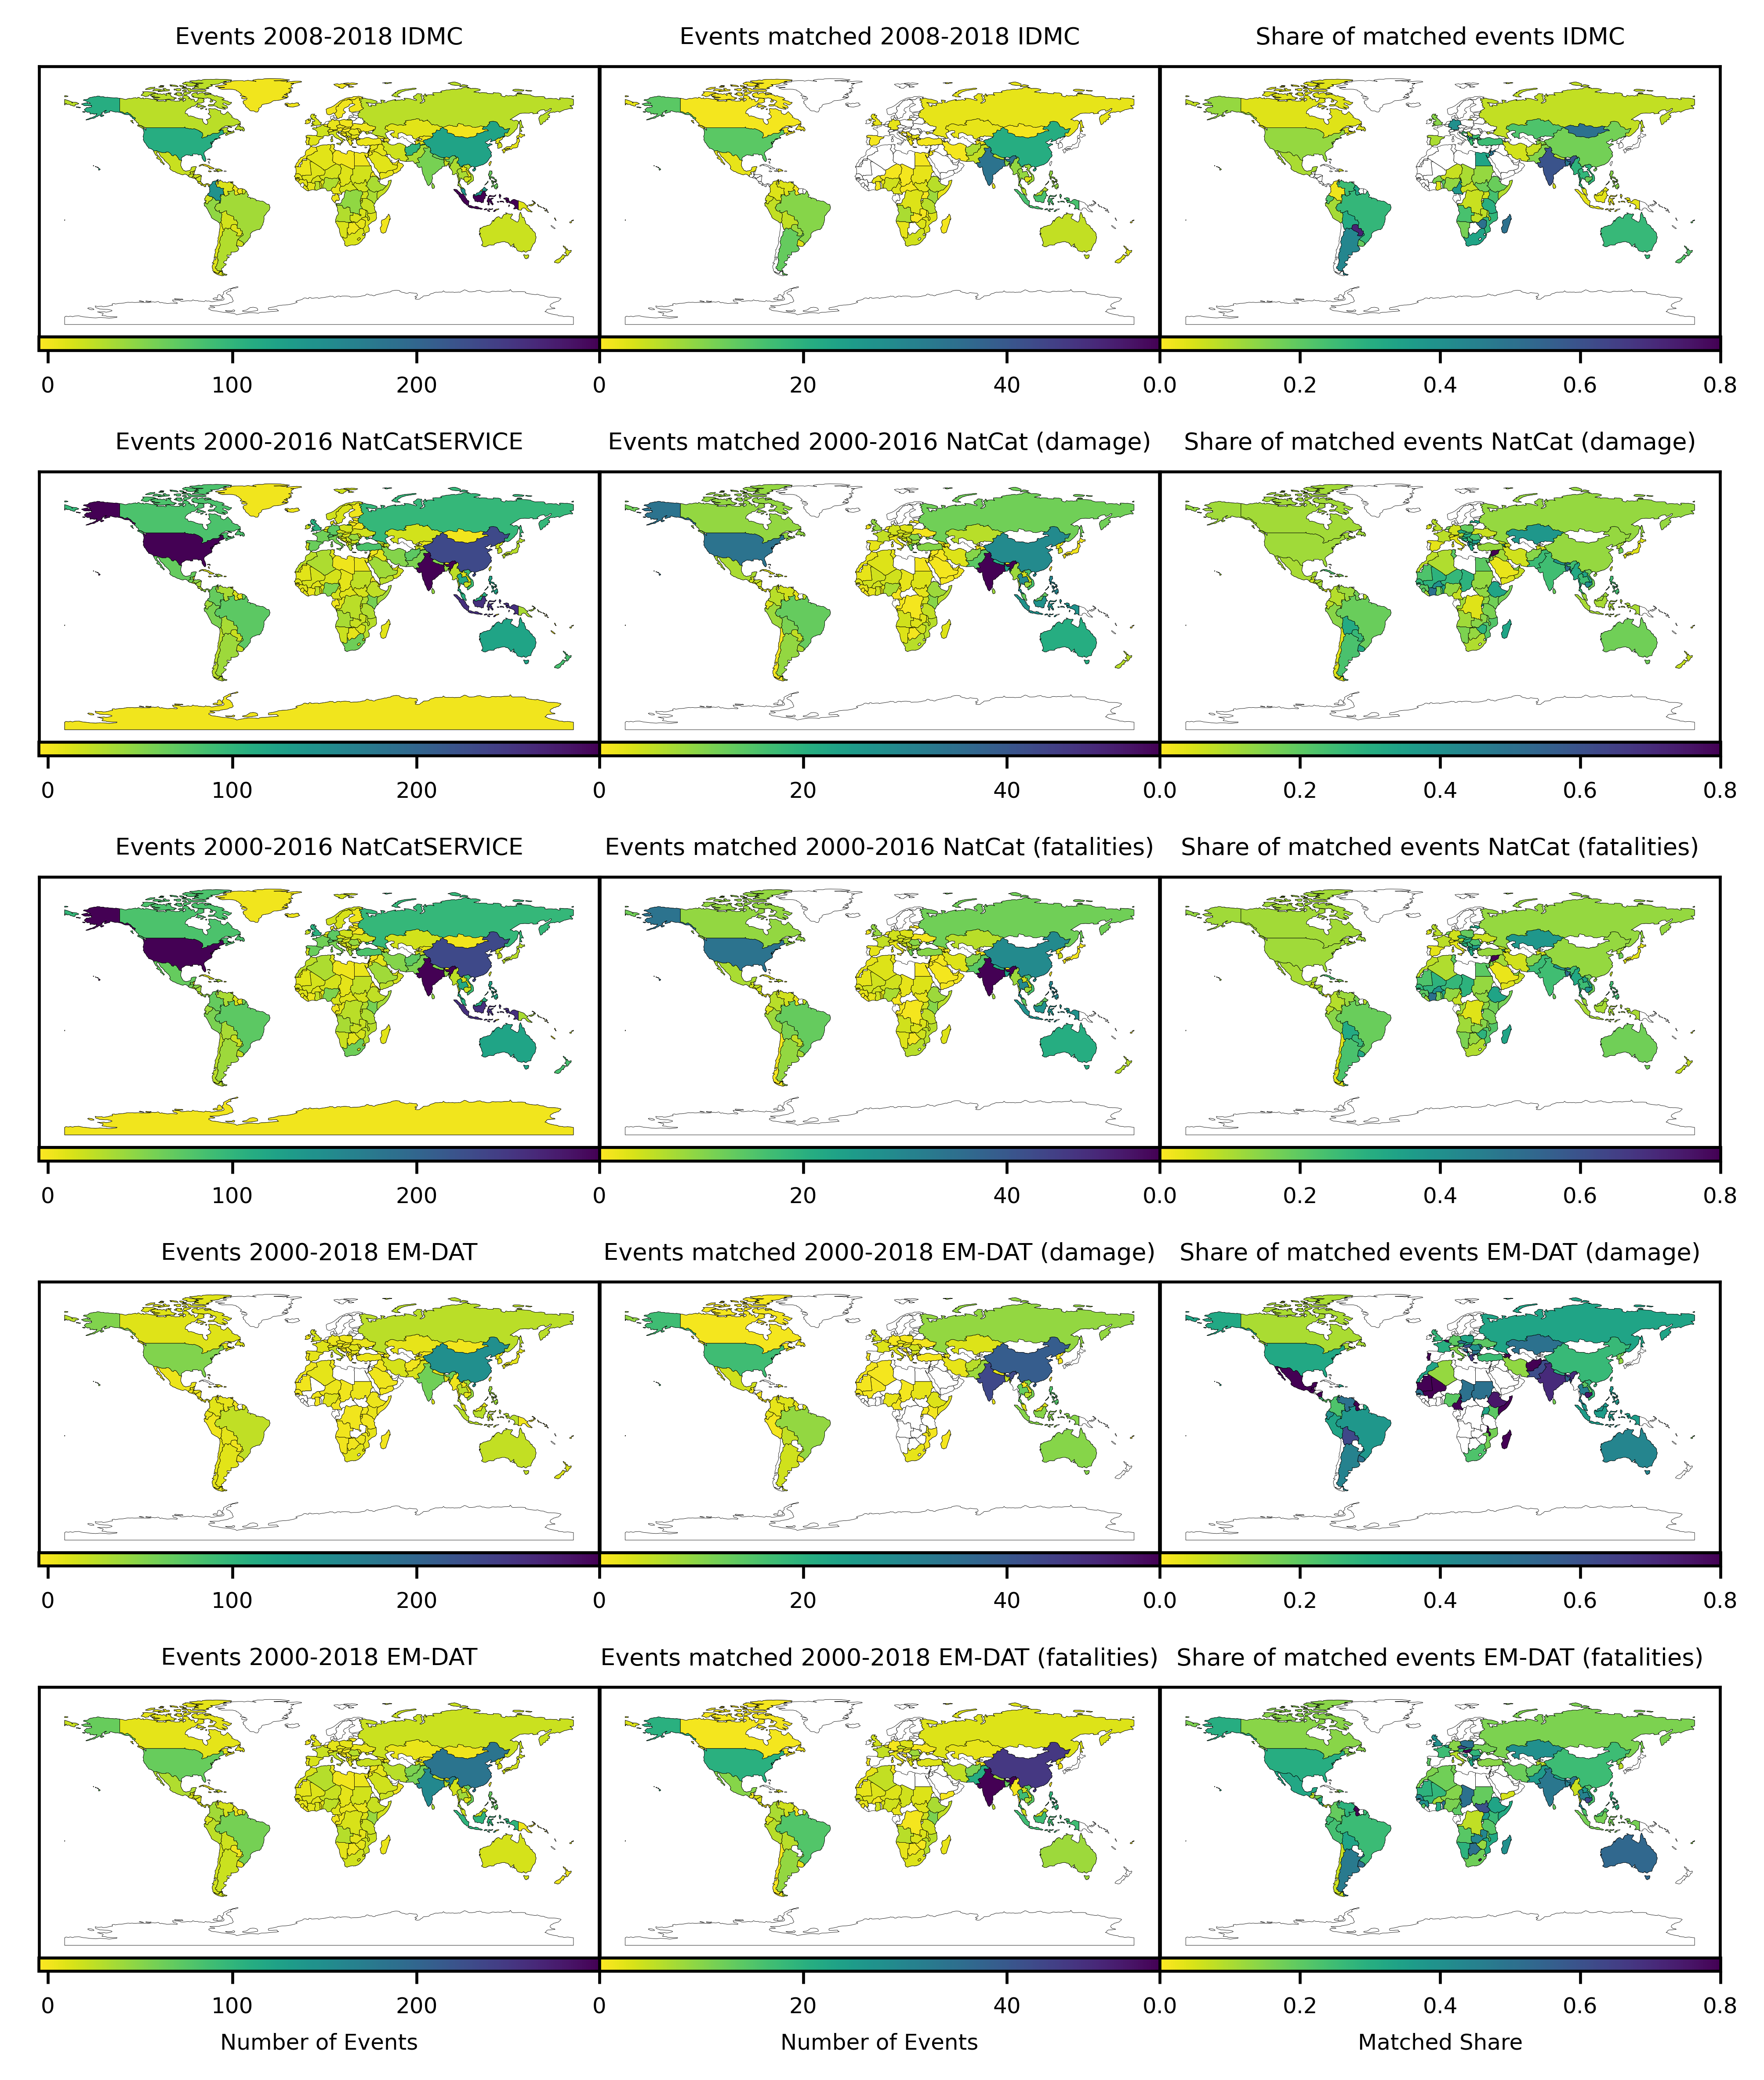

In [122]:
fig1 = plt.figure(figsize=(x_width,y_width), dpi=600)
plt.subplots_adjust(top=0.95, bottom= 0.05, left= 0.05, right=0.95, wspace=0., hspace=0.2)

fig1.patch.set_facecolor('white')
variables=['event_cnt_idmc_2000', 'match_cnt_idmc', 'matches_share_idmc',
           'event_cnt_natcat_2000_asset', 'match_cnt_natcat_asset', 'matches_share_natcat_asset',
           'event_cnt_natcat_2000_fat', 'match_cnt_natcat_fat', 'matches_share_natcat_fat',
           'event_cnt_emdat_2000_asset', 'match_cnt_emdat_asset','matches_share_emdat_asset',
           'event_cnt_emdat_2000_fat', 'match_cnt_emdat_fat', 'matches_share_emdat_fat']

units=['Number of Events', 'Number of Events', 'Matched Share',
       'Number of Events', 'Number of Events', 'Matched Share',
       'Number of Events', 'Number of Events', 'Matched Share',
       'Number of Events', 'Number of Events', 'Matched Share',
       'Number of Events', 'Number of Events', 'Matched Share']
titles=['Events 2008-2018 IDMC', 'Events matched 2008-2018 IDMC', 'Share of matched events IDMC',
        'Events 2000-2016 NatCatSERVICE', 'Events matched 2000-2016 NatCat (damage)', 'Share of matched events NatCat (damage)',
        'Events 2000-2016 NatCatSERVICE', 'Events matched 2000-2016 NatCat (fatalities)', 'Share of matched events NatCat (fatalities)',
        'Events 2000-2018 EM-DAT', 'Events matched 2000-2018 EM-DAT (damage)', 'Share of matched events EM-DAT (damage)',
        'Events 2000-2018 EM-DAT', 'Events matched 2000-2018 EM-DAT (fatalities)', 'Share of matched events EM-DAT (fatalities)']
gs = fig1.add_gridspec(20, 3)

v=0

maxi=[299, 55, 0.8,
      299, 55, 0.8,
      299, 55, 0.8,
      299, 55, 0.8,
      299, 55, 0.8]

mini=[-5,0,0,
      -5,0,0,
      -5,0,0,
      -5,0,0,
      -5,0,0]

for i,row in enumerate([0,4,8,12,16]):
    for col in [0,1,2]:
        
        f3_ax1 = fig1.add_subplot(gs[row: row+3, col:col+1])
        divider = make_axes_locatable(f3_ax1)
        cax = divider.append_axes("bottom", size="5%")
        world.plot(ax=f3_ax1,color="white", edgecolor='k', linewidth=0.1)
        world2.plot(ax=f3_ax1,cax=cax,column=variables[v], vmin=mini[v], vmax=maxi[v],
                   cmap= 'viridis_r',legend=True,
                  edgecolor='black', linewidth=0.1,legend_kwds={'orientation': "horizontal"})#
        f3_ax1.set_yticklabels([])
        f3_ax1.set_xticklabels([])
        f3_ax1.set_title(titles[v],fontsize=6.5)
        f3_ax1.set_yticks([])
        
        ticks=cax.get_xticklabels()
        cax.set_xticklabels(ticks, fontsize=6)
        #cax.tick_params(axis='both', which='major', labelsize=6)
        if i==4:
            cax.set_xlabel(units[v], fontsize=6)
        v+=1
plt.savefig('/home/insauer/projects/flood_vulnerability_sat/Figures/Supplement/SI_summary_statistics.png')

In [123]:
cm = 1/2.54
x_width= 18.0*cm
y_width= 6.0*cm
y_width

2.3622047244094486

/tmp/ipykernel_7883/2360401991.py:44: UserWarning: FixedFormatter should only be used together with FixedLocator
  cax.set_xticklabels(ticks, fontsize=5)
/tmp/ipykernel_7883/2360401991.py:44: UserWarning: FixedFormatter should only be used together with FixedLocator
  cax.set_xticklabels(ticks, fontsize=5)


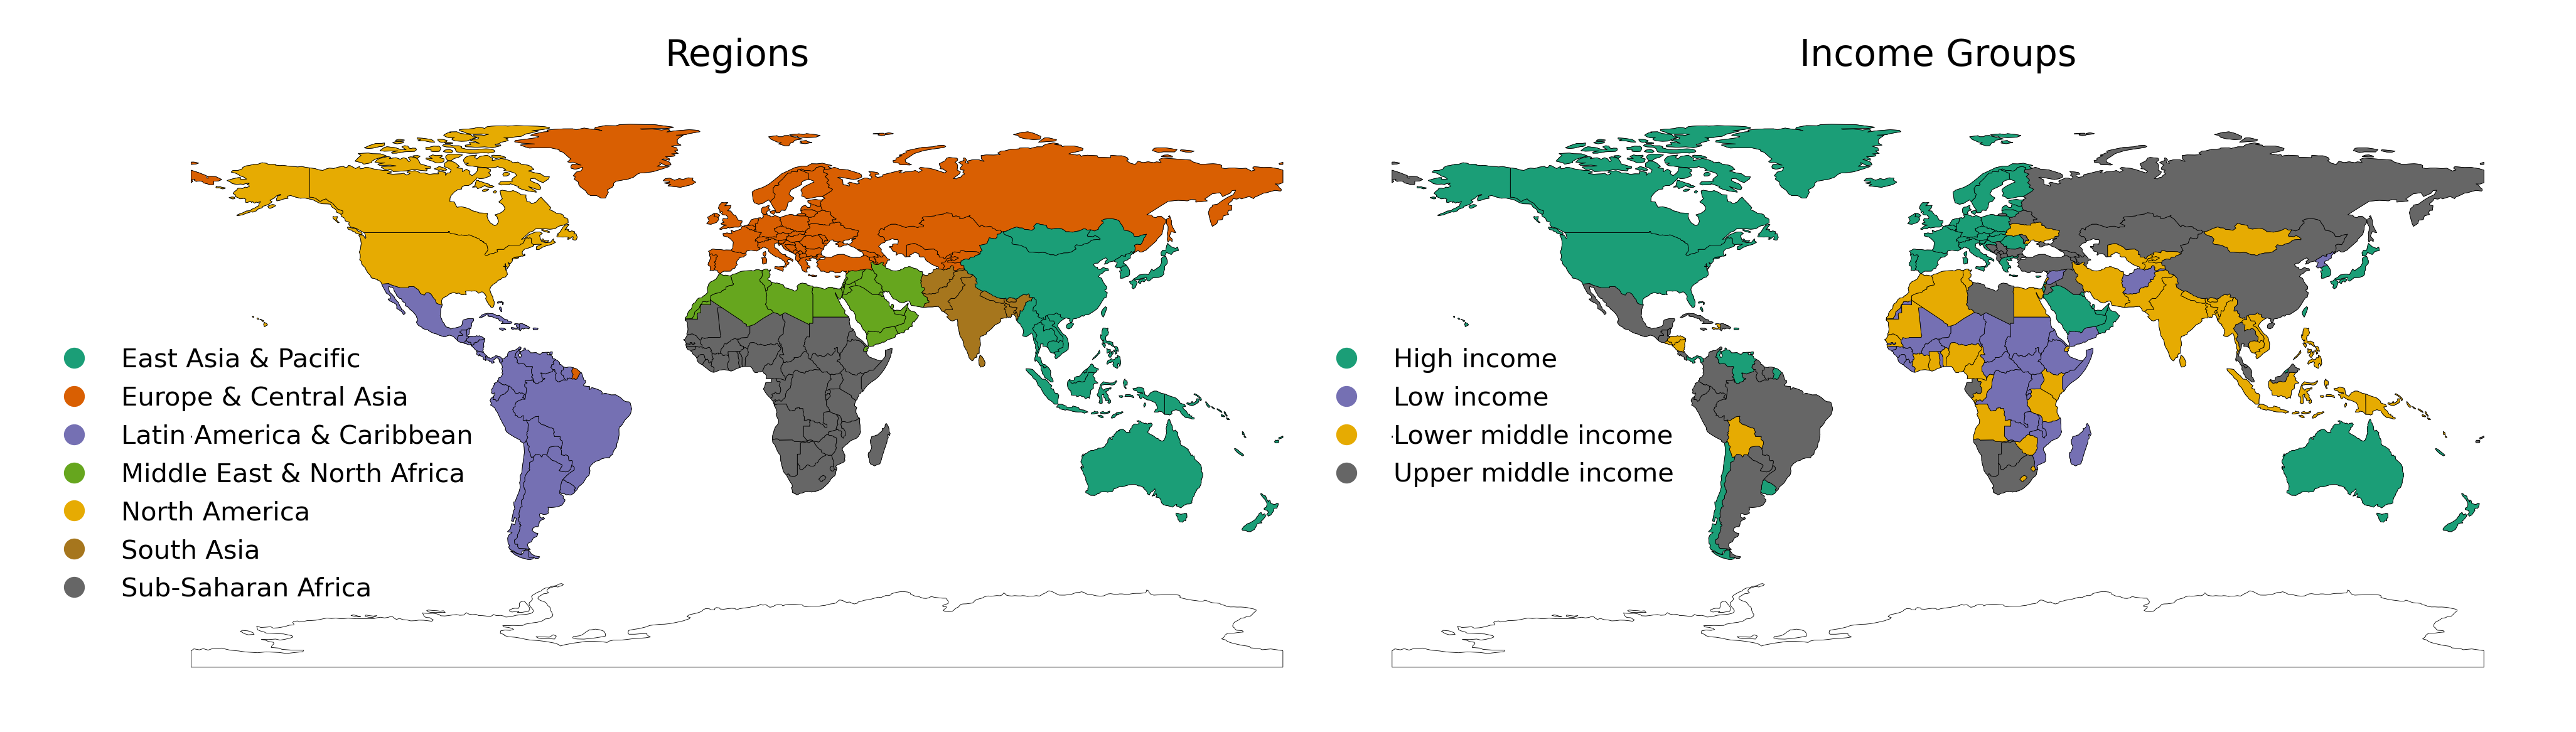

In [124]:
fig1 = plt.figure(figsize=(x_width,y_width), dpi=600)
plt.subplots_adjust(top=0.95, bottom= 0.05, left= 0.05, right=0.95, wspace=0., hspace=0.0)

fig1.patch.set_facecolor('white')
variables=['region', 'income_group']

titles=['Regions', 'Income Groups']
gs = fig1.add_gridspec(1, 2)

v=0

maxi=[300, 55, 0.6,
      300, 55, 0.6,
      300, 55, 0.6,
      300, 55, 0.6,
      300, 55, 0.6]

mini=[0,0,0,
      0,0,0,
      0,0,0,
      0,0,0,
      0,0,0]

for i,row in enumerate([0]):
    for col in [0,1]:
        
        f3_ax1 = fig1.add_subplot(gs[0: 1, col:col+1])
        world.plot(ax=f3_ax1,color="white", edgecolor='k', linewidth=0.1)
        world.dropna(subset=[variables[v]]).plot(ax=f3_ax1,categorical=True,column=variables[v], cmap= 'Dark2',
                                                cax=cax,legend=True, edgecolor='black', linewidth=0.1,
                                                     legend_kwds={'fontsize': 5,
                                                                'markerscale':0.4,
                                                                'frameon':False})#
        leg = f3_ax1.get_legend()
        leg.set_bbox_to_anchor((0.3,0.62))
        #leg.set_
        f3_ax1.set_axis_off()
        f3_ax1.set_yticklabels([])
        f3_ax1.set_xticklabels([])
        f3_ax1.set_title(titles[v],fontsize=7)
        f3_ax1.tick_params(axis='both', which='major', labelsize=2)
        f3_ax1.set_axis_off()
        ticks=cax.get_xticklabels()
        cax.set_xticklabels(ticks, fontsize=5)
        cax.set_xlabel(units[v], fontsize=5)
        v+=1
plt.savefig('/home/insauer/projects/flood_vulnerability_sat/Figures/Supplement/SI_region_ig.png')
plt.savefig('/home/insauer/projects/flood_vulnerability_sat/Figures/Supplement/SI_region_ig.pdf')

## 1.9 Add inequality data

In [2]:
gini=pd.read_csv('/home/insauer/projects/submission_vul_sat/input_data/swiid9_5/swiid9_5_summary.csv')

In [3]:
gini

country  year  gini_disp  gini_disp_se  gini_mkt  gini_mkt_se  \
0     Afghanistan  2007       31.3          2.61      32.9         2.92   
1     Afghanistan  2008       31.4          2.53      32.9         2.87   
2     Afghanistan  2009       31.4          2.57      33.0         2.92   
3     Afghanistan  2010       31.5          2.59      33.1         2.95   
4     Afghanistan  2011       31.6          2.60      33.1         2.97   
...           ...   ...        ...           ...       ...          ...   
6104     Zimbabwe  2015       47.1          3.23      49.5         3.57   
6105     Zimbabwe  2016       47.2          3.26      49.6         3.61   
6106     Zimbabwe  2017       47.2          3.31      49.6         3.64   
6107     Zimbabwe  2018       47.3          3.39      49.7         3.71   
6108     Zimbabwe  2019       47.4          3.45      49.8         3.80   

      abs_red  abs_red_se  rel_red  rel_red_se  
0         NaN         NaN      NaN         NaN  
1         NaN         NaN      NaN         NaN  
2         NaN         NaN      NaN         NaN  
3         NaN         NaN      NaN         NaN  
4         NaN         NaN      NaN         NaN  
...       ...         ...      ...         ...  
6104      NaN         NaN      NaN         NaN  
6105      NaN         NaN      NaN         NaN  
6106      NaN         NaN      NaN         NaN  
6107      NaN         NaN      NaN         NaN  
6108      NaN         NaN      NaN         NaN  

[6109 rows x 10 columns]

In [4]:
iso_id=pd.read_csv('/home/insauer/projects/gdp_population_update/final_mer_conversion/isimip3a_gdp_MER.csv')
iso_id

Unnamed: 0  iso        country          1850          1851          1852  \
0             0  ABW          Aruba  1.140405e+06  1.152891e+06  1.165282e+06   
1             1  AFG    Afghanistan  6.228748e+08  6.252597e+08  6.276325e+08   
2             2  AGO         Angola  5.926841e+08  5.980108e+08  6.033599e+08   
3             3  AIA       Anguilla           NaN           NaN           NaN   
4             4  ALA  Åland Islands           NaN           NaN           NaN   
..          ...  ...            ...           ...           ...           ...   
244         244  WSM          Samoa  4.947148e+06  4.970806e+06  4.994151e+06   
245         245  YEM          Yemen  1.033317e+08  1.039495e+08  1.045690e+08   
246         246  ZAF   South Africa  4.538851e+08  5.496759e+08  5.897867e+08   
247         247  ZMB         Zambia  2.613575e+08  2.640478e+08  2.667522e+08   
248         248  ZWE       Zimbabwe  2.304291e+08  2.328011e+08  2.351853e+08   

             1853          1854          1855          1856  ...  \
0    1.177577e+06  1.189778e+06  1.201884e+06  1.213895e+06  ...   
1    6.299936e+08  6.323428e+08  6.346800e+08  6.370055e+08  ...   
2    6.087314e+08  6.141255e+08  6.195420e+08  6.249806e+08  ...   
3             NaN           NaN           NaN           NaN  ...   
4             NaN           NaN           NaN           NaN  ...   
..            ...           ...           ...           ...  ...   
244  5.017723e+06  5.041253e+06  5.064741e+06  5.088185e+06  ...   
245  1.051901e+08  1.058129e+08  1.064374e+08  1.070634e+08  ...   
246  6.474608e+08  6.433467e+08  7.050910e+08  5.797941e+08  ...   
247  2.694698e+08  2.722011e+08  2.749466e+08  2.777052e+08  ...   
248  2.375815e+08  2.399894e+08  2.424097e+08  2.448421e+08  ...   

             2012          2013          2014          2015          2016  \
0    2.106344e+09  2.194774e+09  2.201358e+09  2.326835e+09  2.375699e+09   
1    1.216467e+10  1.284598e+10  1.319597e+10  1.338749e+10  1.369009e+10   
2    6.181415e+10  6.487676e+10  6.800553e+10  6.864721e+10  6.687608e+10   
3    2.103585e+08  2.431634e+08  2.869847e+08  2.903397e+08  2.935117e+08   
4    1.556010e+09  1.556010e+09  1.556010e+09  1.556010e+09  1.556010e+09   
..            ...           ...           ...           ...           ...   
244  4.870886e+08  4.850485e+08  4.854280e+08  5.061664e+08  5.469339e+08   
245  1.988222e+10  2.084125e+10  2.080193e+10  1.733248e+10  1.497155e+10   
246  3.169937e+11  3.248716e+11  3.308719e+11  3.348217e+11  3.361579e+11   
247  1.436561e+10  1.509211e+10  1.580114e+10  1.626259e+10  1.687677e+10   
248  7.871294e+09  8.027893e+09  8.218710e+09  8.364993e+09  8.428221e+09   

             2017          2018          2019          2020          2021  
0    2.423213e+09  2.423213e+09  2.423213e+09  2.587130e+09  2.733808e+09  
1    1.405247e+10  1.421958e+10  1.477580e+10  1.469648e+10  1.482755e+10  
2    6.677763e+10  6.543965e+10  6.503088e+10  6.375387e+10  6.214373e+10  
3    2.966227e+08  2.996727e+08  3.023973e+08  3.034384e+08  3.075417e+08  
4    1.556010e+09  1.556010e+09  1.556010e+09  1.556010e+09  1.556010e+09  
..            ...           ...           ...           ...           ...  
244  5.526487e+08  5.412460e+08  5.606260e+08  5.338541e+08  5.068850e+08  
245  1.408188e+10  1.370147e+10  1.399259e+10  1.382931e+10  1.367645e+10  
246  3.409129e+11  3.435961e+11  3.441203e+11  3.368848e+11  3.352237e+11  
247  1.746819e+10  1.817293e+10  1.843494e+10  1.814965e+10  1.803743e+10  
248  8.824297e+09  9.132897e+09  8.393132e+09  8.323771e+09  8.082044e+09  

[249 rows x 175 columns]

In [5]:
gini['iso']= np.nan

In [6]:
list(set(gini['country']))

['Azerbaijan',
 'Denmark',
 'United Kingdom',
 'Grenada',
 'Uganda',
 'Hungary',
 'Russia',
 'Niger',
 'Turkmenistan',
 'Zambia',
 'Oman',
 'Israel',
 'Japan',
 'Bolivia',
 'Rwanda',
 'Fiji',
 'Angola',
 'Qatar',
 'South Africa',
 'Italy',
 'Tuvalu',
 'Anguilla',
 'Djibouti',
 'Mauritania',
 'San Marino',
 'Seychelles',
 'Ukraine',
 'Togo',
 'Moldova',
 'Peru',
 'Samoa',
 'Algeria',
 'New Zealand',
 'United States',
 'Uruguay',
 'Brunei',
 'Belize',
 'St. Vincent and Grenadines',
 'Costa Rica',
 'Yugoslavia',
 'Burkina Faso',
 'Germany',
 'Mongolia',
 'Mexico',
 'Papua New Guinea',
 'Tanzania',
 'Tajikistan',
 'Turkey',
 'Ghana',
 'United Arab Emirates',
 'Zimbabwe',
 'Austria',
 'Chile',
 'Spain',
 'Brazil',
 'Kenya',
 'Comoros',
 'Somalia',
 'St. Kitts and Nevis',
 'St. Lucia',
 'Lesotho',
 'Bhutan',
 'Haiti',
 'Colombia',
 'Micronesia',
 'Pakistan',
 'Sweden',
 'Guinea-Bissau',
 'Belgium',
 'Honduras',
 'Nepal',
 'Bangladesh',
 'Czech Republic',
 'Estonia',
 'Hong Kong',
 'Mauritius

In [7]:
economies=list(set(gini['country']))
missing=[]

for eco in economies:
    try:
        iso=iso_id.loc[iso_id['country']==eco,'iso'].values[0]
        gini.loc[gini['country']==eco,'iso']=iso
        
    except IndexError:
        missing.append(eco)
        
        print(eco)    

United Kingdom
Russia
Bolivia
Moldova
United States
Brunei
St. Vincent and Grenadines
Yugoslavia
Tanzania
St. Kitts and Nevis
St. Lucia
Micronesia
Czech Republic
Hong Kong
Syria
Cape Verde
Kosovo
Vietnam
Congo-Kinshasa
Iran
São Tomé and Príncipe
Czechoslovakia
Soviet Union
Venezuela
Côte d'Ivoire
Laos
Congo-Brazzaville
Korea
Palestinian Territories


In [8]:
missing_c= {'Yugoslavia': 'YUG',
'Cape Verde': 'CPV',
'Brunei' : 'BRN',
'United States' : 'USA',
'Bolivia' : 'BOL',
'Kosovo' : 'KSV',
'Russia' : 'RUS',
'Laos' : 'LAO',
'Micronesia':'FSM',
'United Kingdom': 'GBR',
"Côte d'Ivoire" : 'CIV',
'São Tomé and Príncipe' : 'STP',
'Korea' : 'KOR',
'Czechoslovakia' : 'CSK',
'Vietnam' : 'VNM',
'Palestinian Territories' : 'PSE',
'Soviet Union' : 'SUN',
'Hong Kong' : 'HKG',
'Moldova' : 'MDA',
'St. Kitts and Nevis' : 'KNA',
'Congo-Kinshasa' : 'COD',
'Iran' : 'IRN',
'Czech Republic' : 'CZE',
'St. Lucia' : 'LCA',
'Congo-Brazzaville' : 'COG',
'Syria' : 'SYR',
'Venezuela' : 'VEN',
'St. Vincent and Grenadines' : 'VCT',
'Tanzania' : 'TZA'}

In [9]:
missings=[]
for eco in missing:
    try:
        iso=missing_c[eco]
        gini.loc[gini['country']==eco,'iso']=iso
        
    except IndexError:
        missing.append(eco)
        
        print(eco)

In [10]:
gini.head(15)

country  year  gini_disp  gini_disp_se  gini_mkt  gini_mkt_se  \
0   Afghanistan  2007       31.3          2.61      32.9         2.92   
1   Afghanistan  2008       31.4          2.53      32.9         2.87   
2   Afghanistan  2009       31.4          2.57      33.0         2.92   
3   Afghanistan  2010       31.5          2.59      33.1         2.95   
4   Afghanistan  2011       31.6          2.60      33.1         2.97   
5   Afghanistan  2012       31.7          2.60      33.2         2.97   
6   Afghanistan  2013       31.7          2.70      33.2         3.09   
7   Afghanistan  2014       31.7          2.82      33.2         3.19   
8   Afghanistan  2015       31.7          2.92      33.2         3.29   
9   Afghanistan  2016       31.7          2.99      33.2         3.38   
10  Afghanistan  2017       31.7          3.06      33.2         3.45   
11      Albania  1996       36.4          2.41      47.1         4.29   
12      Albania  1997       36.5          2.36      47.3         4.21   
13      Albania  1998       36.6          2.35      47.4         4.16   
14      Albania  1999       36.8          2.29      47.6         4.07   

    abs_red  abs_red_se  rel_red  rel_red_se  iso  
0       NaN         NaN      NaN         NaN  AFG  
1       NaN         NaN      NaN         NaN  AFG  
2       NaN         NaN      NaN         NaN  AFG  
3       NaN         NaN      NaN         NaN  AFG  
4       NaN         NaN      NaN         NaN  AFG  
5       NaN         NaN      NaN         NaN  AFG  
6       NaN         NaN      NaN         NaN  AFG  
7       NaN         NaN      NaN         NaN  AFG  
8       NaN         NaN      NaN         NaN  AFG  
9       NaN         NaN      NaN         NaN  AFG  
10      NaN         NaN      NaN         NaN  AFG  
11      NaN         NaN      NaN         NaN  ALB  
12      NaN         NaN      NaN         NaN  ALB  
13      NaN         NaN      NaN         NaN  ALB  
14      NaN         NaN      NaN         NaN  ALB

In [11]:
gini.to_csv('/home/insauer/projects/submission_vul_sat/input_data/gini.csv')

In [134]:
y=2000
other_years= gini.loc[(gini['iso']=='AFG'),'year'].values
other_years[np.argmin(np.abs(y-other_years))]

2007

In [135]:
natcat_matched['gini']=np.nan
natcat_matched['gini_year']=np.nan
countries= list(set(natcat_matched['ISO']))
missing_gini=[]
for y in np.arange(2000,2019):
    for c in countries:
        print(c)
        try:
            gini_idx= gini.loc[(gini['iso']==c) & (gini['year']==y),'gini_disp'].values[0]
            natcat_matched.loc[(natcat_matched['ISO']==c) & (natcat_matched['year']==y), 'gini']=gini_idx
            natcat_matched.loc[(natcat_matched['ISO']==c) & (natcat_matched['year']==y), 'gini_year']=y
        except IndexError:
            try:
                other_years= gini.loc[(gini['iso']==c),'year'].values
                min_year= other_years[np.argmin(np.abs(y-other_years))]
                gini_idx= gini.loc[(gini['iso']==c) & (gini['year']==min_year),'gini_disp'].values[0]   
                natcat_matched.loc[(natcat_matched['ISO']==c) & (natcat_matched['year']==y), 'gini']=gini_idx
                natcat_matched.loc[(natcat_matched['ISO']==c) & (natcat_matched['year']==y), 'gini_year']=min_year
            except ValueError:
                missing_gini.append(c)
                

/tmp/ipykernel_7883/2317796142.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  natcat_matched['gini']=np.nan
/tmp/ipykernel_7883/2317796142.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  natcat_matched['gini_year']=np.nan
/home/insauer/anaconda3/envs/climada_env/lib/python3.8/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

FJI
KAZ
MOZ
KEN
CMR
SOM
EGY
GTM
TUR
GHA
TJK
COL
SAU
NLD
IRN
CRI
BEN
JAM
BWA
BTN
ARG
SRB
SDN
UGA
ZMB
NIC
SGP
DOM
IDN
JOR
IND
KOR
THA
SLV
CUB
FRA
BIH
SVN
ROU
GRC
MRT
GMB
LVA
ECU
PSE
OMN
ALB
PRY
RWA
PAN
KSV
ETH
TGO
TZA
GIN
ITA
NGA
USA
IRL
LBR
CHN
RUS
ESP
BFA
PAK
HUN
MKD
DEU
PRI
COG
BGD
IRQ
CHE
GBR
AFG
LBN
SSD
MLI
PRK
SEN
DZA
TCD
VEN
AGO
BGR
ZWE
ISR
LKA
UKR
COD
MWI
GUY
CAN
BRA
VNM
YEM
NPL
CHL
AUS
ARM
HRV
BOL
MEX
GEO
TUN
PER
NZL
MAR
NAM
MYS
NER
KHM
ARE
CZE
SYR
ZAF
CIV
SVK
TWN
MMR
POL
AZE
MDG
SLE
PHL
AUT
URY
HTI
HND
LAO
JPN
FJI
KAZ
MOZ
KEN
CMR
SOM
EGY
GTM
TUR
GHA
TJK
COL
SAU
NLD
IRN
CRI
BEN
JAM
BWA
BTN
ARG
SRB
SDN
UGA
ZMB
NIC
SGP
DOM
IDN
JOR
IND
KOR
THA
SLV
CUB
FRA
BIH
SVN
ROU
GRC
MRT
GMB
LVA
ECU
PSE
OMN
ALB
PRY
RWA
PAN
KSV
ETH
TGO
TZA
GIN
ITA
NGA
USA
IRL
LBR
CHN
RUS
ESP
BFA
PAK
HUN
MKD
DEU
PRI
COG
BGD
IRQ
CHE
GBR
AFG
LBN
SSD
MLI
PRK
SEN
DZA
TCD
VEN
AGO
BGR
ZWE
ISR
LKA
UKR
COD
MWI
GUY
CAN
BRA
VNM
YEM
NPL
CHL
AUS
ARM
HRV
BOL
MEX
GEO
TUN
PER
NZL
MAR
NAM
MYS
NER
KHM
ARE
CZE
SYR
ZAF
CIV
SVK
TWN


MMR
POL
AZE
MDG
SLE
PHL
AUT
URY
HTI
HND
LAO
JPN
FJI
KAZ
MOZ
KEN
CMR
SOM
EGY
GTM
TUR
GHA
TJK
COL
SAU
NLD
IRN
CRI
BEN
JAM
BWA
BTN
ARG
SRB
SDN
UGA
ZMB
NIC
SGP
DOM
IDN
JOR
IND
KOR
THA
SLV
CUB
FRA
BIH
SVN
ROU
GRC
MRT
GMB
LVA
ECU
PSE
OMN
ALB
PRY
RWA
PAN
KSV
ETH
TGO
TZA
GIN
ITA
NGA
USA
IRL
LBR
CHN
RUS
ESP
BFA
PAK
HUN
MKD
DEU
PRI
COG
BGD
IRQ
CHE
GBR
AFG
LBN
SSD
MLI
PRK
SEN
DZA
TCD
VEN
AGO
BGR
ZWE
ISR
LKA
UKR
COD
MWI
GUY
CAN
BRA
VNM
YEM
NPL
CHL
AUS
ARM
HRV
BOL
MEX
GEO
TUN
PER
NZL
MAR
NAM
MYS
NER
KHM
ARE
CZE
SYR
ZAF
CIV
SVK
TWN
MMR
POL
AZE
MDG
SLE
PHL
AUT
URY
HTI
HND
LAO
JPN
FJI
KAZ
MOZ
KEN
CMR
SOM
EGY
GTM
TUR
GHA
TJK
COL
SAU
NLD
IRN
CRI
BEN
JAM
BWA
BTN
ARG
SRB
SDN
UGA
ZMB
NIC
SGP
DOM
IDN
JOR
IND
KOR
THA
SLV
CUB
FRA
BIH
SVN
ROU
GRC
MRT
GMB
LVA
ECU
PSE
OMN
ALB
PRY
RWA
PAN
KSV
ETH
TGO
TZA
GIN
ITA
NGA
USA
IRL
LBR
CHN
RUS
ESP
BFA
PAK
HUN
MKD
DEU
PRI
COG
BGD
IRQ
CHE
GBR
AFG
LBN
SSD
MLI
PRK
SEN
DZA
TCD
VEN
AGO
BGR
ZWE
ISR
LKA
UKR
COD
MWI
GUY
CAN
BRA
VNM
YEM
NPL
CHL
AUS
ARM
HRV
BOL
MEX
GEO
TUN
PER
NZL


In [136]:
list(set(missing_gini))

['PRK', 'CUB']

In [137]:
natcat_matched

year  ISO  tot_loss  ins_loss  tot_loss_GDP  tot_loss_GCP  \
0    2000.0  HUN     55.00       0.0    147.151583    122.454554   
2    2000.0  KHM      6.00       0.0     31.808774     29.077715   
3    2000.0  THA      0.05       0.0      0.156322      0.201686   
4    2000.0  VNM     17.00       0.0    102.196978    119.841722   
5    2000.0  PRK      0.10       0.0      0.178929      0.179058   
..      ...  ...       ...       ...           ...           ...   
863  2016.0  IND    215.67       0.0    215.670000    215.670000   
864  2016.0  IND     41.80       0.0     41.800000     41.800000   
865  2016.0  MMR      5.00       0.0      5.000000      5.000000   
866  2016.0  IND    580.12       0.0    580.120000    580.120000   
867  2016.0  MYS      2.11       0.0      2.110000      2.110000   

     tot_loss_CPI  Fatalities    CPI_conv    GDP_conv  ...  \
0      106.467830         1.0  138.597299  163.228841  ...   
2       11.423164        13.0   10.135017   20.964500  ...   
3        0.081702         7.0    0.088051    0.146557  ...   
4       33.634141         3.0   28.481859   67.330587  ...   
5        0.139377         5.0    0.130627    0.147901  ...   
..            ...         ...         ...         ...  ...   
863    215.670000       473.0         NaN         NaN  ...   
864     41.800000        91.0         NaN         NaN  ...   
865      5.000000         8.0         NaN         NaN  ...   
866    580.120000       376.0         NaN         NaN  ...   
867      2.110000         2.0         NaN         NaN  ...   

                begin_dt  asset_conv  exposed_asset  days  \
0    2000-04-06 00:00:00    3.151527   5.266309e+09    96   
2    2000-07-10 00:00:00    1.701588   1.964313e+10   191   
3    2000-07-11 00:00:00    4.144440   2.367736e+11   192   
4    2000-08-01 00:00:00    1.071593   5.732649e+10   213   
5    2000-08-27 00:00:00    2.594265   2.598980e+10   239   
..                   ...         ...            ...   ...   
863  2016-06-26 18:40:00    3.566429   1.427981e+12  6021   
864  2016-08-02 12:00:00    3.566429   2.680698e+12  6058   
865  2016-07-15 00:00:00    1.355821   1.606119e+10  6040   
866  2016-07-14 14:24:00    3.566429   2.680698e+12  6039   
867  2016-11-10 18:00:00    3.376558   7.166737e+11  6158   

            income_group  regions                 region  development  gini  \
0            High income      NaN  Europe & Central Asia         high  27.1   
2    Lower middle income      NaN    East Asia & Pacific          low  36.9   
3    Upper middle income      NaN    East Asia & Pacific       medium  43.7   
4    Lower middle income      NaN    East Asia & Pacific       medium  36.5   
5             Low income      NaN    East Asia & Pacific       medium   NaN   
..                   ...      ...                    ...          ...   ...   
863  Lower middle income      NaN             South Asia       medium  42.0   
864  Lower middle income      NaN             South Asia       medium  42.0   
865  Lower middle income      NaN    East Asia & Pacific       medium  33.7   
866  Lower middle income      NaN             South Asia       medium  42.0   
867  Upper middle income      NaN    East Asia & Pacific         high  39.5   

     gini_year  
0       2000.0  
2       2000.0  
3       2000.0  
4       2000.0  
5          NaN  
..         ...  
863     2016.0  
864     2016.0  
865     2016.0  
866     2016.0  
867     2016.0  

[800 rows x 89 columns]

In [138]:
emdat_matched['gini']=np.nan
emdat_matched['gini_year']=np.nan
countries= list(set(emdat_matched['ISO3']))
missing_gini=[]
for y in np.arange(2000,2019):
    for c in countries:
        print(c)
        try:
            gini_idx= gini.loc[(gini['iso']==c) & (gini['year']==y),'gini_disp'].values[0]
            emdat_matched.loc[(emdat_matched['ISO3']==c) & (emdat_matched['year']==y), 'gini']=gini_idx
            emdat_matched.loc[(emdat_matched['ISO3']==c) & (emdat_matched['year']==y), 'gini_year']=y
        except IndexError:
            try:
                other_years= gini.loc[(gini['iso']==c),'year'].values
                min_year= other_years[np.argmin(np.abs(y-other_years))]
                gini_idx= gini.loc[(gini['iso']==c) & (gini['year']==min_year),'gini_disp'].values[0]   
                emdat_matched.loc[(emdat_matched['ISO3']==c) & (emdat_matched['year']==y), 'gini']=gini_idx
                emdat_matched.loc[(emdat_matched['ISO3']==c) & (emdat_matched['year']==y), 'gini_year']=min_year
            except ValueError:
                missing_gini.append(c)

FJI
KAZ
MOZ
BEL
KEN
CMR
SOM
GTM
TUR
GHA
TJK
COL
IRN
CRI
BEN
BWA
ARG
SDN
UGA
ZMB
NIC
DOM
IDN
IND
KOR
THA
CUB
FRA
BIH
ROU
GRC
MRT
ECU
ALB
PRY
RWA
PAN
ETH
TZA
GIN
ITA
NGA
USA
CHN
BDI
RUS
BFA
PAK
HUN
DEU
MKD
COG
BGD
IRQ
GBR
AFG
MNE
SSD
MLI
PRK
SEN
DZA
TCD
VEN
AGO
BGR
ZWE
LKA
UKR
COD
MWI
GUY
CAN
PRT
BRA
VNM
YEM
NPL
AUS
CHL
MDA
HRV
BOL
MEX
GEO
TUN
PER
MAR
NAM
NER
MYS
UZB
KHM
CZE
ZAF
LSO
SVK
TWN
MMR
POL
AZE
SLE
MDG
PHL
AUT
HTI
URY
HND
LAO
FJI
KAZ
MOZ
BEL
KEN
CMR
SOM
GTM
TUR
GHA
TJK
COL
IRN
CRI
BEN
BWA
ARG
SDN
UGA
ZMB
NIC
DOM
IDN
IND
KOR
THA
CUB
FRA
BIH
ROU
GRC
MRT
ECU
ALB
PRY
RWA
PAN
ETH
TZA
GIN
ITA
NGA
USA
CHN
BDI
RUS
BFA
PAK
HUN
DEU
MKD
COG
BGD
IRQ
GBR
AFG
MNE
SSD
MLI
PRK
SEN
DZA
TCD
VEN
AGO
BGR
ZWE
LKA
UKR
COD
MWI
GUY
CAN
PRT
BRA
VNM
YEM
NPL
AUS
CHL
MDA
HRV
BOL
MEX
GEO
TUN
PER
MAR
NAM
NER
MYS
UZB
KHM
CZE
ZAF
LSO
SVK
TWN
MMR
POL
AZE
SLE
MDG
PHL
AUT
HTI
URY
HND
LAO
FJI
KAZ
MOZ
BEL
KEN
CMR
SOM
GTM
TUR
GHA
TJK
COL
IRN
CRI
BEN
BWA
ARG
SDN
UGA
ZMB
NIC
DOM
IDN
IND
KOR
THA
CUB
FRA
BIH
ROU
GRC
MRT


KHM
CZE
ZAF
LSO
SVK
TWN
MMR
POL
AZE
SLE
MDG
PHL
AUT
HTI
URY
HND
LAO


In [139]:
list(set(missing_gini))

['PRK', 'CUB']

In [140]:
emdat_matched

ISO3    year           disasterno  total_deaths  no_injured  \
0    NPL  2005.0            2005-0556          51.0         NaN   
1    BGR  2002.0            2002-0552           1.0         NaN   
2    LAO  2002.0            2002-0614           2.0         NaN   
3    ECU  2013.0            2013-0372           NaN         NaN   
4    MEX  2007.0            2007-0435           NaN         NaN   
..   ...     ...                  ...           ...         ...   
692  IDN  2006.0  2006-0074,2005-0718          98.0        30.0   
693  GBR  2007.0  2007-0247,2007-0201           7.0         0.0   
694  BRA  2008.0  2008-0016,2008-0041          13.0        12.0   
695  AUS  2010.0  2010-0103,2010-0066           NaN         0.0   
696  AUS  2012.0  2012-0037,2012-0029           4.0         0.0   

     no_affected_EMDAT  no_homeles  total_affected_EMDAT  \
0               1600.0         NaN                1600.0   
1                  NaN         NaN                   NaN   
2             150000.0         NaN              150000.0   
3              25567.0         NaN               25567.0   
4              55000.0         NaN               55000.0   
..                 ...         ...                   ...   
692            17781.0         0.0               17811.0   
693              200.0     30000.0               30200.0   
694            60929.0      1435.0               62376.0   
695                0.0         0.0                   0.0   
696            16000.0         0.0               16000.0   

     total_damages_(000_USD)  idx  ...  CPI_conv_ppp  \
0                        NaN  0.0  ...           0.0   
1                     1000.0  0.0  ...           0.0   
2                        NaN  0.0  ...           0.0   
3                        NaN  0.0  ...           0.0   
4                        NaN  0.0  ...           0.0   
..                       ...  ...  ...           ...   
692                  27100.0  NaN  ...           0.0   
693                4448000.0  NaN  ...           0.0   
694                      0.0  NaN  ...           0.0   
695                 109000.0  NaN  ...           0.0   
696                 588000.0  NaN  ...           0.0   

    total_damages_(000_USD)_conv_ppp  asset_conv  exposed_asset  \
0                                NaN    2.738428   6.458519e+08   
1                       1.182709e+03    1.031004   1.140910e+09   
2                                NaN    1.947378   5.920839e+09   
3                                NaN    4.797220   1.243118e+07   
4                                NaN    2.602279   6.612194e+10   
..                               ...         ...            ...   
692                     1.927145e+04    2.342608   3.252702e+11   
693                     4.646157e+06    2.920071   2.114308e+10   
694                     0.000000e+00    3.259527   6.727088e+09   
695                     1.108982e+05    3.336756   4.894458e+09   
696                     5.618568e+05    3.400493   8.473875e+09   

            income_group  regions                     region  development  \
0    Lower middle income      NaN                 South Asia          low   
1    Upper middle income      NaN      Europe & Central Asia         high   
2    Lower middle income      NaN        East Asia & Pacific          low   
3    Upper middle income      NaN  Latin America & Caribbean         high   
4    Upper middle income      NaN  Latin America & Caribbean         high   
..                   ...      ...                        ...          ...   
692  Lower middle income      NaN        East Asia & Pacific       medium   
693          High income      NaN      Europe & Central Asia    very high   
694  Upper middle income      NaN  Latin America & Caribbean         high   
695          High income      NaN        East Asia & Pacific    very high   
696          High income      NaN        East Asia & Pacific    very high   

     gini  gini_year  
0    38.4     2005.0  
1    32.2     2002.0  
2    3

In [141]:
idmc_matched['gini']=np.nan
idmc_matched['gini_year']=np.nan
countries= list(set(idmc_matched['ISO3']))
missing_gini=[]
for y in np.arange(2000,2019):
    for c in countries:
        print(c)
        try:
            gini_idx= gini.loc[(gini['iso']==c) & (gini['year']==y),'gini_disp'].values[0]
            idmc_matched.loc[(idmc_matched['ISO3']==c) & (idmc_matched['year']==y), 'gini']=gini_idx
            idmc_matched.loc[(idmc_matched['ISO3']==c) & (idmc_matched['year']==y), 'gini_year']=y
        except IndexError:
            try:
                other_years= gini.loc[(gini['iso']==c),'year'].values
                min_year= other_years[np.argmin(np.abs(y-other_years))]
                gini_idx= gini.loc[(gini['iso']==c) & (gini['year']==min_year),'gini_disp'].values[0]   
                idmc_matched.loc[(idmc_matched['ISO3']==c) & (idmc_matched['year']==y), 'gini']=gini_idx
                idmc_matched.loc[(idmc_matched['ISO3']==c) & (idmc_matched['year']==y), 'gini_year']=min_year
            except ValueError:
                missing_gini.append(c)

BDI
ESP
JOR
IND
RUS
KAZ
MOZ
VNM
FJI
AUS
BFA
NPL
KEN
PAK
HRV
BOL
THA
CMR
MEX
SOM
EGY
DEU
MKD
PER
BGD
TUR
PSE
GRC
GHA
ECU
COL
AFG
GBR
NZL
TJK
NAM
MYS
NER
ALB
PRY
MNE
SSD
KHM
ETH
IRN
TCD
VEN
TZA
ZAF
BEN
AGO
MNG
CAF
BGR
MMR
NGA
ARG
USA
ZWE
MDG
SRB
PHL
SDN
URY
UGA
ZMB
LKA
COD
GUY
MWI
DOM
CAN
IDN
CHN
BRA
BDI
ESP
JOR
IND
RUS
KAZ
MOZ
VNM
FJI
AUS
BFA
NPL
KEN
PAK
HRV
BOL
THA
CMR
MEX
SOM
EGY
DEU
MKD
PER
BGD
TUR
PSE
GRC
GHA
ECU
COL
AFG
GBR
NZL
TJK
NAM
MYS
NER
ALB
PRY
MNE
SSD
KHM
ETH
IRN
TCD
VEN
TZA
ZAF
BEN
AGO
MNG
CAF
BGR
MMR
NGA
ARG
USA
ZWE
MDG
SRB
PHL
SDN
URY
UGA
ZMB
LKA
COD
GUY
MWI
DOM
CAN
IDN
CHN
BRA
BDI
ESP
JOR
IND
RUS
KAZ
MOZ
VNM
FJI
AUS
BFA
NPL
KEN
PAK
HRV
BOL
THA
CMR
MEX
SOM
EGY
DEU
MKD
PER
BGD
TUR
PSE
GRC
GHA
ECU
COL
AFG
GBR
NZL
TJK
NAM
MYS
NER
ALB
PRY
MNE
SSD
KHM
ETH
IRN
TCD
VEN
TZA
ZAF
BEN
AGO
MNG
CAF
BGR
MMR
NGA
ARG
USA
ZWE
MDG
SRB
PHL
SDN
URY
UGA
ZMB
LKA
COD
GUY
MWI
DOM
CAN
IDN
CHN
BRA
BDI
ESP
JOR
IND
RUS
KAZ
MOZ
VNM
FJI
AUS
BFA
NPL
KEN
PAK
HRV
BOL
THA
CMR
MEX
SOM
EGY
DEU
MKD
PER
BGD


In [142]:
list(set(missing_gini))

[]

In [143]:
idmc_matched

ISO3    year  displacements                                       GID_1  \
0    AFG  2008.0          180.0                                         NaN   
1    AFG  2013.0         4880.0                                         NaN   
2    AFG  2015.0         1210.0                                         NaN   
3    AFG  2015.0          581.0                                         NaN   
4    AFG  2018.0           22.0                                    AFG.17_1   
..   ...     ...            ...                                         ...   
330  USA  2017.0       219565.0                                     USA.5_1   
331  USA  2017.0        25973.0                                     USA.5_1   
332  USA  2018.0          609.0                                     USA.5_1   
333  PRY  2018.0          950.0  PRY.5_1,PRY.16_1,PRY.17_1,PRY.3_1,PRY.16_1   
334  USA  2017.0        34617.0           USA.5_1,USA.29_1,USA.5_1,USA.29_1   

                                 GID_2  num_provinces  num_districts  \
0                                  NaN            NaN            NaN   
1                                  NaN            NaN            NaN   
2                           AFG.1.11_1            NaN            1.0   
3                            AFG.1.2_1            NaN            1.0   
4                                  NaN            1.0            NaN   
..                                 ...            ...            ...   
330                        USA.37.19_1            1.0            1.0   
331                                NaN            1.0            NaN   
332                         USA.5.37_1            1.0            1.0   
333                         PRY.16.8_1            5.0            1.0   
334  USA.4.50_1,USA.5.29_1,USA.42.29_1            4.0            3.0   

     DFO_matches DFO_matches_nr  matching_type  ...  FLOPROS_modeled_mean  \
0              1           3359              1  ...              2.000000   
1              2   [4078, 4082]              2  ...              2.906020   
2              1           4272              1  ...              2.000000   
3              1           4272              1  ...              2.000000   
4              1           4645              1  ...              2.000000   
..           ...            ...            ...  ...                   ...   
330            1           4444              4  ...            112.180150   
331            1           4434              4  ...            112.391130   
332            1           4711              4  ...             93.328787   
333            1           4569              5  ...              6.098685   
334            1           4434              5  ...            112.391130   

     forest_cover_mean  start_date  days         income_group  regions  \
0             0.000000  2008-08-01  3135           Low income      NaN   
1             0.000000  2013-08-03  4963           Low income      NaN   
2             0.000000  2015-07-13  5672           Low income      NaN   
3             0.000000  2015-07-20  5679           Low income      NaN   
4             0.000000  2018-07-05  6760           Low income      NaN   
..                 ...         ...   ...                  ...      ...   
330           0.000280  2017-02-19  6259          High income      NaN   
331           0.000480  2017-01-23  6232          High income      NaN   
332           0.000307  2018-06-16  6741          High income      NaN   
333           0.000635  2018-02-01  6606  Upper middle income      NaN   
334           0.000480  2017-02-19  6259          High income      NaN   

                        region  development  gini  gini_year  
0                   South Asia          low  31.4     2008.0  
1                   South Asia          low  31.7     2013.0  
2                   South Asia          low  31.7     2015.0  
3                   South Asia          low  31.7     2015.0  
4                   South Asia          low  31.7     2017.0 

In [147]:
natcat_all['gini']=np.nan
natcat_all['gini_year']=np.nan
countries= list(set(natcat_matched['ISO']))
missing_gini=[]
for y in np.arange(1980,2019):
    for c in countries:
        print(c)
        try:
            gini_idx= gini.loc[(gini['iso']==c) & (gini['year']==y),'gini_disp'].values[0]
            natcat_all.loc[(natcat_all['ISO']==c) & (natcat_all['year']==y), 'gini']=gini_idx
            natcat_all.loc[(natcat_all['ISO']==c) & (natcat_all['year']==y), 'gini_year']=y
        except IndexError:
            try:
                other_years= gini.loc[(gini['iso']==c),'year'].values
                min_year= other_years[np.argmin(np.abs(y-other_years))]
                gini_idx= gini.loc[(gini['iso']==c) & (gini['year']==min_year),'gini_disp'].values[0]   
                natcat_all.loc[(natcat_all['ISO']==c) & (natcat_all['year']==y), 'gini']=gini_idx
                natcat_all.loc[(natcat_all['ISO']==c) & (natcat_all['year']==y), 'gini_year']=min_year
            except ValueError:
                missing_gini.append(c)

FJI
KAZ
MOZ
KEN
CMR
SOM
EGY
GTM
TUR
GHA
TJK
COL
SAU
NLD
IRN
CRI
BEN
JAM
BWA
BTN
ARG
SRB
SDN
UGA
ZMB
NIC
SGP
DOM
IDN
JOR
IND
KOR
THA
SLV
CUB
FRA
BIH
SVN
ROU
GRC
MRT
GMB
LVA
ECU
PSE
OMN
ALB
PRY
RWA
PAN
KSV
ETH
TGO
TZA
GIN
ITA
NGA
USA
IRL
LBR
CHN
RUS
ESP
BFA
PAK
HUN
MKD
DEU
PRI
COG
BGD
IRQ
CHE
GBR
AFG
LBN
SSD
MLI
PRK
SEN
DZA
TCD
VEN
AGO
BGR
ZWE
ISR
LKA
UKR
COD
MWI
GUY
CAN
BRA
VNM
YEM
NPL
CHL
AUS
ARM
HRV
BOL
MEX
GEO
TUN
PER
NZL
MAR
NAM
MYS
NER
KHM
ARE
CZE
SYR
ZAF
CIV
SVK
TWN
MMR
POL
AZE
MDG
SLE
PHL
AUT
URY
HTI
HND
LAO
JPN
FJI
KAZ
MOZ
KEN
CMR
SOM
EGY
GTM
TUR
GHA
TJK
COL
SAU
NLD
IRN
CRI
BEN
JAM
BWA
BTN
ARG
SRB
SDN
UGA
ZMB
NIC
SGP
DOM
IDN
JOR
IND
KOR
THA
SLV
CUB
FRA
BIH
SVN
ROU
GRC
MRT
GMB
LVA
ECU
PSE
OMN
ALB
PRY
RWA
PAN
KSV
ETH
TGO
TZA
GIN
ITA
NGA
USA
IRL
LBR
CHN
RUS
ESP
BFA
PAK
HUN
MKD
DEU
PRI
COG
BGD
IRQ
CHE
GBR
AFG
LBN
SSD
MLI
PRK
SEN
DZA
TCD
VEN
AGO
BGR
ZWE
ISR
LKA
UKR
COD
MWI
GUY
CAN
BRA
VNM
YEM
NPL
CHL
AUS
ARM
HRV
BOL
MEX
GEO
TUN
PER
NZL
MAR
NAM
MYS
NER
KHM
ARE
CZE
SYR
ZAF
CIV
SVK
TWN


VNM
YEM
NPL
CHL
AUS
ARM
HRV
BOL
MEX
GEO
TUN
PER
NZL
MAR
NAM
MYS
NER
KHM
ARE
CZE
SYR
ZAF
CIV
SVK
TWN
MMR
POL
AZE
MDG
SLE
PHL
AUT
URY
HTI
HND
LAO
JPN
FJI
KAZ
MOZ
KEN
CMR
SOM
EGY
GTM
TUR
GHA
TJK
COL
SAU
NLD
IRN
CRI
BEN
JAM
BWA
BTN
ARG
SRB
SDN
UGA
ZMB
NIC
SGP
DOM
IDN
JOR
IND
KOR
THA
SLV
CUB
FRA
BIH
SVN
ROU
GRC
MRT
GMB
LVA
ECU
PSE
OMN
ALB
PRY
RWA
PAN
KSV
ETH
TGO
TZA
GIN
ITA
NGA
USA
IRL
LBR
CHN
RUS
ESP
BFA
PAK
HUN
MKD
DEU
PRI
COG
BGD
IRQ
CHE
GBR
AFG
LBN
SSD
MLI
PRK
SEN
DZA
TCD
VEN
AGO
BGR
ZWE
ISR
LKA
UKR
COD
MWI
GUY
CAN
BRA
VNM
YEM
NPL
CHL
AUS
ARM
HRV
BOL
MEX
GEO
TUN
PER
NZL
MAR
NAM
MYS
NER
KHM
ARE
CZE
SYR
ZAF
CIV
SVK
TWN
MMR
POL
AZE
MDG
SLE
PHL
AUT
URY
HTI
HND
LAO
JPN
FJI
KAZ
MOZ
KEN
CMR
SOM
EGY
GTM
TUR
GHA
TJK
COL
SAU
NLD
IRN
CRI
BEN
JAM
BWA
BTN
ARG
SRB
SDN
UGA
ZMB
NIC
SGP
DOM
IDN
JOR
IND
KOR
THA
SLV
CUB
FRA
BIH
SVN
ROU
GRC
MRT
GMB
LVA
ECU
PSE
OMN
ALB
PRY
RWA
PAN
KSV
ETH
TGO
TZA
GIN
ITA
NGA
USA
IRL
LBR
CHN
RUS
ESP
BFA
PAK
HUN
MKD
DEU
PRI
COG
BGD
IRQ
CHE
GBR
AFG
LBN
SSD
MLI
PRK
SEN
DZA
TCD


DZA
TCD
VEN
AGO
BGR
ZWE
ISR
LKA
UKR
COD
MWI
GUY
CAN
BRA
VNM
YEM
NPL
CHL
AUS
ARM
HRV
BOL
MEX
GEO
TUN
PER
NZL
MAR
NAM
MYS
NER
KHM
ARE
CZE
SYR
ZAF
CIV
SVK
TWN
MMR
POL
AZE
MDG
SLE
PHL
AUT
URY
HTI
HND
LAO
JPN
FJI
KAZ
MOZ
KEN
CMR
SOM
EGY
GTM
TUR
GHA
TJK
COL
SAU
NLD
IRN
CRI
BEN
JAM
BWA
BTN
ARG
SRB
SDN
UGA
ZMB
NIC
SGP
DOM
IDN
JOR
IND
KOR
THA
SLV
CUB
FRA
BIH
SVN
ROU
GRC
MRT
GMB
LVA
ECU
PSE
OMN
ALB
PRY
RWA
PAN
KSV
ETH
TGO
TZA
GIN
ITA
NGA
USA
IRL
LBR
CHN
RUS
ESP
BFA
PAK
HUN
MKD
DEU
PRI
COG
BGD
IRQ
CHE
GBR
AFG
LBN
SSD
MLI
PRK
SEN
DZA
TCD
VEN
AGO
BGR
ZWE
ISR
LKA
UKR
COD
MWI
GUY
CAN
BRA
VNM
YEM
NPL
CHL
AUS
ARM
HRV
BOL
MEX
GEO
TUN
PER
NZL
MAR
NAM
MYS
NER
KHM
ARE
CZE
SYR
ZAF
CIV
SVK
TWN
MMR
POL
AZE
MDG
SLE
PHL
AUT
URY
HTI
HND
LAO
JPN
FJI
KAZ
MOZ
KEN
CMR
SOM
EGY
GTM
TUR
GHA
TJK
COL
SAU
NLD
IRN
CRI
BEN
JAM
BWA
BTN
ARG
SRB
SDN
UGA
ZMB
NIC
SGP
DOM
IDN
JOR
IND
KOR
THA
SLV
CUB
FRA
BIH
SVN
ROU
GRC
MRT
GMB
LVA
ECU
PSE
OMN
ALB
PRY
RWA
PAN
KSV
ETH
TGO
TZA
GIN
ITA
NGA
USA
IRL
LBR
CHN
RUS
ESP
BFA
PAK
HUN
MKD
DEU


In [148]:
natcat_all

Unnamed: 0  year                begin                  end  \
0              7  1980           1980-01-01           1980-01-01   
1             21  1980           1980-01-02           1980-01-02   
2             31  1980           1980-01-09           1980-01-09   
3             33  1980           1980-01-14           1980-01-21   
4             38  1980           1980-01-20           1980-01-20   
...          ...   ...                  ...                  ...   
8818       30550  2016  2016-12-26 00:00:00  2016-12-27 00:00:00   
8819       30553  2016  2016-12-27 00:00:00  2016-12-28 10:22:25   
8820       30555  2016  2016-12-28 00:00:00  2016-12-30 00:00:00   
8821       30557  2016  2016-12-29 00:00:00  2016-12-30 00:00:00   
8822       30560  2016  2016-12-30 00:00:00  2016-12-30 00:00:00   

                          event type           subtype  ISO  \
0                         Flood    C  gf:General flood  PHL   
1                         Flood    C  gf:General flood  BRA   
2                         Flood    C  gf:General flood  IDN   
3                         Flood    C  gf:General flood  NZL   
4                         Flood    C  gf:General flood  COL   
...                         ...  ...               ...  ...   
8818                Flash flood    C    ff:Flash flood  COD   
8819  Flash flood, severe storm    C    ff:Flash flood  AUS   
8820                Flash flood    C    ff:Flash flood  TUR   
8821     Flash flood, landslide    C    ff:Flash flood  ECU   
8822     Flash flood, landslide    C    ff:Flash flood  BOL   

                                    country Continent  ...     ID  Reg_ID  \
0                               Philippines      ASIA  ...  163.0     7.0   
1                                    Brazil      AMER  ...   29.0     3.0   
2                                 Indonesia      ASIA  ...   92.0     7.0   
3                               New Zealand     OCEAN  ...  157.0    10.0   
4                                  Colombia      AMER  ...   44.0     3.0   
...                                     ...       ...  ...    ...     ...   
8818  Congo, the Democratic Republic of the     AFRIC  ...   41.0     5.0   
8819                              Australia     OCEAN  ...   13.0    10.0   
8820                          Turkey (Asia)      ASIA  ...  210.0    15.0   
8821                                Ecuador      AMER  ...   58.0     3.0   
8822                                Bolivia      AMER  ...   28.0     3.0   

       CPI_conv   GDP_conv  unexact_conv  CPI_conv_ppp  GDP_conv_ppp  \
0      0.250355   0.565823           0.0      0.170382      0.385078   
1      0.169394   1.199659           0.0      0.079145      0.560506   
2      0.271674   1.897028           0.0      0.205830      1.437256   
3      0.180094   0.362561           0.0      0.140590      0.283032   
4      0.117861   0.418010           0.0      0.118619      0.420699   
...         ...        ...           ...           ...           ...   
8818   0.454826   0.316797           0.0      0.449840      0.313323   
8819  12.536571  12.107510           0.0     12.091528     11.677699   
8820  12.148503  10.749940           0.0     12.770431     11.300270   
8821   1.874437   1.500663           0.0      1.754582      1.404708   
8822   1.166735   1.018253           0.0      1.059028      0.924253   

      unexact_conv_ppp  gini  gini_year  
0                  0.0  42.0     1980.0  
1                  0.0  52.2     1980.0  
2                  0.0  42.2     1980.0  
3                  0.0  26.9     1982.0  
4                  0.0  44.4     1980.0  
...                ...   ...        ...  
8818               0.0  43.3     2012.0  
8819               0.0  32.7     2016.0  
8820               0.0  40.0     2016.0  
8821               0.0  42.3     2016.0  
8822               0.0  42.4     2016.0  

[8823 rows x 29 columns]

In [152]:
emdat_org['gini']=np.nan
emdat_org['gini_year']=np.nan
countries= list(set(emdat_org['ISO']))
missing_gini=[]
for y in np.arange(1980,2019):
    for c in countries:
        print(c)
        try:
            gini_idx= gini.loc[(gini['iso']==c) & (gini['year']==y),'gini_disp'].values[0]
            emdat_org.loc[(emdat_org['ISO']==c) & (emdat_org['Year']==y), 'gini']=gini_idx
            emdat_org.loc[(emdat_org['ISO']==c) & (emdat_org['Year']==y), 'gini_year']=y
        except IndexError:
            try:
                other_years= gini.loc[(gini['iso']==c),'year'].values
                min_year= other_years[np.argmin(np.abs(y-other_years))]
                gini_idx= gini.loc[(gini['iso']==c) & (gini['year']==min_year),'gini_disp'].values[0]   
                natcat_all.loc[(emdat_org['ISO']==c) & (emdat_org['Year']==y), 'gini']=gini_idx
                natcat_all.loc[(emdat_org['ISO']==c) & (emdat_org['Year']==y), 'gini_year']=min_year
            except ValueError:
                missing_gini.append(c)

FJI
VGB
KAZ
GLP
BEL
MOZ
GNQ
KEN
CMR
VUT
SOM
EGY
BHS
GTM
KGZ
TUR
NIU
GHA
TJK
COL
COM
DFR
DJI
SAU
NLD
IRN
SHN
CRI
BEN
BWA
JAM
BTN
TKM
WLF
WSM
ARG
SRB
ATG
KWT
SDN
UGA
SWE
ZMB
ERI
NIC
SGP
DOM
IMN
BRB
IDN
GUF
JOR
IND
MDV
FSM
DNK
VIR
CYM
KOR
THA
GNB
MAF
KNA
SLV
GUM
CUB
FRA
MUS
DDR
BIH
SVN
BRN
ROU
GRC
MRT
GMB
CPV
ECU
OMN
PSE
LVA
ALB
PRY
COK
RWA
PAN
ETH
TGO
TLS
YMD
TZA
YUG
ITA
MTQ
GIN
PLW
NGA
USA
TUV
IRL
REU
PYF
EST
HKG
BLZ
BMU
TCA
LBR
CHN
ESP
BDI
RUS
SXM
BFA
PAK
HUN
KIR
DEU
PRI
COG
FIN
MKD
SYC
SCG
BGD
IRQ
CHE
GBR
AFG
NCL
LBN
QAT
MNE
STP
GAB
DMA
MLI
SEN
PRK
MHL
DZA
MSR
TCD
SPI
VEN
ISL
AGO
CAF
BGR
ZWE
ISR
ANT
TTO
SLB
LKA
SUR
COD
LTU
GUY
MWI
VCT
CYP
UKR
BLM
CAN
PRT
MNG
BRA
PNG
LCA
VNM
ASM
YEM
CHL
AUS
NPL
ARM
MDA
HRV
BOL
MEX
GEO
TUN
PER
BHR
TON
YMN
MAR
NZL
NAM
NER
MYS
LBY
AZO
UZB
KHM
ARE
CZE
AIA
GRD
SYR
ZAF
CIV
LSO
TWN
SVK
MMR
TKL
POL
MAC
AZE
CSK
MDG
SLE
BLR
LUX
SUN
PHL
AUT
HTI
URY
HND
NOR
LAO
MNP
JPN
SWZ
SSD
FJI
VGB
KAZ
GLP
BEL
MOZ
GNQ
KEN
CMR
VUT
SOM
EGY
BHS
GTM
KGZ
TUR
NIU
GHA
TJK
COL
COM
DFR


SHN
CRI
BEN
BWA
JAM
BTN
TKM
WLF
WSM
ARG
SRB
ATG
KWT
SDN
UGA
SWE
ZMB
ERI
NIC
SGP
DOM
IMN
BRB
IDN
GUF
JOR
IND
MDV
FSM
DNK
VIR
CYM
KOR
THA
GNB
MAF
KNA
SLV
GUM
CUB
FRA
MUS
DDR
BIH
SVN
BRN
ROU
GRC
MRT
GMB
CPV
ECU
OMN
PSE
LVA
ALB
PRY
COK
RWA
PAN
ETH
TGO
TLS
YMD
TZA
YUG
ITA
MTQ
GIN
PLW
NGA
USA
TUV
IRL
REU
PYF
EST
HKG
BLZ
BMU
TCA
LBR
CHN
ESP
BDI
RUS
SXM
BFA
PAK
HUN
KIR
DEU
PRI
COG
FIN
MKD
SYC
SCG
BGD
IRQ
CHE
GBR
AFG
NCL
LBN
QAT
MNE
STP
GAB
DMA
MLI
SEN
PRK
MHL
DZA
MSR
TCD
SPI
VEN
ISL
AGO
CAF
BGR
ZWE
ISR
ANT
TTO
SLB
LKA
SUR
COD
LTU
GUY
MWI
VCT
CYP
UKR
BLM
CAN
PRT
MNG
BRA
PNG
LCA
VNM
ASM
YEM
CHL
AUS
NPL
ARM
MDA
HRV
BOL
MEX
GEO
TUN
PER
BHR
TON
YMN
MAR
NZL
NAM
NER
MYS
LBY
AZO
UZB
KHM
ARE
CZE
AIA
GRD
SYR
ZAF
CIV
LSO
TWN
SVK
MMR
TKL
POL
MAC
AZE
CSK
MDG
SLE
BLR
LUX
SUN
PHL
AUT
HTI
URY
HND
NOR
LAO
MNP
JPN
SWZ
SSD
FJI
VGB
KAZ
GLP
BEL
MOZ
GNQ
KEN
CMR
VUT
SOM
EGY
BHS
GTM
KGZ
TUR
NIU
GHA
TJK
COL
COM
DFR
DJI
SAU
NLD
IRN
SHN
CRI
BEN
BWA
JAM
BTN
TKM
WLF
WSM
ARG
SRB
ATG
KWT
SDN
UGA
SWE
ZMB
ERI
NIC
SGP
DOM
IMN


SLV
GUM
CUB
FRA
MUS
DDR
BIH
SVN
BRN
ROU
GRC
MRT
GMB
CPV
ECU
OMN
PSE
LVA
ALB
PRY
COK
RWA
PAN
ETH
TGO
TLS
YMD
TZA
YUG
ITA
MTQ
GIN
PLW
NGA
USA
TUV
IRL
REU
PYF
EST
HKG
BLZ
BMU
TCA
LBR
CHN
ESP
BDI
RUS
SXM
BFA
PAK
HUN
KIR
DEU
PRI
COG
FIN
MKD
SYC
SCG
BGD
IRQ
CHE
GBR
AFG
NCL
LBN
QAT
MNE
STP
GAB
DMA
MLI
SEN
PRK
MHL
DZA
MSR
TCD
SPI
VEN
ISL
AGO
CAF
BGR
ZWE
ISR
ANT
TTO
SLB
LKA
SUR
COD
LTU
GUY
MWI
VCT
CYP
UKR
BLM
CAN
PRT
MNG
BRA
PNG
LCA
VNM
ASM
YEM
CHL
AUS
NPL
ARM
MDA
HRV
BOL
MEX
GEO
TUN
PER
BHR
TON
YMN
MAR
NZL
NAM
NER
MYS
LBY
AZO
UZB
KHM
ARE
CZE
AIA
GRD
SYR
ZAF
CIV
LSO
TWN
SVK
MMR
TKL
POL
MAC
AZE
CSK
MDG
SLE
BLR
LUX
SUN
PHL
AUT
HTI
URY
HND
NOR
LAO
MNP
JPN
SWZ
SSD
FJI
VGB
KAZ
GLP
BEL
MOZ
GNQ
KEN
CMR
VUT
SOM
EGY
BHS
GTM
KGZ
TUR
NIU
GHA
TJK
COL
COM
DFR
DJI
SAU
NLD
IRN
SHN
CRI
BEN
BWA
JAM
BTN
TKM
WLF
WSM
ARG
SRB
ATG
KWT
SDN
UGA
SWE
ZMB
ERI
NIC
SGP
DOM
IMN
BRB
IDN
GUF
JOR
IND
MDV
FSM
DNK
VIR
CYM
KOR
THA
GNB
MAF
KNA
SLV
GUM
CUB
FRA
MUS
DDR
BIH
SVN
BRN
ROU
GRC
MRT
GMB
CPV
ECU
OMN
PSE
LVA
ALB
PRY
COK
RWA


HKG
BLZ
BMU
TCA
LBR
CHN
ESP
BDI
RUS
SXM
BFA
PAK
HUN
KIR
DEU
PRI
COG
FIN
MKD
SYC
SCG
BGD
IRQ
CHE
GBR
AFG
NCL
LBN
QAT
MNE
STP
GAB
DMA
MLI
SEN
PRK
MHL
DZA
MSR
TCD
SPI
VEN
ISL
AGO
CAF
BGR
ZWE
ISR
ANT
TTO
SLB
LKA
SUR
COD
LTU
GUY
MWI
VCT
CYP
UKR
BLM
CAN
PRT
MNG
BRA
PNG
LCA
VNM
ASM
YEM
CHL
AUS
NPL
ARM
MDA
HRV
BOL
MEX
GEO
TUN
PER
BHR
TON
YMN
MAR
NZL
NAM
NER
MYS
LBY
AZO
UZB
KHM
ARE
CZE
AIA
GRD
SYR
ZAF
CIV
LSO
TWN
SVK
MMR
TKL
POL
MAC
AZE
CSK
MDG
SLE
BLR
LUX
SUN
PHL
AUT
HTI
URY
HND
NOR
LAO
MNP
JPN
SWZ
SSD
FJI
VGB
KAZ
GLP
BEL
MOZ
GNQ
KEN
CMR
VUT
SOM
EGY
BHS
GTM
KGZ
TUR
NIU
GHA
TJK
COL
COM
DFR
DJI
SAU
NLD
IRN
SHN
CRI
BEN
BWA
JAM
BTN
TKM
WLF
WSM
ARG
SRB
ATG
KWT
SDN
UGA
SWE
ZMB
ERI
NIC
SGP
DOM
IMN
BRB
IDN
GUF
JOR
IND
MDV
FSM
DNK
VIR
CYM
KOR
THA
GNB
MAF
KNA
SLV
GUM
CUB
FRA
MUS
DDR
BIH
SVN
BRN
ROU
GRC
MRT
GMB
CPV
ECU
OMN
PSE
LVA
ALB
PRY
COK
RWA
PAN
ETH
TGO
TLS
YMD
TZA
YUG
ITA
MTQ
GIN
PLW
NGA
USA
TUV
IRL
REU
PYF
EST
HKG
BLZ
BMU
TCA
LBR
CHN
ESP
BDI
RUS
SXM
BFA
PAK
HUN
KIR
DEU
PRI
COG
FIN
MKD
SYC
SCG
BGD


MLI
SEN
PRK
MHL
DZA
MSR
TCD
SPI
VEN
ISL
AGO
CAF
BGR
ZWE
ISR
ANT
TTO
SLB
LKA
SUR
COD
LTU
GUY
MWI
VCT
CYP
UKR
BLM
CAN
PRT
MNG
BRA
PNG
LCA
VNM
ASM
YEM
CHL
AUS
NPL
ARM
MDA
HRV
BOL
MEX
GEO
TUN
PER
BHR
TON
YMN
MAR
NZL
NAM
NER
MYS
LBY
AZO
UZB
KHM
ARE
CZE
AIA
GRD
SYR
ZAF
CIV
LSO
TWN
SVK
MMR
TKL
POL
MAC
AZE
CSK
MDG
SLE
BLR
LUX
SUN
PHL
AUT
HTI
URY
HND
NOR
LAO
MNP
JPN
SWZ
SSD
FJI
VGB
KAZ
GLP
BEL
MOZ
GNQ
KEN
CMR
VUT
SOM
EGY
BHS
GTM
KGZ
TUR
NIU
GHA
TJK
COL
COM
DFR
DJI
SAU
NLD
IRN
SHN
CRI
BEN
BWA
JAM
BTN
TKM
WLF
WSM
ARG
SRB
ATG
KWT
SDN
UGA
SWE
ZMB
ERI
NIC
SGP
DOM
IMN
BRB
IDN
GUF
JOR
IND
MDV
FSM
DNK
VIR
CYM
KOR
THA
GNB
MAF
KNA
SLV
GUM
CUB
FRA
MUS
DDR
BIH
SVN
BRN
ROU
GRC
MRT
GMB
CPV
ECU
OMN
PSE
LVA
ALB
PRY
COK
RWA
PAN
ETH
TGO
TLS
YMD
TZA
YUG
ITA
MTQ
GIN
PLW
NGA
USA
TUV
IRL
REU
PYF
EST
HKG
BLZ
BMU
TCA
LBR
CHN
ESP
BDI
RUS
SXM
BFA
PAK
HUN
KIR
DEU
PRI
COG
FIN
MKD
SYC
SCG
BGD
IRQ
CHE
GBR
AFG
NCL
LBN
QAT
MNE
STP
GAB
DMA
MLI
SEN
PRK
MHL
DZA
MSR
TCD
SPI
VEN
ISL
AGO
CAF
BGR
ZWE
ISR
ANT
TTO
SLB
LKA
SUR
COD
LTU


In [151]:
emdat_org

Dis No  Year   Seq           Glide Disaster Group  \
0      1900-9002-CPV  1900  9002             NaN        Natural   
1      1900-9001-IND  1900  9001             NaN        Natural   
2      1902-0012-GTM  1902    12             NaN        Natural   
3      1902-0003-GTM  1902     3             NaN        Natural   
4      1902-0010-GTM  1902    10             NaN        Natural   
...              ...   ...   ...             ...            ...   
16506  2022-0255-COD  2022   255  EP-2022-000202        Natural   
16507  2022-0263-COD  2022   263  EP-2022-000205        Natural   
16508  2022-0569-ZWE  2022   569  EP-2022-000304        Natural   
16509  2022-0201-TLS  2022   201  EP-2022-000162        Natural   
16510  2022-0650-SSD  2022   650             NaN        Natural   

      Disaster Subgroup      Disaster Type Disaster Subtype  \
0        Climatological            Drought          Drought   
1        Climatological            Drought          Drought   
2           Geophysical         Earthquake  Ground movement   
3           Geophysical  Volcanic activity         Ash fall   
4           Geophysical  Volcanic activity         Ash fall   
...                 ...                ...              ...   
16506        Biological           Epidemic    Viral disease   
16507        Biological           Epidemic    Viral disease   
16508        Biological           Epidemic    Viral disease   
16509        Biological           Epidemic    Viral disease   
16510      Hydrological              Flood              NaN   

      Disaster Subsubtype           Event Name  ...  \
0                     NaN                  NaN  ...   
1                     NaN                  NaN  ...   
2                     NaN                  NaN  ...   
3                     NaN          Santa Maria  ...   
4                     NaN          Santa Maria  ...   
...                   ...                  ...  ...   
16506                 NaN               Plague  ...   
16507                 NaN  Ebola Virus Disease  ...   
16508                 NaN              Measles  ...   
16509                 NaN               Dengue  ...   
16510                 NaN                  NaN  ...   

      Insured Damages, Adjusted ('000 US$) Total Damages ('000 US$)  \
0                                      NaN                      NaN   
1                                      NaN                      NaN   
2                                      NaN                  25000.0   
3                                      NaN                      NaN   
4                                      NaN                      NaN   
...                                    ...                      ...   
16506                                  NaN                      NaN   
16507                                  NaN                      NaN   
16508                                  NaN                      NaN   
16509                                  NaN                      NaN   
16510                                  NaN                      NaN   

      Total Damages, Adjusted ('000 US$)       CPI Adm Level  \
0                                    NaN  3.077091       NaN   
1                                    NaN  3.077091       NaN   
2                               781207.0  3.200175       NaN   
3                                    NaN  3.200175       NaN   
4                                    NaN  3.200175       NaN   
...                                  ...       ...       ...   
16506                                NaN       NaN         2   
16507                                NaN       NaN       NaN   
16508                                NaN       NaN       NaN   
16509                                NaN       NaN       NaN   
16510                                NaN       NaN         1   

                          Admin1 Code Admin2 Code  \
0                                 NaN         NaN   
1                                 NaN         NaN   
2         

In [164]:
idmc_long['gini']=np.nan
idmc_long['gini_year']=np.nan
countries= list(set(idmc_matched['ISO3']))
missing_gini=[]
for y in np.arange(2008,2019):
    for c in countries:
        print(c)
        try:
            gini_idx= gini.loc[(gini['iso']==c) & (gini['year']==y),'gini_disp'].values[0]
            idmc_long.loc[(idmc_long['ISO3']==c) & (idmc_long['Year']==y), 'gini']=gini_idx
            idmc_long.loc[(idmc_long['ISO3']==c) & (idmc_long['Year']==y), 'gini_year']=y
        except IndexError:
            try:
                other_years= gini.loc[(gini['iso']==c),'year'].values
                min_year= other_years[np.argmin(np.abs(y-other_years))]
                gini_idx= gini.loc[(gini['iso']==c) & (gini['year']==min_year),'gini_disp'].values[0]   
                idmc_long.loc[(idmc_long['ISO3']==c) & (idmc_long['Year']==y), 'gini']=gini_idx
                idmc_long.loc[(idmc_long['ISO3']==c) & (idmc_long['Year']==y), 'gini_year']=min_year
            except ValueError:
                missing_gini.append(c)

BDI
ESP
JOR
IND
RUS
KAZ
MOZ
VNM
FJI
AUS
BFA
NPL
KEN
PAK
HRV
BOL
THA
CMR
MEX
SOM
EGY
DEU
MKD
PER
BGD
TUR
PSE
GRC
GHA
ECU
COL
AFG
GBR
NZL
TJK
NAM
MYS
NER
ALB
PRY
MNE
SSD
KHM
ETH
IRN
TCD
VEN
TZA
ZAF
BEN
AGO
MNG
CAF
BGR
MMR
NGA
ARG
USA
ZWE
MDG
SRB
PHL
SDN
URY
UGA
ZMB
LKA
COD
GUY
MWI
DOM
CAN
IDN
CHN
BRA
BDI
ESP
JOR
IND
RUS
KAZ
MOZ
VNM
FJI
AUS
BFA
NPL
KEN
PAK
HRV
BOL
THA
CMR
MEX
SOM
EGY
DEU
MKD
PER
BGD
TUR
PSE
GRC
GHA
ECU
COL
AFG
GBR
NZL
TJK
NAM
MYS
NER
ALB
PRY
MNE
SSD
KHM
ETH
IRN
TCD
VEN
TZA
ZAF
BEN
AGO
MNG
CAF
BGR
MMR
NGA
ARG
USA
ZWE
MDG
SRB
PHL
SDN
URY
UGA
ZMB
LKA
COD
GUY
MWI
DOM
CAN
IDN
CHN
BRA
BDI
ESP
JOR
IND
RUS
KAZ
MOZ
VNM
FJI
AUS
BFA
NPL
KEN
PAK
HRV
BOL
THA
CMR
MEX
SOM
EGY
DEU
MKD
PER
BGD
TUR
PSE
GRC
GHA
ECU
COL
AFG
GBR
NZL
TJK
NAM
MYS
NER
ALB
PRY
MNE
SSD
KHM
ETH
IRN
TCD
VEN
TZA
ZAF
BEN
AGO
MNG
CAF
BGR
MMR
NGA
ARG
USA
ZWE
MDG
SRB
PHL
SDN
URY
UGA
ZMB
LKA
COD
GUY
MWI
DOM
CAN
IDN
CHN
BRA
BDI
ESP
JOR
IND
RUS
KAZ
MOZ
VNM
FJI
AUS
BFA
NPL
KEN
PAK
HRV
BOL
THA
CMR
MEX
SOM
EGY
DEU
MKD
PER
BGD


In [165]:
idmc_long

ISO3         Name  Year  Start Date  \
1      AB9   Abyei Area  2018  2018-07-01   
5      AFG  Afghanistan  2008  2008-08-01   
6      AFG  Afghanistan  2009  2009-01-01   
8      AFG  Afghanistan  2009  2009-01-01   
10     AFG  Afghanistan  2010  2010-01-01   
...    ...          ...   ...         ...   
11694  ZWE     Zimbabwe  2014  2014-12-01   
11698  ZWE     Zimbabwe  2014  2014-02-01   
11700  ZWE     Zimbabwe  2014  2014-12-17   
11706  ZWE     Zimbabwe  2016  2016-12-14   
11709  ZWE     Zimbabwe  2017  2017-01-01   

                                  Event Name  Hazard Category Hazard Type  \
1                  Abyie: Flood - 01/07/2018  Weather related       Flood   
5                                        NaN  Weather related       Flood   
6                                        NaN  Weather related       Flood   
8                                        NaN  Weather related       Flood   
10                                       NaN  Weather related       Flood   
...                                      ...              ...         ...   
11694                           Mutare flood  Weather related       Flood   
11698                Tokwe Mukorsi Dam flood  Weather related       Flood   
11700                          Mutare floods  Weather related       Flood   
11706  Floods in Matabeleland North Province  Weather related       Flood   
11709  Zimbabwe: Rainy season - January 2017  Weather related       Flood   

      Internal Displacements         income_group  gini  gini_year  
1                          2                  NaN   NaN        NaN  
5                        180           Low income  31.4     2008.0  
6                      25185           Low income  31.4     2009.0  
8                        NaN           Low income  31.4     2009.0  
10                     70000           Low income  31.5     2010.0  
...                      ...                  ...   ...        ...  
11694                      8  Lower middle income  47.1     2014.0  
11698                  20000  Lower middle income  47.1     2014.0  
11700                     90  Lower middle income  47.1     2014.0  
11706                    400  Lower middle income  47.2     2016.0  
11709                   8485  Lower middle income  47.2     2017.0  

[3083 rows x 11 columns]

In [167]:
idmc_long.to_csv('/home/insauer/projects/submission_vul_sat/data_prepared/idmc_long_gini.csv')
emdat_org.to_csv('/home/insauer/projects/submission_vul_sat/data_prepared/emdat_org_gini.csv')
natcat_all.to_csv('/home/insauer/projects/submission_vul_sat/data_prepared/natcat_all_gini.csv')

In [160]:
gini.to_csv('/home/insauer/projects/submission_vul_sat/data_prepared/gini_with_iso.csv')

## 1.9 Calculate vulnerabilities

In [205]:
# calculate vulnerabilities (damages in NatCatSERVICE are given in million USD)
natcat_matched['vul_asset']=natcat_matched['CPI_conv_ppp']*1000000/natcat_matched['exposed_asset']
natcat_matched['log_vul_asset']=np.log10(natcat_matched['vul_asset']).replace([-np.inf,np.inf],[np.nan,np.nan])
natcat_matched['vul_fat']=natcat_matched['Fatalities']/natcat_matched['affected_sum_GPW']
natcat_matched['log_vul_fat']=np.log10(natcat_matched['vul_fat']).replace([-np.inf,np.inf],[np.nan,np.nan])

/tmp/ipykernel_11477/1835358200.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  natcat_matched['vul_asset']=natcat_matched['CPI_conv_ppp']*1000000/natcat_matched['exposed_asset']
/home/insauer/anaconda3/envs/climada_env/lib/python3.8/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/tmp/ipykernel_11477/1835358200.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  natcat_matched['log_vul_asset']=np.log10(

In [206]:
# calculate vulnerabilities (damages in EM-DAT are given in thousand USD)
emdat_matched['vul_asset']=emdat_matched['total_damages_(000_USD)_conv_ppp']*1000/emdat_matched['exposed_asset']
emdat_matched['log_vul_asset']=np.log10(emdat_matched['vul_asset']).replace([-np.inf,np.inf],[np.nan,np.nan])
emdat_matched['vul_fat']=emdat_matched['total_deaths']/emdat_matched['affected_sum_GPW']
emdat_matched['log_vul_fat']=np.log10(emdat_matched['vul_fat']).replace([-np.inf,np.inf],[np.nan,np.nan])

In [207]:
idmc_matched['vul_dis']=idmc_matched['displacements']/idmc_matched['affected_sum_GPW']
idmc_matched['vul_dis']=idmc_matched['vul_dis'].replace([-np.inf,np.inf],[np.nan,np.nan])
idmc_matched['log_vul_dis']=np.log10(idmc_matched['vul_dis']).replace([-np.inf,np.inf],[np.nan,np.nan])

In [208]:
natcat_median_vul=natcat_matched.groupby('ISO').median()
emdat_median_vul=emdat_matched.groupby('ISO3').median()
idmc_median_vul=idmc_matched.groupby('ISO3').median()
natcat_mean_vul=natcat_matched.groupby('ISO').mean()
emdat_mean_vul=emdat_matched.groupby('ISO3').mean()
idmc_mean_vul=idmc_matched.groupby('ISO3').mean()

In [209]:
natcat_mean_vul['log_vul_asset']=np.log10(natcat_mean_vul['vul_asset']).replace([-np.inf, np.inf], [np.nan,np.nan])
natcat_mean_vul['log_vul_fat']=np.log10(natcat_mean_vul['vul_fat']).replace([-np.inf, np.inf], [np.nan,np.nan])
emdat_mean_vul['log_vul_asset']=np.log10(emdat_mean_vul['vul_asset']).replace([-np.inf, np.inf], [np.nan,np.nan])
emdat_mean_vul['log_vul_fat']=np.log10(emdat_mean_vul['vul_fat']).replace([-np.inf, np.inf], [np.nan,np.nan])
idmc_mean_vul['log_vul_dis']=np.log10(idmc_mean_vul['vul_dis']).replace([-np.inf, np.inf], [np.nan,np.nan])


In [210]:
for iso in list(set(world['iso'].dropna())):
    try:
        world.loc[world['iso']==iso, 'natcat_vul_asset']=natcat_mean_vul.loc[iso,'vul_asset']
        world.loc[world['iso']==iso, 'natcat_vul_fat']=natcat_mean_vul.loc[iso,'vul_fat']
        world.loc[world['iso']==iso, 'natcat_log_vul_asset']=natcat_mean_vul.loc[iso,'log_vul_asset']
        world.loc[world['iso']==iso, 'natcat_log_vul_fat']=natcat_mean_vul.loc[iso,'log_vul_fat']
    except KeyError:
        print('natcat '+ iso)
    try:
        world.loc[world['iso']==iso, 'emdat_vul_asset']=emdat_mean_vul.loc[iso,'vul_asset']
        world.loc[world['iso']==iso, 'emdat_vul_fat']=emdat_mean_vul.loc[iso,'vul_fat']
        world.loc[world['iso']==iso, 'emdat_log_vul_asset']=emdat_mean_vul.loc[iso,'log_vul_asset']
        world.loc[world['iso']==iso, 'emdat_log_vul_fat']=emdat_mean_vul.loc[iso,'log_vul_fat']
    except KeyError:
        print('emdat '+ iso)
    try:
    
        world.loc[world['iso']==iso, 'idmc_vul_dis']=idmc_mean_vul.loc[iso,'vul_dis']
        world.loc[world['iso']==iso, 'idmc_log_vul_dis']=idmc_mean_vul.loc[iso,'log_vul_dis']
    except KeyError:
        print('idmc '+ iso)

/home/insauer/anaconda3/envs/climada_env/lib/python3.8/site-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/home/insauer/anaconda3/envs/climada_env/lib/python3.8/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


idmc PAN
emdat EGY
idmc TUN
natcat DNK
emdat DNK
idmc DNK
natcat EST
emdat EST
idmc EST
emdat LVA
idmc LVA
idmc AZE
idmc BWA
natcat GAB
emdat GAB
idmc GAB
emdat SAU
idmc SAU
natcat ERI
emdat ERI
idmc ERI
idmc KOR
emdat JOR
idmc GIN
emdat BTN
idmc BTN
natcat ESH
emdat ESH
idmc ESH
emdat SLV
idmc SLV
natcat BLR
emdat BLR
idmc BLR
natcat SWZ
emdat SWZ
idmc SWZ
natcat BEL
idmc BEL
idmc HTI
natcat GRL
emdat GRL
idmc GRL
idmc PRK
natcat SWE
emdat SWE
idmc SWE
idmc GEO
idmc ROU
emdat LBR
idmc LBR
idmc NIC
natcat MNE
natcat KWT
emdat KWT
idmc KWT
emdat OMN
idmc OMN
natcat NCL
emdat NCL
idmc NCL
natcat LBY
emdat LBY
idmc LBY
natcat NOR
emdat NOR
idmc NOR
emdat PRI
idmc PRI
natcat VUT
emdat VUT
idmc VUT
idmc UKR
idmc BIH
emdat CIV
idmc CIV
emdat PSE
idmc POL
emdat ARM
idmc ARM
natcat SUR
emdat SUR
idmc SUR
idmc GTM
natcat PRT
idmc PRT
natcat KGZ
emdat KGZ
idmc KGZ
idmc CHL
natcat SLB
emdat SLB
idmc SLB
idmc MLI
idmc HND
emdat LBN
idmc LBN
emdat JPN
idmc JPN
idmc LAO
idmc CRI
natcat BLZ
emdat BLZ

In [211]:
world

pop_est      continent                      name iso_a3  gdp_md_est  \
0       920938        Oceania                      Fiji    FJI      8374.0   
1     53950935         Africa                  Tanzania    TZA    150600.0   
2       603253         Africa                 W. Sahara    ESH       906.5   
3     35623680  North America                    Canada    CAN   1674000.0   
4    326625791  North America  United States of America    USA  18560000.0   
..         ...            ...                       ...    ...         ...   
172    7111024         Europe                    Serbia    SRB    101800.0   
173     642550         Europe                Montenegro    MNE     10610.0   
174    1895250         Europe                    Kosovo    KSV     18490.0   
175    1218208  North America       Trinidad and Tobago    TTO     43570.0   
176   13026129         Africa                  S. Sudan    SSD     20880.0   

                                              geometry  iso  \
0    MULTIPOLYGON (((180.00000 -16.06713, 180.00000...  FJI   
1    POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...  TZA   
2    POLYGON ((-8.66559 27.65643, -8.66512 27.58948...  ESH   
3    MULTIPOLYGON (((-122.84000 49.00000, -122.9742...  CAN   
4    MULTIPOLYGON (((-122.84000 49.00000, -120.0000...  USA   
..                                                 ...  ...   
172  POLYGON ((18.82982 45.90887, 18.82984 45.90888...  SRB   
173  POLYGON ((20.07070 42.58863, 19.80161 42.50009...  MNE   
174  POLYGON ((20.59025 41.85541, 20.52295 42.21787...  KSV   
175  POLYGON ((-61.68000 10.76000, -61.10500 10.890...  TTO   
176  POLYGON ((30.83385 3.50917, 29.95350 4.17370, ...  SSD   

     event_cnt_natcat_2000_asset  event_cnt_natcat_2000_fat  \
0                           19.0                       19.0   
1                           31.0                       31.0   
2                            2.0                        2.0   
3                           81.0                       81.0   
4                          298.0                      298.0   
..                           ...                        ...   
172                         19.0                       19.0   
173                          4.0                        4.0   
174                          3.0                        3.0   
175                         16.0                       16.0   
176                         15.0                       15.0   

     event_cnt_emdat_2000_asset  ...  natcat_vul_asset  natcat_vul_fat  \
0                           6.0  ...          0.002064        0.000215   
1                           1.0  ...          0.000022        0.000147   
2                           0.0  ...               NaN             NaN   
3                          10.0  ...          0.016489        0.000011   
4                          53.0  ...          0.001523        0.000050   
..                          ...  ...               ...             ...   
172                         2.0  ...          0.000000        0.000010   
173                         0.0  ...               NaN             NaN   
174                         0.0  ...               NaN        0.000004   
175                         1.0  ...               NaN             NaN   
176                         0.0  ...               NaN        0.000251   

     natcat_log_vul_asset  natcat_log_vul_fat  emdat_vul_asset  emdat_vul_fat  \
0               -2.685248           -3.667648         0.004636       0.000343   
1               -4.659892           -3.831268              NaN       0.008337   
2                     NaN                 NaN              NaN            NaN   
3               -1.782815           -4.963758         0.003651       0.000415   
4               -2.817425           -4.301542         0.089100            NaN   
..                    ...                 ...              ...            ...   
172                   NaN           -4.979161              NaN            NaN   
173                

## 1.9 Add flood experience

In [213]:
fld_exp=pd.read_csv('/home/insauer/projects/flood_vulnerability_sat/input_data_prepared/flood_experience.csv')
fld_exp.head()

Unnamed: 0      country  flood_exposure  countryname  ISO
0           0  Afghanistan            14.9  Afghanistan  AFG
1           1      Albania            27.6      Albania  ALB
2           2      Algeria            11.1      Algeria  DZA
3           3      Andorra            25.0      Andorra  AND
4           4       Angola            10.3       Angola  AGO

In [214]:
for iso in list(set(natcat_matched['ISO'])):
    print(fld_exp.loc[fld_exp['ISO']==iso, 'flood_exposure'].sum())
    natcat_matched.loc[natcat_matched['ISO']==iso,'modeled_fld_exp']=fld_exp.loc[fld_exp['ISO']==iso, 'flood_exposure'].sum()
    emdat_matched.loc[emdat_matched['ISO3']==iso,'modeled_fld_exp']=fld_exp.loc[fld_exp['ISO']==iso, 'flood_exposure'].sum()
    idmc_matched.loc[idmc_matched['ISO3']==iso,'modeled_fld_exp']=fld_exp.loc[fld_exp['ISO']==iso, 'flood_exposure'].sum()

31.1
15.4
40.5
11.4
22.6
16.6
19.4
17.6
17.5
12.2
21.1
14.2
17.2
13.0
7.9
11.0
9.4
6.6
57.5
20.3
14.0
6.4
19.0
29.0
7.7
16.8
18.4
17.5
22.9
37.9
12.9
27.6
24.7
20.6
38.1
17.2
6.7
18.6
18.9
16.5
19.4
13.8
14.9
26.4
27.5
16.7
27.4
27.0
19.5
5.1
11.9
11.2
12.4
6.1
11.7
19.1
14.6
13.1
17.3
13.5
0.0
14.6
13.3
11.7
18.0
16.9
14.4
22.1
12.9
19.1

/home/insauer/anaconda3/envs/climada_env/lib/python3.8/site-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/home/insauer/anaconda3/envs/climada_env/lib/python3.8/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)



10.3
9.3
14.6
28.7
16.2
46.0
39.7
12.9
14.0
19.7
15.0
58.7
11.3
23.1
20.1
24.0
12.5
19.1
14.2
33.9
14.8
14.3
11.1
27.7
0.0
18.2
13.4
26.9
29.4
7.9
9.5
0.0
16.1
7.5
15.6
15.9
21.7
13.0
17.3
27.8
9.5
29.3
13.5
25.7
17.8
36.8
39.9
19.1
11.0
32.5
14.5
15.8
14.7
7.1
13.1
19.1
13.8
15.4
13.9
17.4
9.9


In [215]:
world['modeled_fld_exp']=np.nan
for iso in world['iso']:
    world.loc[world['iso']==iso,'modeled_fld_exp']=natcat_matched.loc[natcat_matched['ISO']==iso, 'modeled_fld_exp'].mean()
world['modeled_fld_exp']=world['modeled_fld_exp'].replace([0.0],[np.nan])

/home/insauer/anaconda3/envs/climada_env/lib/python3.8/site-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [216]:
natcat_matched['modeled_fld_exp']=natcat_matched['modeled_fld_exp'].replace([0.0,np.nan])
emdat_matched['modeled_fld_exp']=emdat_matched['modeled_fld_exp'].replace([0.0,np.nan])
idmc_matched['modeled_fld_exp']=idmc_matched['modeled_fld_exp'].replace([0.0,np.nan])

/tmp/ipykernel_11477/2314932353.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  natcat_matched['modeled_fld_exp']=natcat_matched['modeled_fld_exp'].replace([0.0,np.nan])


In [217]:
natcat_matched.to_csv('/home/insauer/projects/submission_vul_sat/data_prepared/FLODIS_NatCat_fatalities_damages_filled_rev.csv')
emdat_matched.to_csv('/home/insauer/projects/submission_vul_sat/data_prepared/FLODIS_fatalities_damages_filled_rev.csv')
idmc_matched.to_csv('/home/insauer/projects/submission_vul_sat/data_prepared/FLODIS_displacements_filled_rev.csv')
world.to_csv('/home/insauer/projects/submission_vul_sat/data_prepared/world_filled_rev.csv')
